# Geneset enrichment analysis

## Pathway/gene set enrichment analysis

After differential gene expression (DGE) analysis we have a long list of differentially expressed genes. Pathway enrichment analysis (PEA) is a common approach to summarise this long list of genes and interpret hundreds of DGEs at once. So instead of having a list of 20 000 genes, we may get a list of 50 or 60 biological pathways.

<figure>
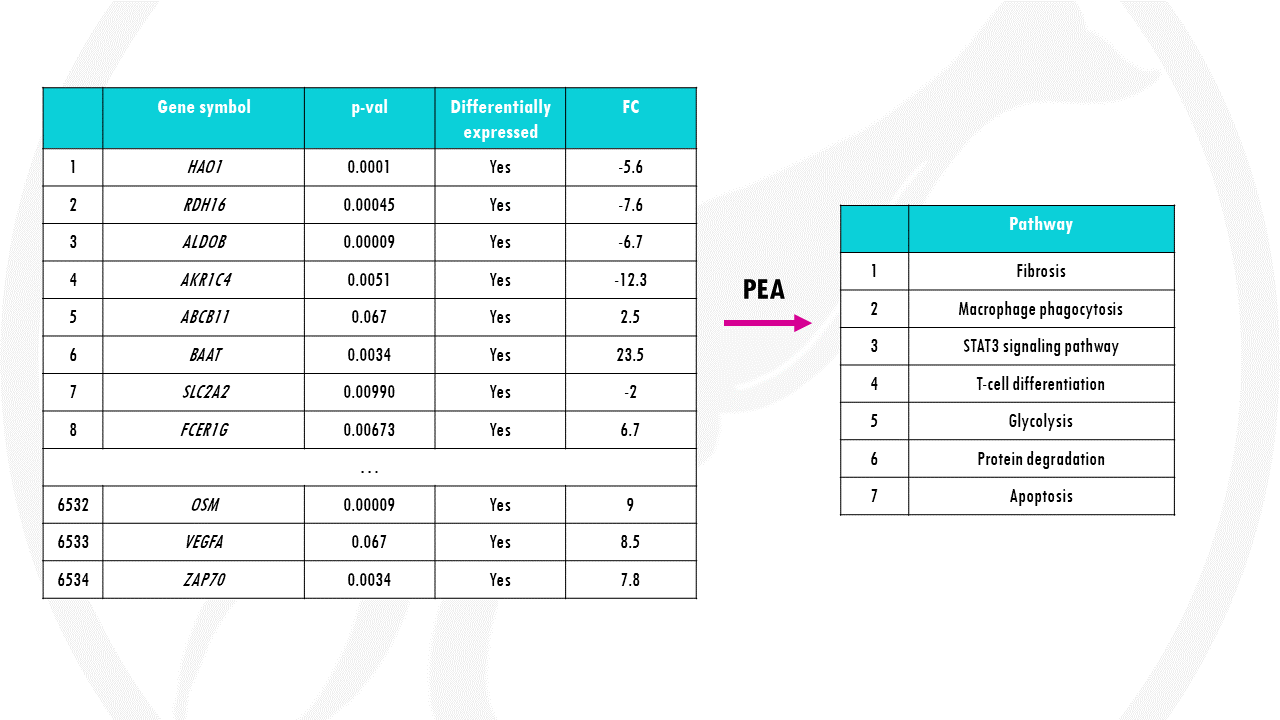
<figcaption aria-hidden="true">Summarise lists of DGEs to pathways</figcaption>
</figure>

Pathway enrichment analysis summarises the long gene list to a shorter and more easily interpretable list of pathways.

### How does PEA work?

For a pathway enrichment analysis we need 3 ingredients.

1.  Our **gene list** of interest, fx. a list of DGEs which we want to summarise.
2.  A list of **background genes** - fx all of the genes in the human genome/transcriptome.
3.  A list of **gene sets**. Gene sets are basically groups of related genes. Of course, for the algorithm to know if your list has a lot of genes related to breast cancer, or apoptosis, or cellular respiration, you need to tell it which genes are actually involved in breast cancer, apoptosis, and cellular respiration.

<figure>
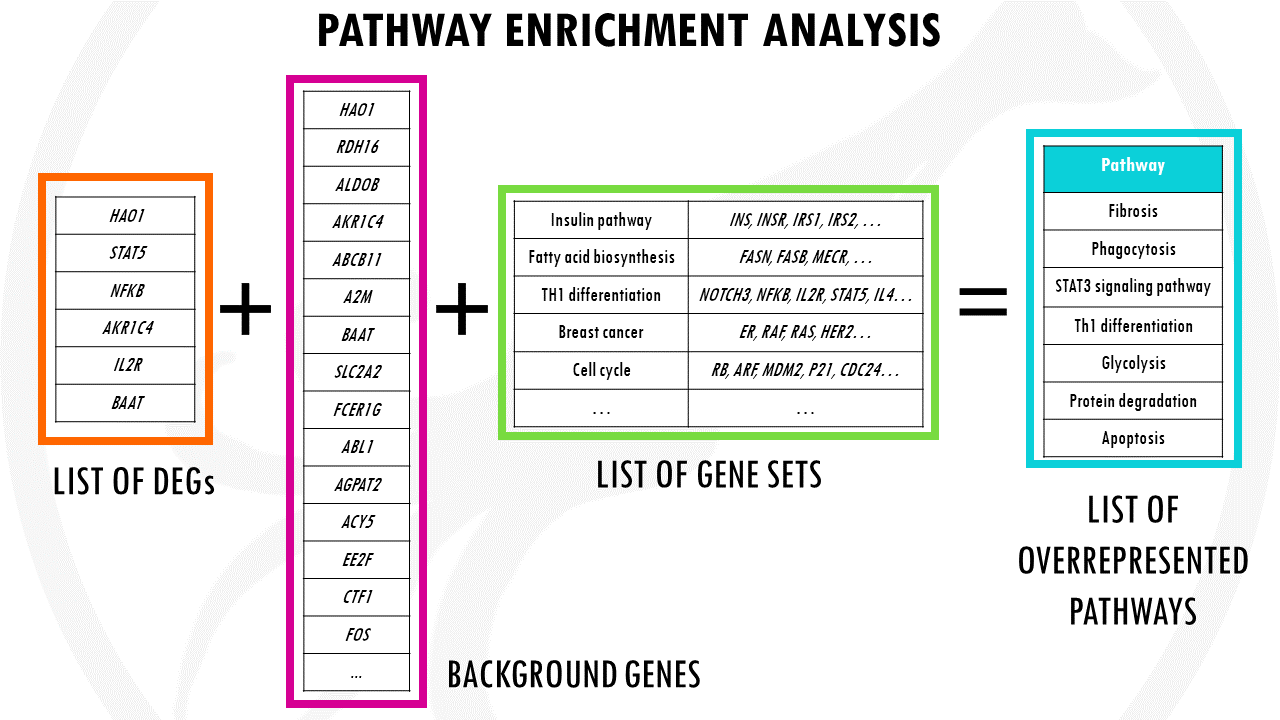
<figcaption aria-hidden="true">Components of a pathway enrichment analysis</figcaption>
</figure>

PEA essentially compares our gene list to the background list to check if there are certain pathways **overrepresented**

One example could be: Alcoholic liver disease is usually involved in inflammatory processes, which often involve pro-inflammatory cytokines like IL-6. So, is there an **association** between our genes differentially expressed in alcoholic liver disease vs healthy cells and IL-6 production.

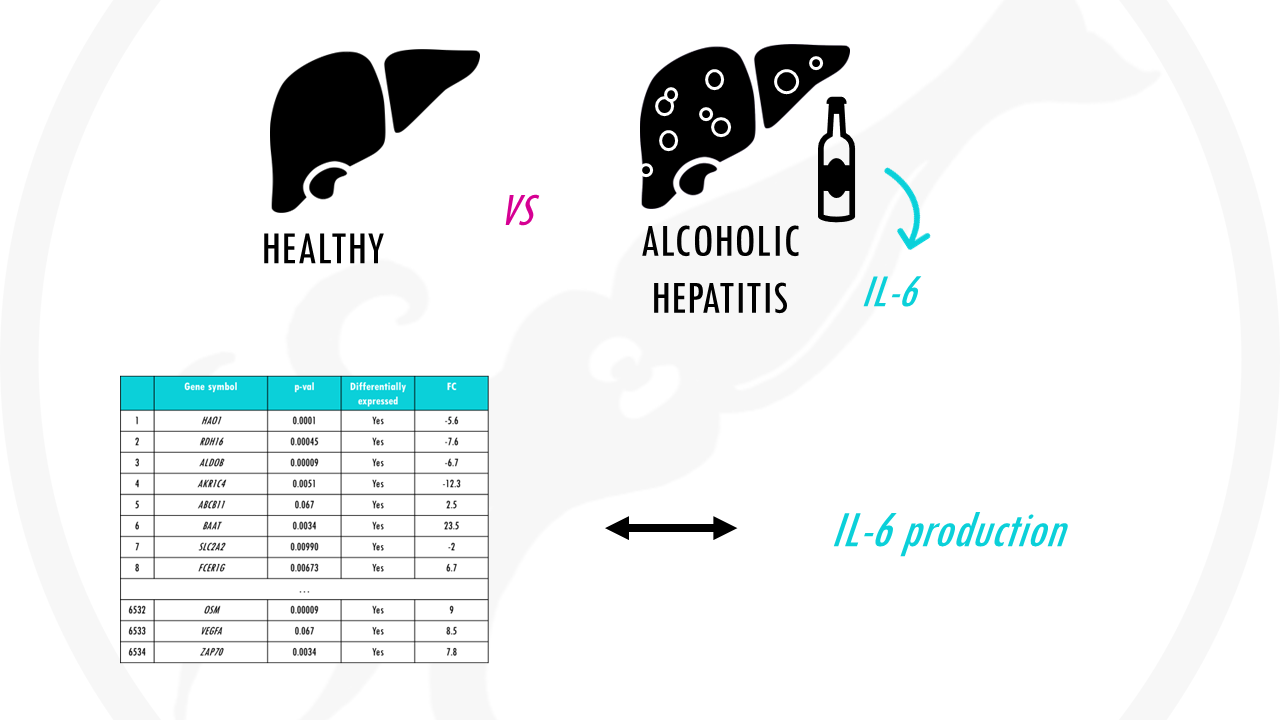

Is our list of DGEs **enriched** with genes involved in IL-6 synthesis pathway?

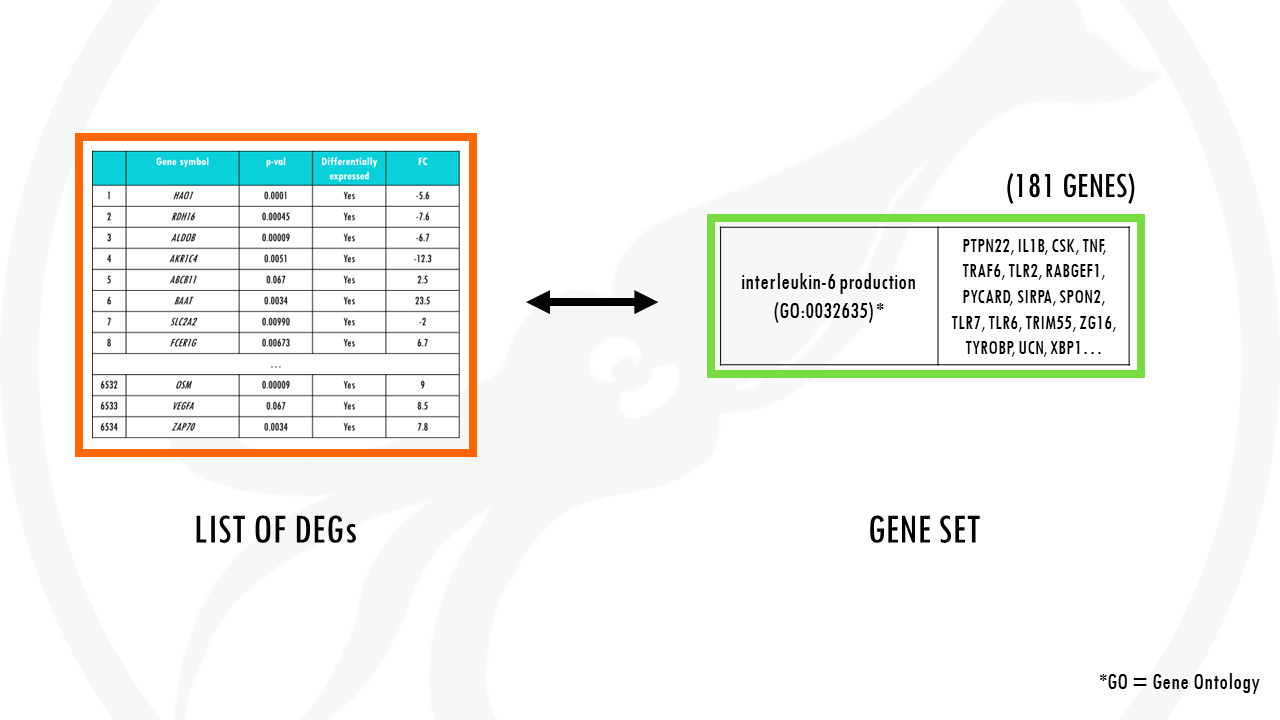

To answer this question, we can build a contigency table. This will help us determine whether the fraction of genes of interest in the pathway is higher compared to the fraction of genes outside the pathway (so, backgound set). See the table below.

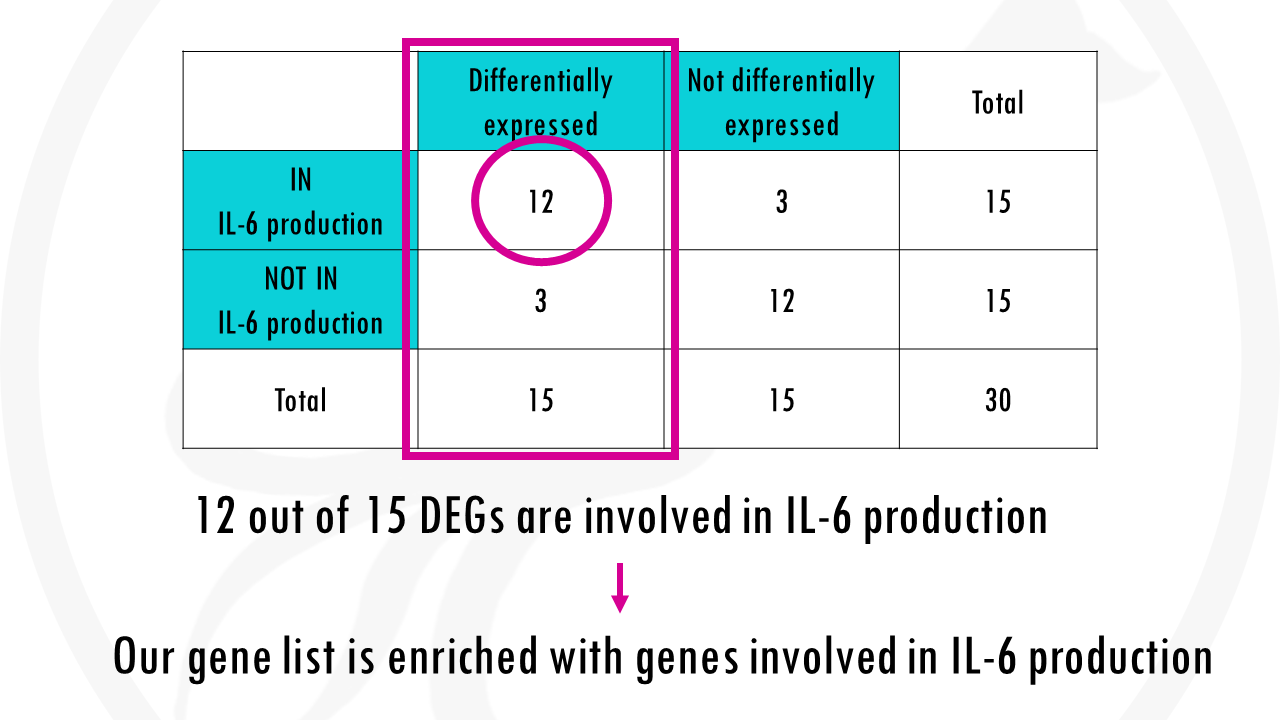

We have a column for differentially expressed and a column not differentially expressed genes, and then two rows, for genes that are annotated as being involved in IL-6 production and genes that are not involved in IL6 production.

To simplify things a lot, we will just look at 30 genes. 15 deferentially expressed genes were identified and of those, 12 genes were associated with the GO term interleukin-6 production.

We find that **12 of our 15** differentially expressed genes are involved in IL-6 production. We could quite confidently say that **our gene list is enriched with genes involved in IL-6 production.**

But what if there was 9 of our 15 involved in IL-6 production. is our gene list enriched with genes involved in IL-6 production? We need an objective statistical test to determine what is enriched and what is not. There are many methods, by the one that is commonly used in pathway enrichment analysis is fisher’s exact test. I our p-value is really lwo we can safely say that our list is overrepresented with genes involved in IL-6 production, in other words, IL-6 prodcution is an immportant pathway in alchoholic liver diseases compared to healthy liver cells. Becayse we a testing thousands of pathways we till have to adjust p-values with a multiple-testing correction method.

Pathway enrichment analysis takes your **gene list** of interest and compares it to a **list of background genes** to check if there are certain pathways that are over-represented.

So it checks the fraction of your genes annotated to a specific Gene Ontology (GO) term. Then it checks the proportion of genes in the whole genome (your background set) that are annotated to that GO Term.

Then, it gives you a **p-value** which tells you what is the probability that that pathway is actually over-represented in your gene list and it wasn’t just coincidence.

### Our analysis

Mark Burton have done the GSE analysis using four different databases, outlined below. I think we just use the vehicle control as the list of background genes. Otherwise he must have used some subset of only genes/pathways related to PHHs.

Gene Ontology (GO), KEGG, Reactome, and BioCarta are databases and tools that provide comprehensive information on gene and protein functions, interactions, and pathways. Each has its unique focus and strengths:

1.  **Gene Ontology (GO)**

    -   **Focus:** Provides a standardized vocabulary (ontologies) to describe gene and protein roles in cells. It covers three domains: Biological Process (BP), which describes the biological objectives to which the gene or gene product contributes; Molecular Function (MF), which describes the elemental activities of a gene product at the molecular level, such as binding or catalysis; and Cellular Component (CC), which describes where in the cell the gene product is active.

    -   **Strengths:** Widely used for annotating genes and gene products across species; facilitates consistent descriptions of gene products even in the context of different studies.

2.  **Kyoto Encyclopedia of Genes and Genomes (KEGG)**

    -   **Focus:** Integrates genomic, chemical, and systemic functional information. KEGG provides pathways maps that represent molecular interaction and reaction networks, covering metabolism, genetic information processing, environmental information processing, cellular processes, organismal systems, and human diseases.

    -   **Strengths:** Comprehensive in linking genes to functions through networks of interactions; useful for understanding high-level functions and utilities of the biological system.

3.  **Reactome**

    -   **Focus:** A curated database of pathways and reactions in human biology. Reactome pathways encompass various processes such as metabolism, signal transduction, gene expression, and cell cycle. It aims to provide a detailed, visual representation of molecular processes.

    -   **Strengths:** Highly detailed and manually curated; provides an interactive pathway browser that facilitates the exploration of complex biological pathways; also includes pathways from other species, providing a comparative perspective.

4.  **BioCarta**

    -   **Focus:** Earlier widely used for providing graphical representations of molecular pathways, focusing on various biological and signaling pathways. BioCarta’s pathways were known for highlighting the interactions between different molecules and the potential regulation mechanisms.

    -   **Strengths:** Although less updated and less comprehensive than other databases mentioned, BioCarta pathways have been historically significant for offering insights into specific signaling and molecular pathways, contributing to the understanding of complex biological processes.

## Visualization of GSEA

#### Setup

In [ ]:
library(here)


here() starts at C:/Users/alosvendsen/Documents/R/manuscript

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

### IL-1B 10 ng

#### KEGG

Testing just KEGG. Getting the code to work for one file.

In [ ]:
path_raw_data <- here("notebooks/seq/data_raw/GSEA/")
gsea_data <- read_excel(here(path_raw_data, "KEGG_IL1B_10_vs_vehicle.xlsx"))


In [ ]:
plot_data <- 
  arrange(gsea_data, -abs(NES)) %>% 
    group_by(sign(NES)) %>%
    slice(1:20)


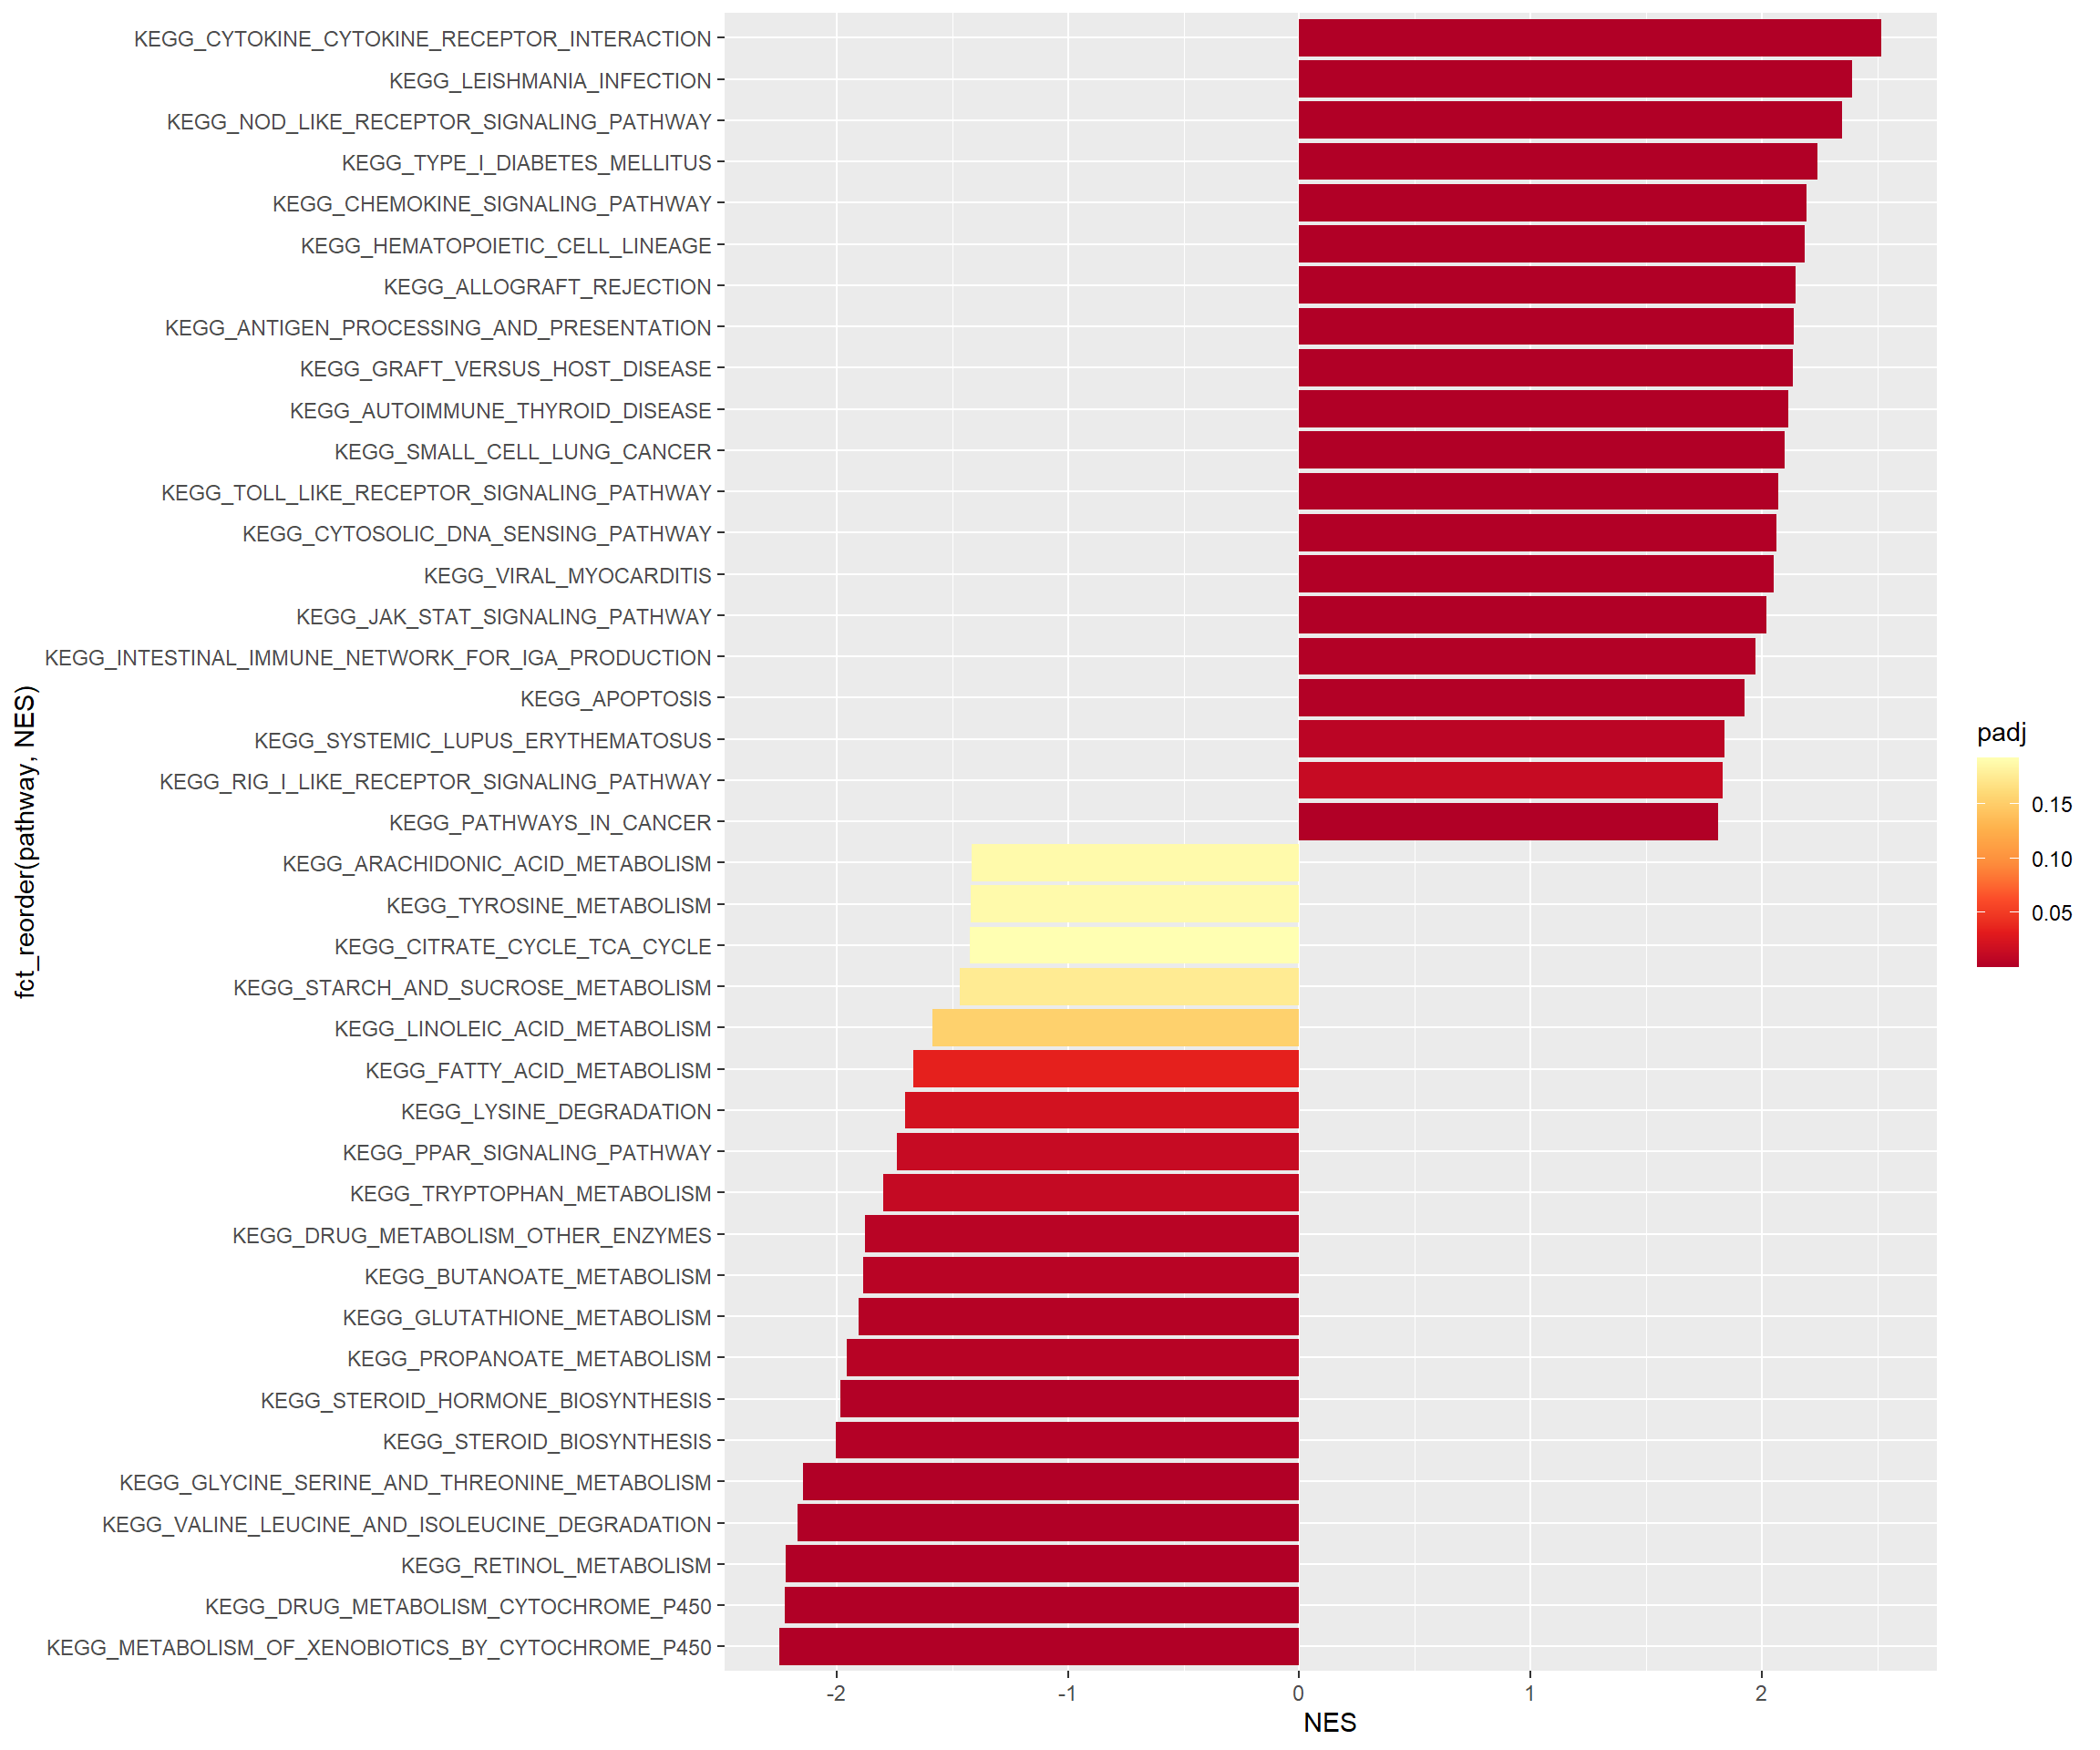

In [ ]:
ggplot(data = plot_data,
       aes(x = NES,
           y = fct_reorder(pathway, NES),
           fill = padj
           )
       ) +
  geom_bar(stat = "identity") +
  scale_fill_distiller(type = "seq", palette = "YlOrRd")


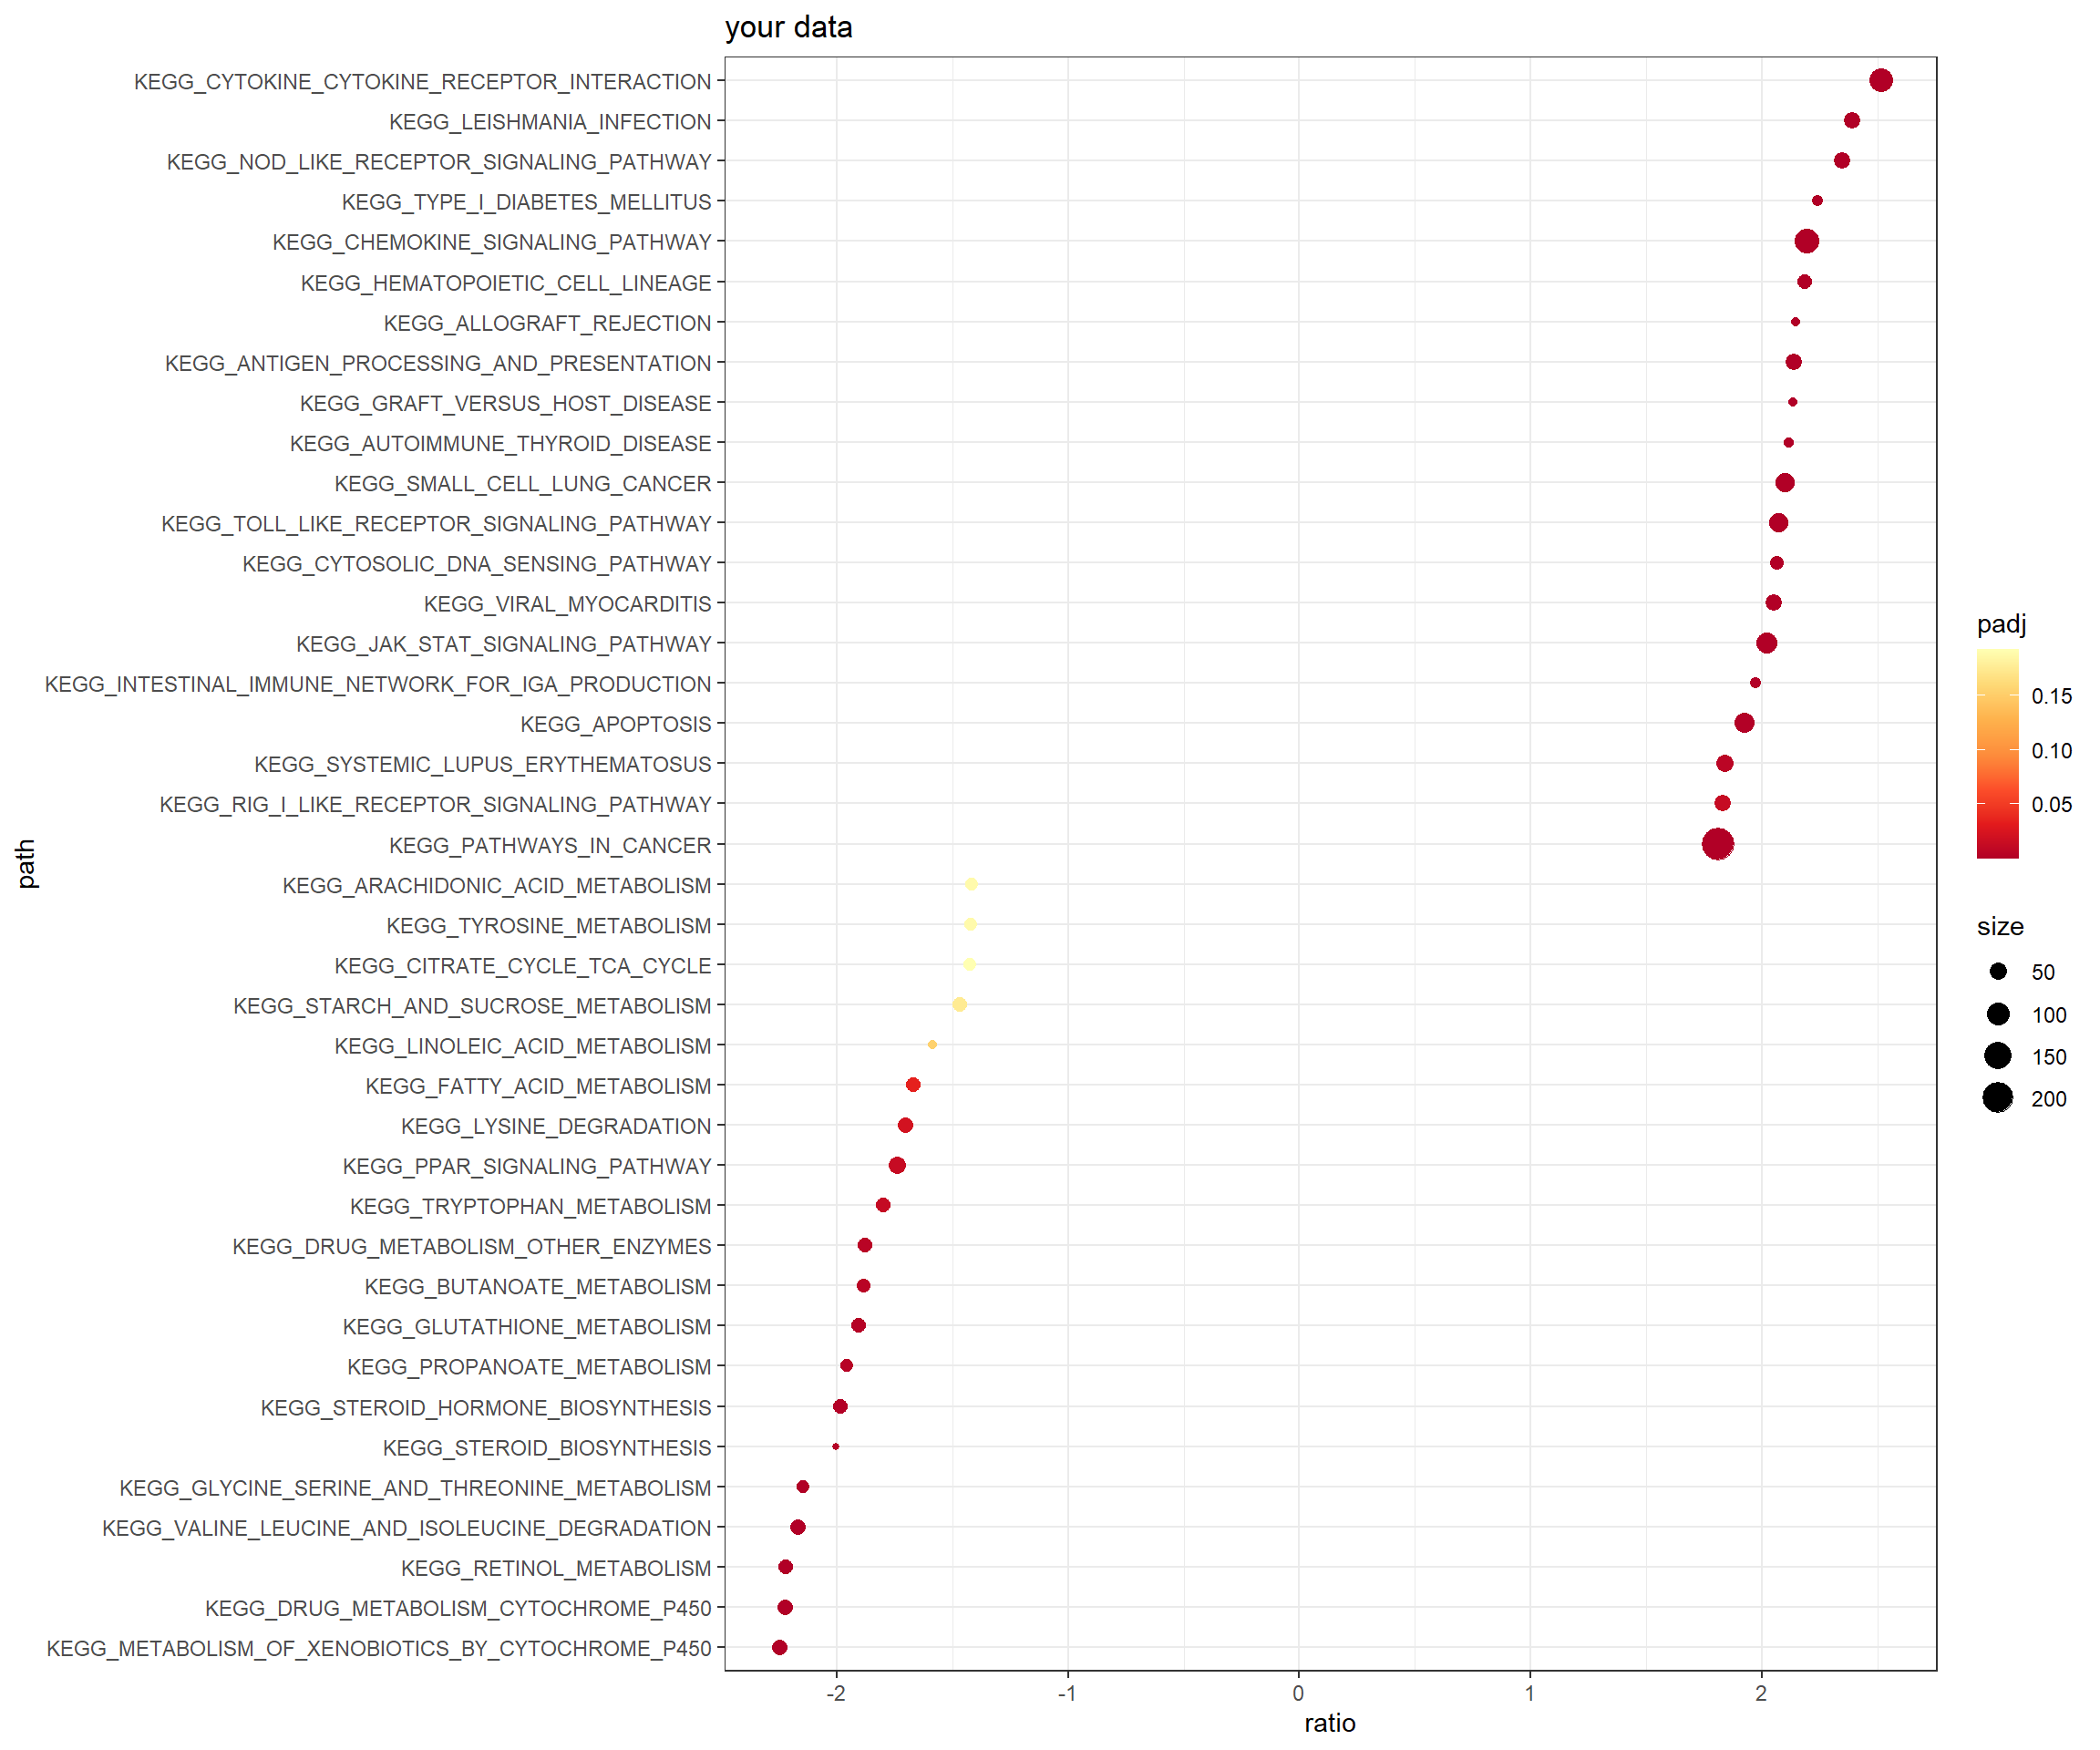

In [ ]:
ggplot(plot_data, aes(x = NES, y = fct_reorder(pathway, NES), color = padj, size = size)) + 
  geom_point(stat = 'identity') + 
  xlab("ratio") + ylab("path") + ggtitle("your data") + 
  theme_bw() + 
  scale_color_distiller(type = "seq", palette = "YlOrRd")


### All KEGG plots

Plot all using a function

In [ ]:
# Get file paths
kegg_file_paths <- dir(here("notebooks/seq/data_raw/GSEA"), pattern = "KEGG", full.names = TRUE)

# Subset to interleukines if wanted
#kegg_file_paths[grep(pattern = "IL", kegg_file_paths)]


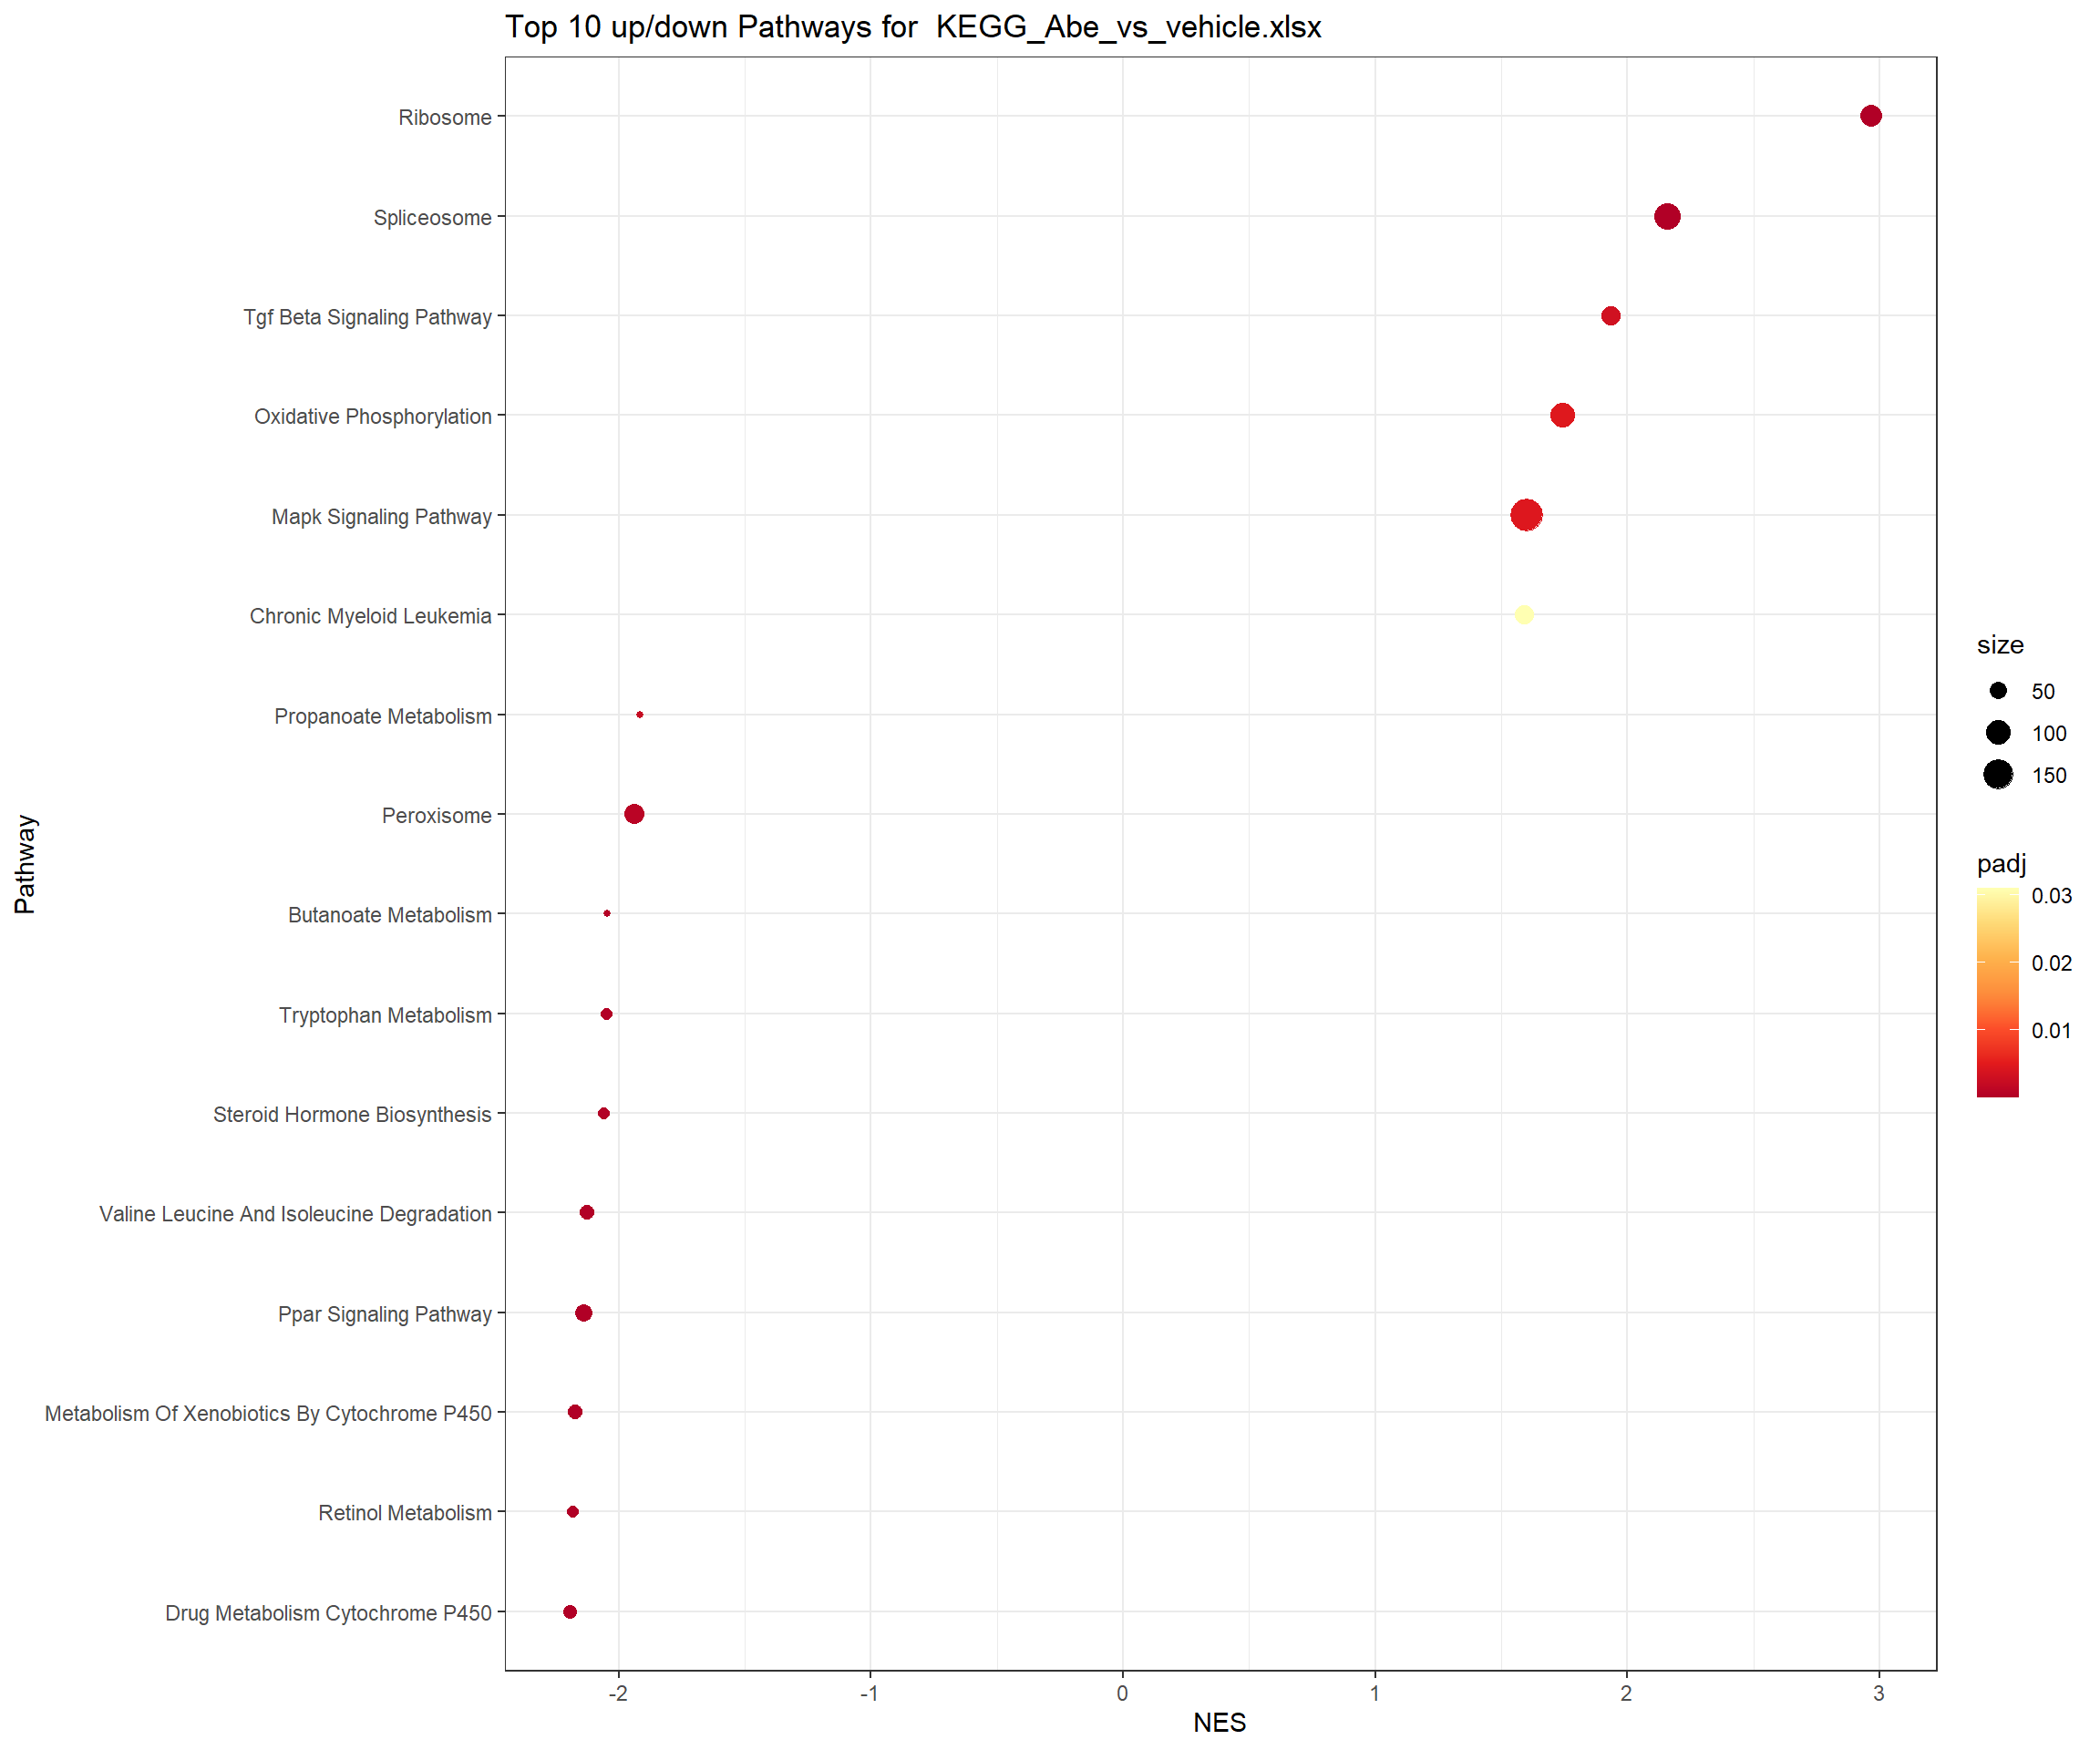

In [ ]:
KEGG_plot_list <- map(kegg_file_paths, function(file_path) {
  # Read the file
  plot_data <- read_excel(file_path)
  
  # Process the data
  processed_data <- plot_data %>%
    arrange(desc(abs(NES))) %>%
    group_by(sign_NES = sign(NES)) %>%
    slice_head(n = 10) %>%
    ungroup() %>%
    filter(padj <= 0.05) %>%
    mutate(pathway = str_remove_all(pathway, "KEGG_"),
           pathway = str_replace_all(pathway, pattern = "_", replacement = " "),
           pathway = str_to_title(pathway))

  
  # Generate the plot
  ggplot(processed_data,
         aes(x = NES,
             y = fct_reorder(pathway, NES),
             color = padj,
             size = size
             )
         ) +
    geom_point(stat = 'identity') +
    labs(x = "NES",
         y = "Pathway",
         title = paste("Top 10 up/down Pathways for","", basename(file_path))
         ) +
    theme_bw() +
    scale_color_distiller(type = "seq", palette = "YlOrRd") #+
    #theme(axis.text.y = element_text(size = 8))
})
KEGG_plot_list[[1]]


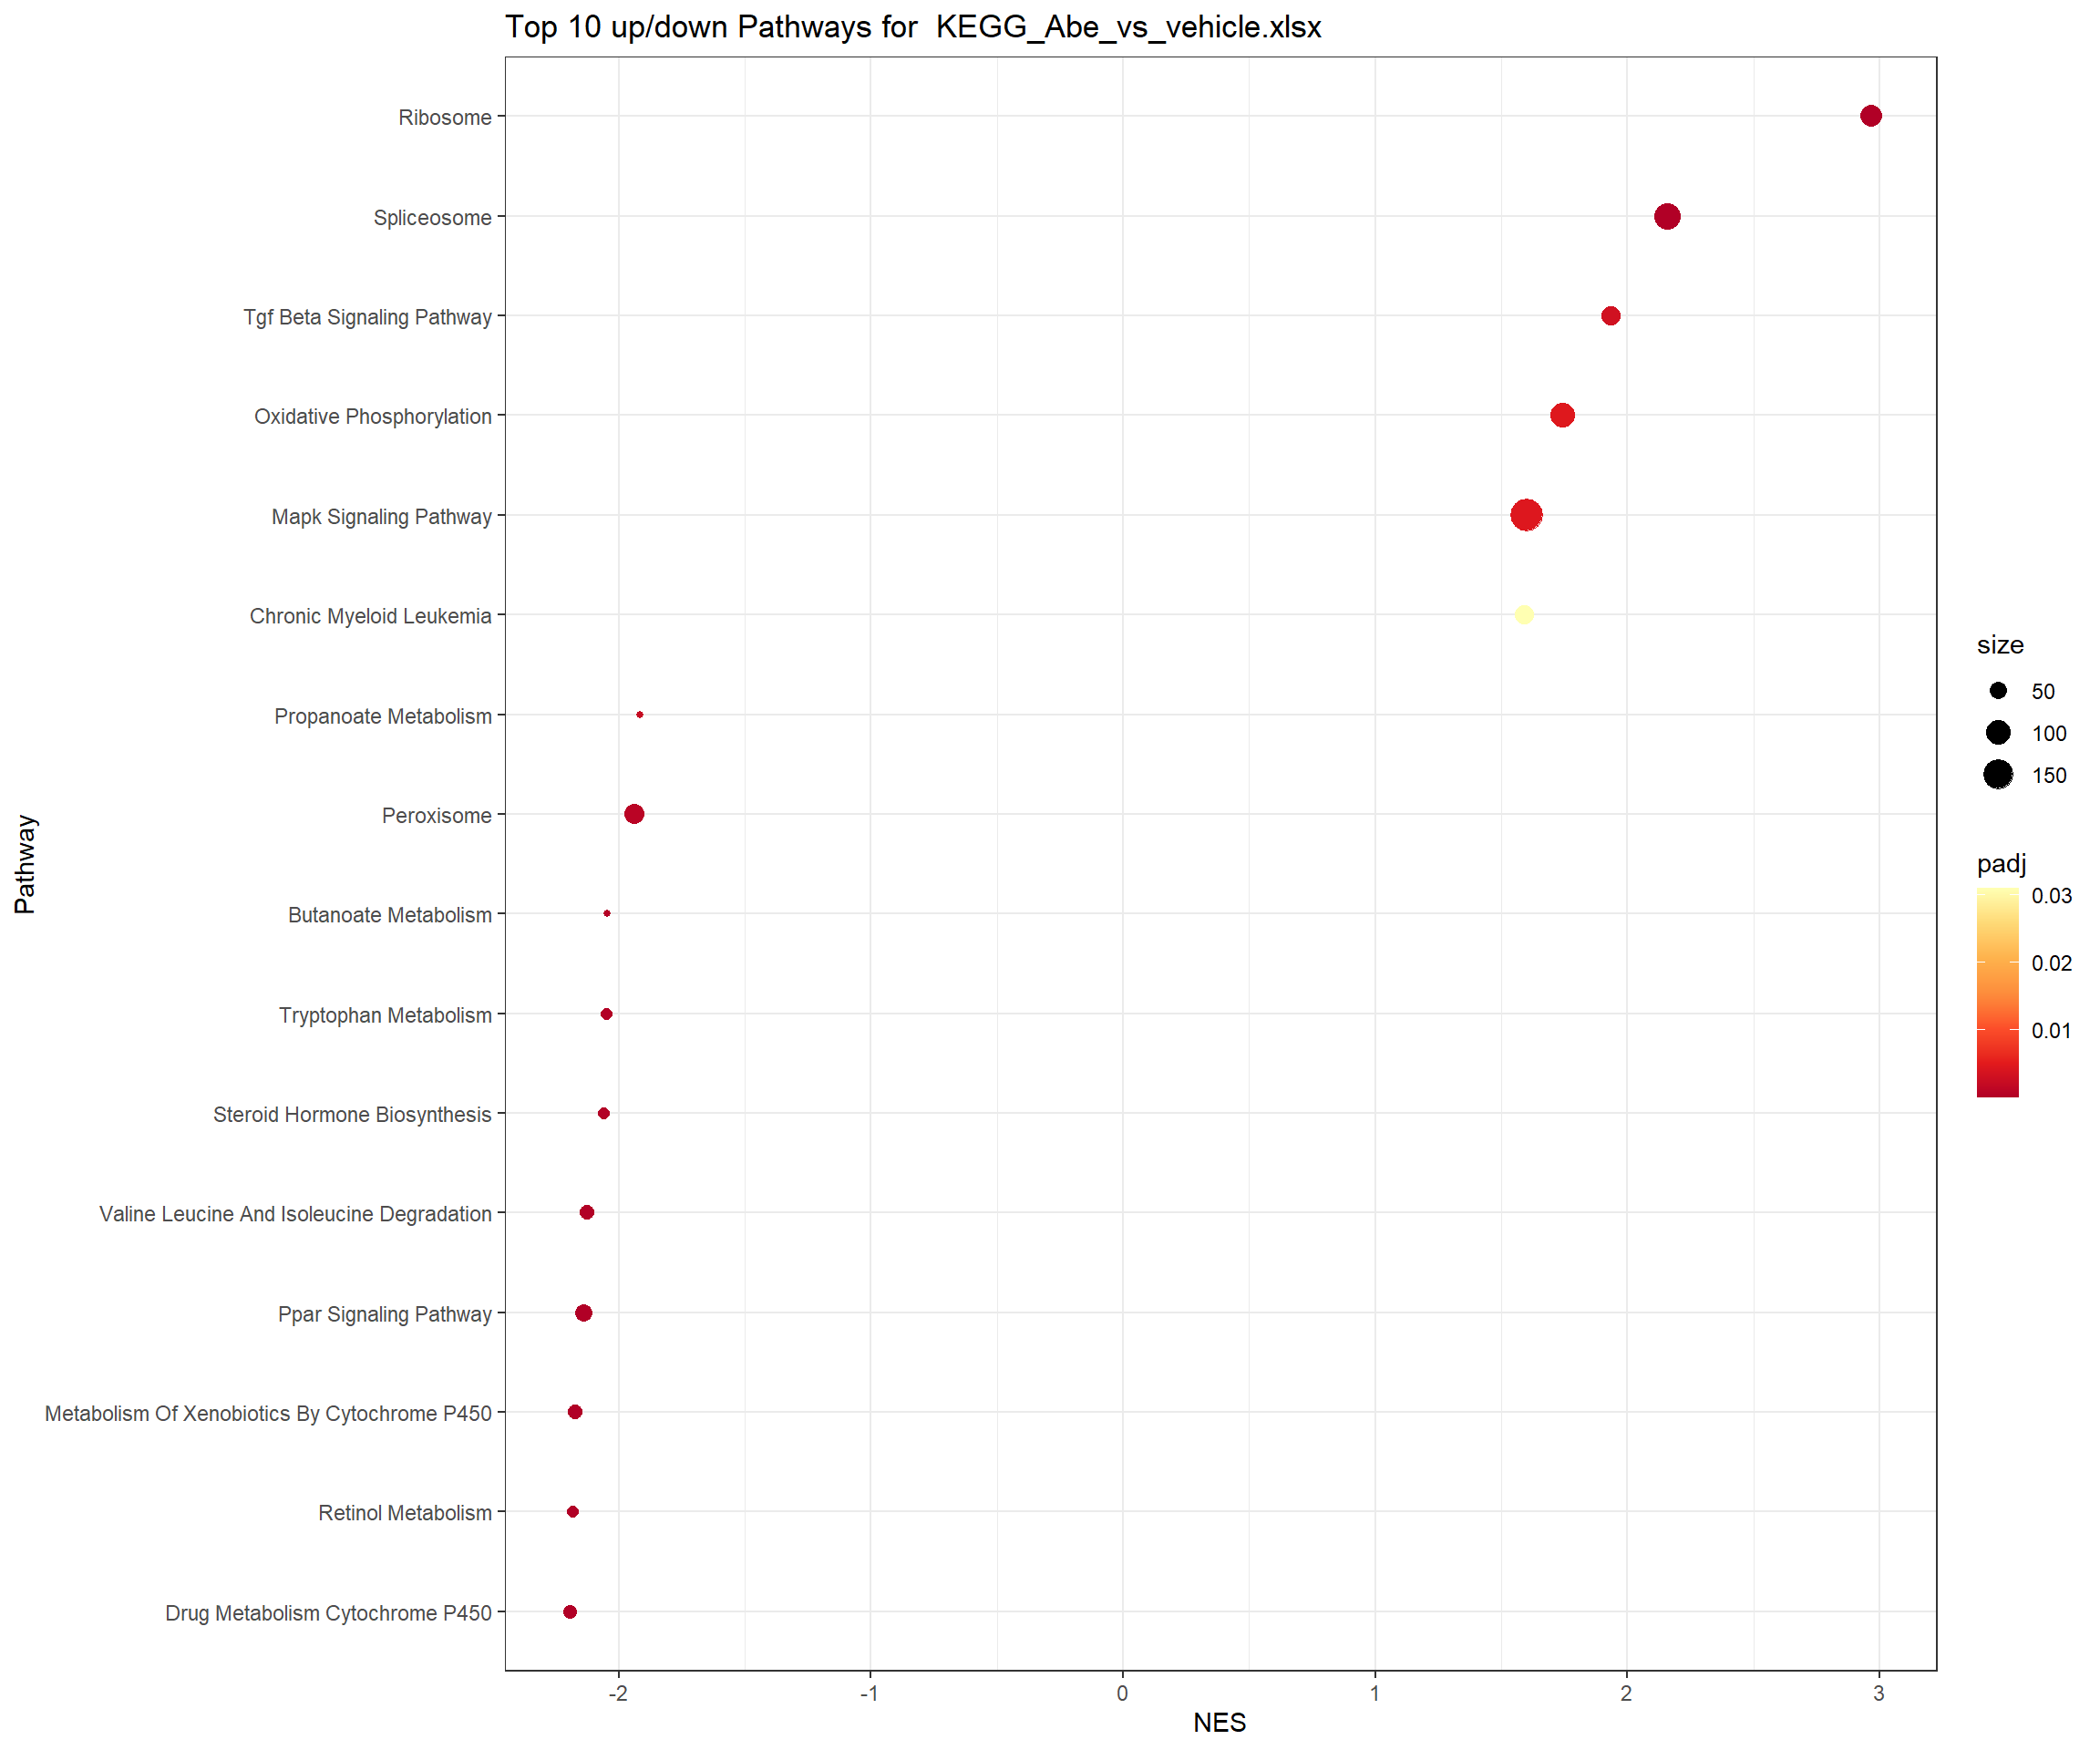

In [ ]:

KEGG_plot_list[[1]]


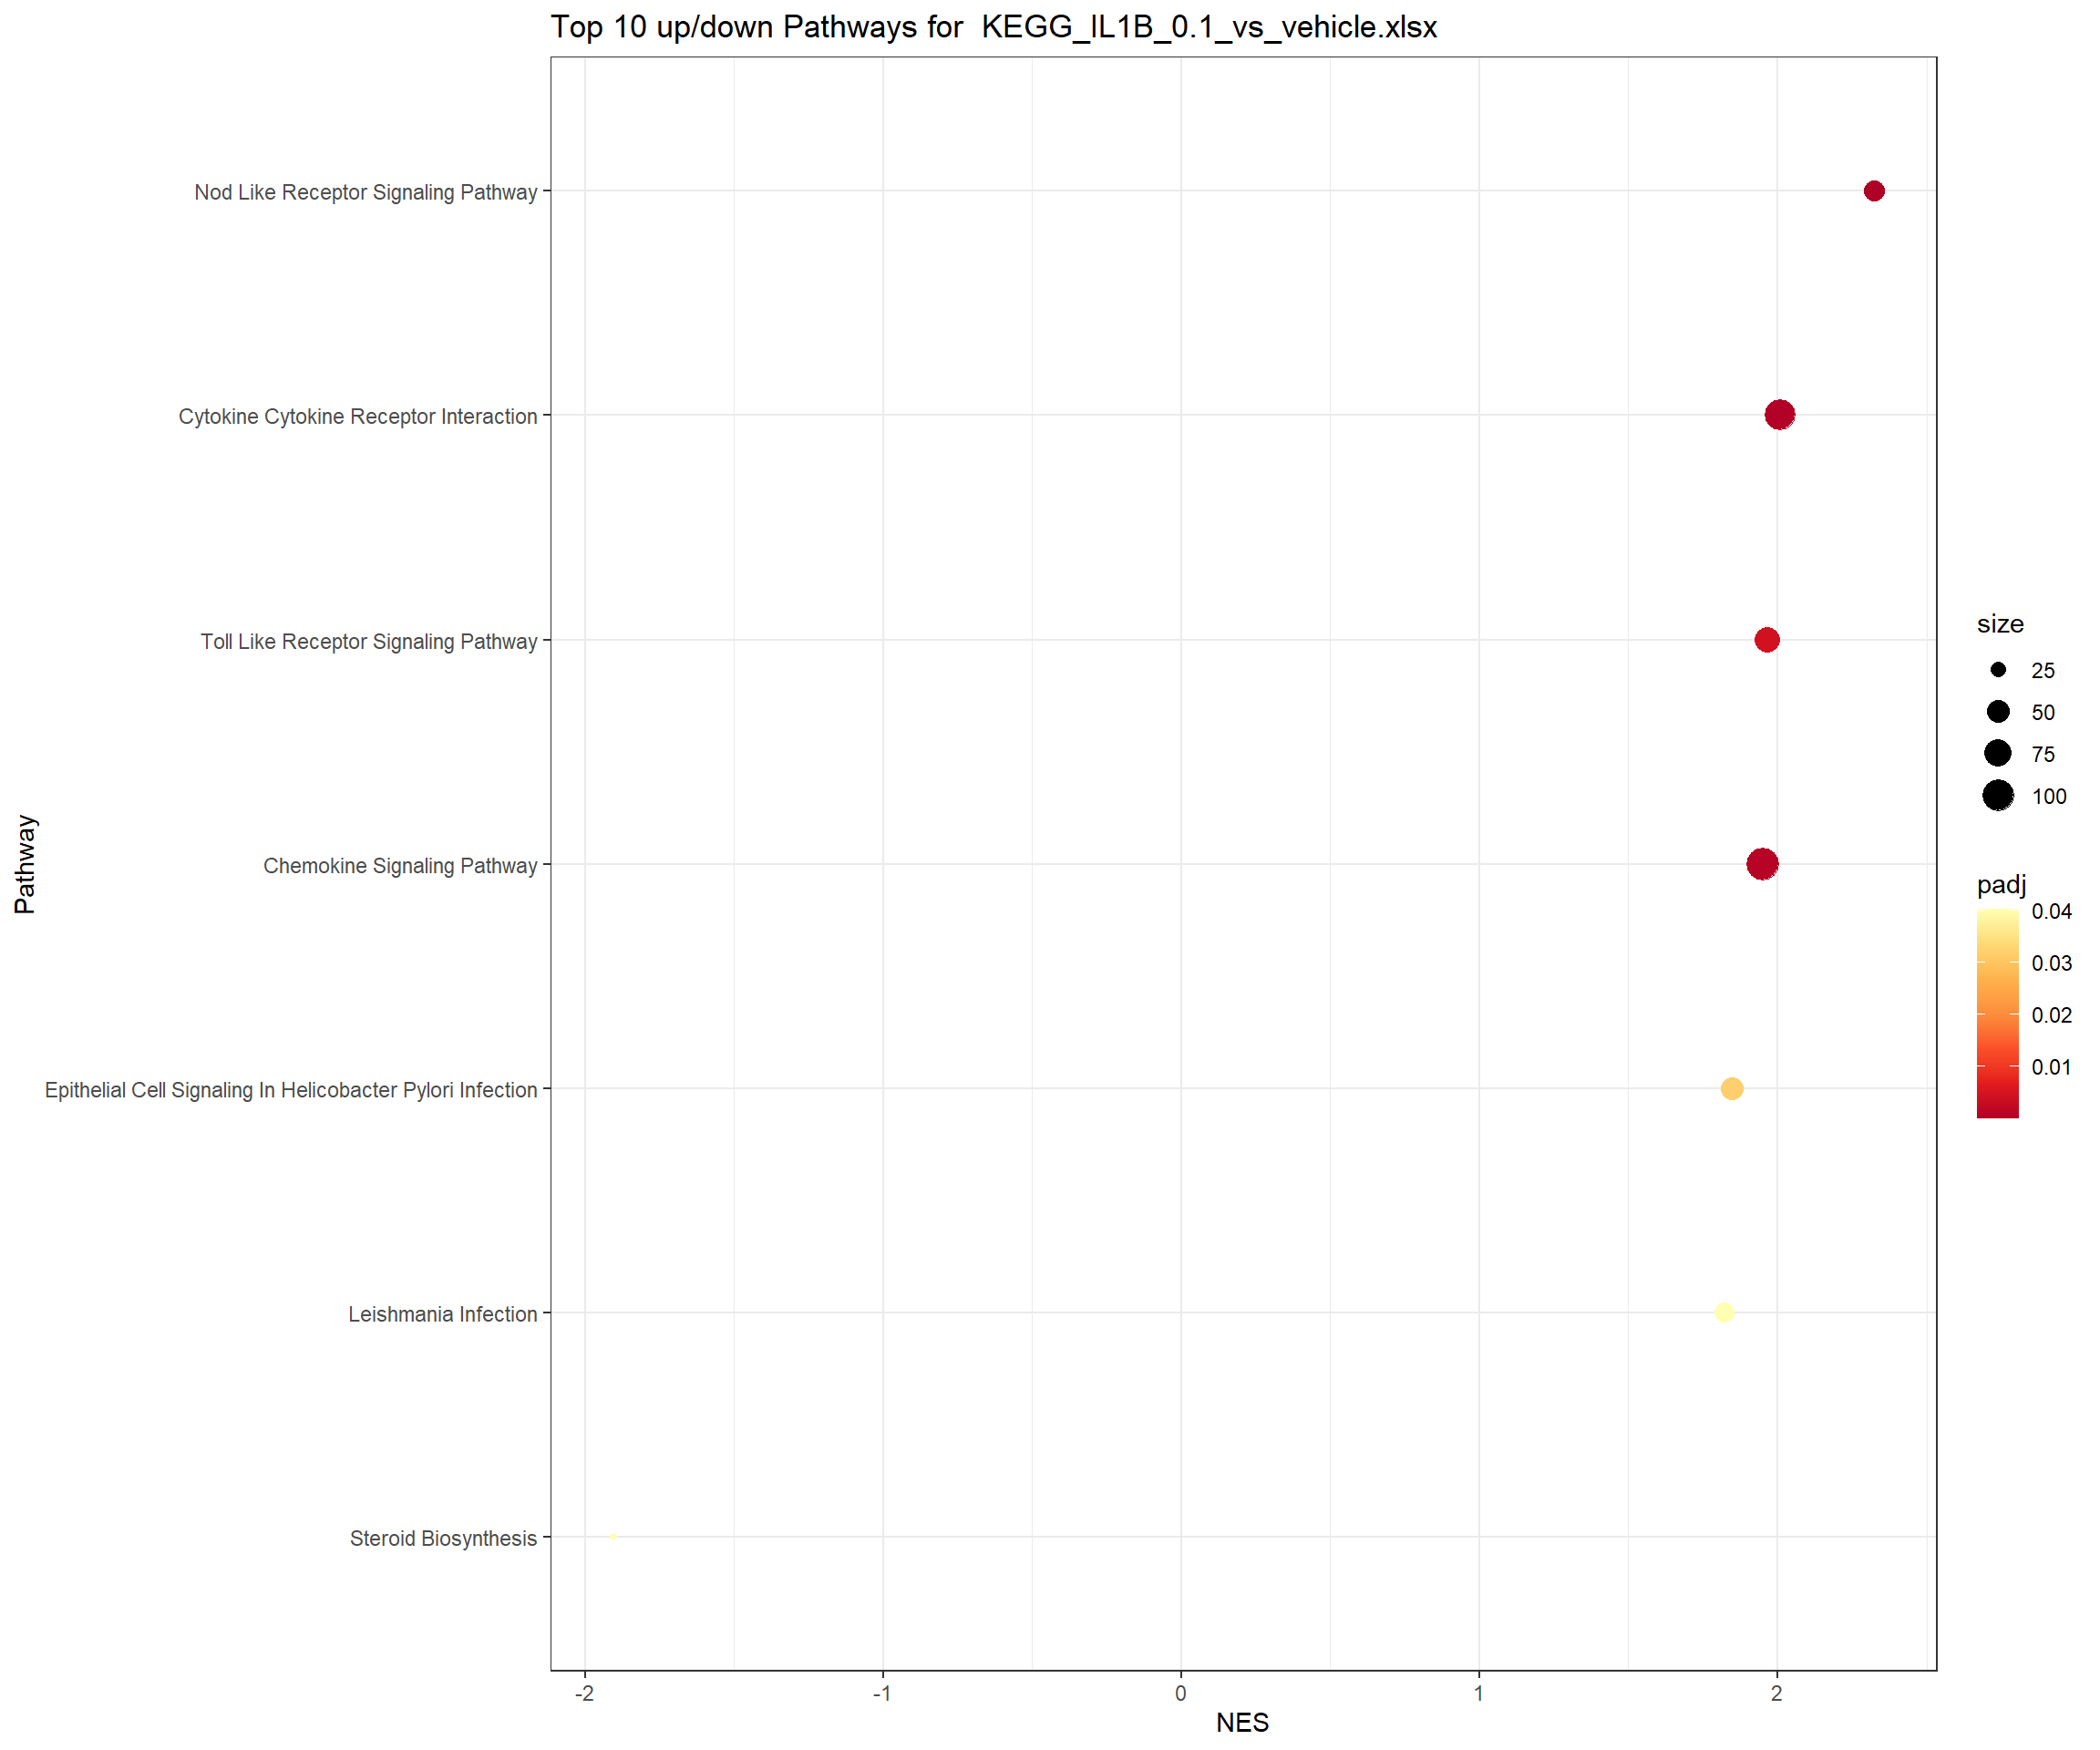

In [ ]:

KEGG_plot_list[[2]]


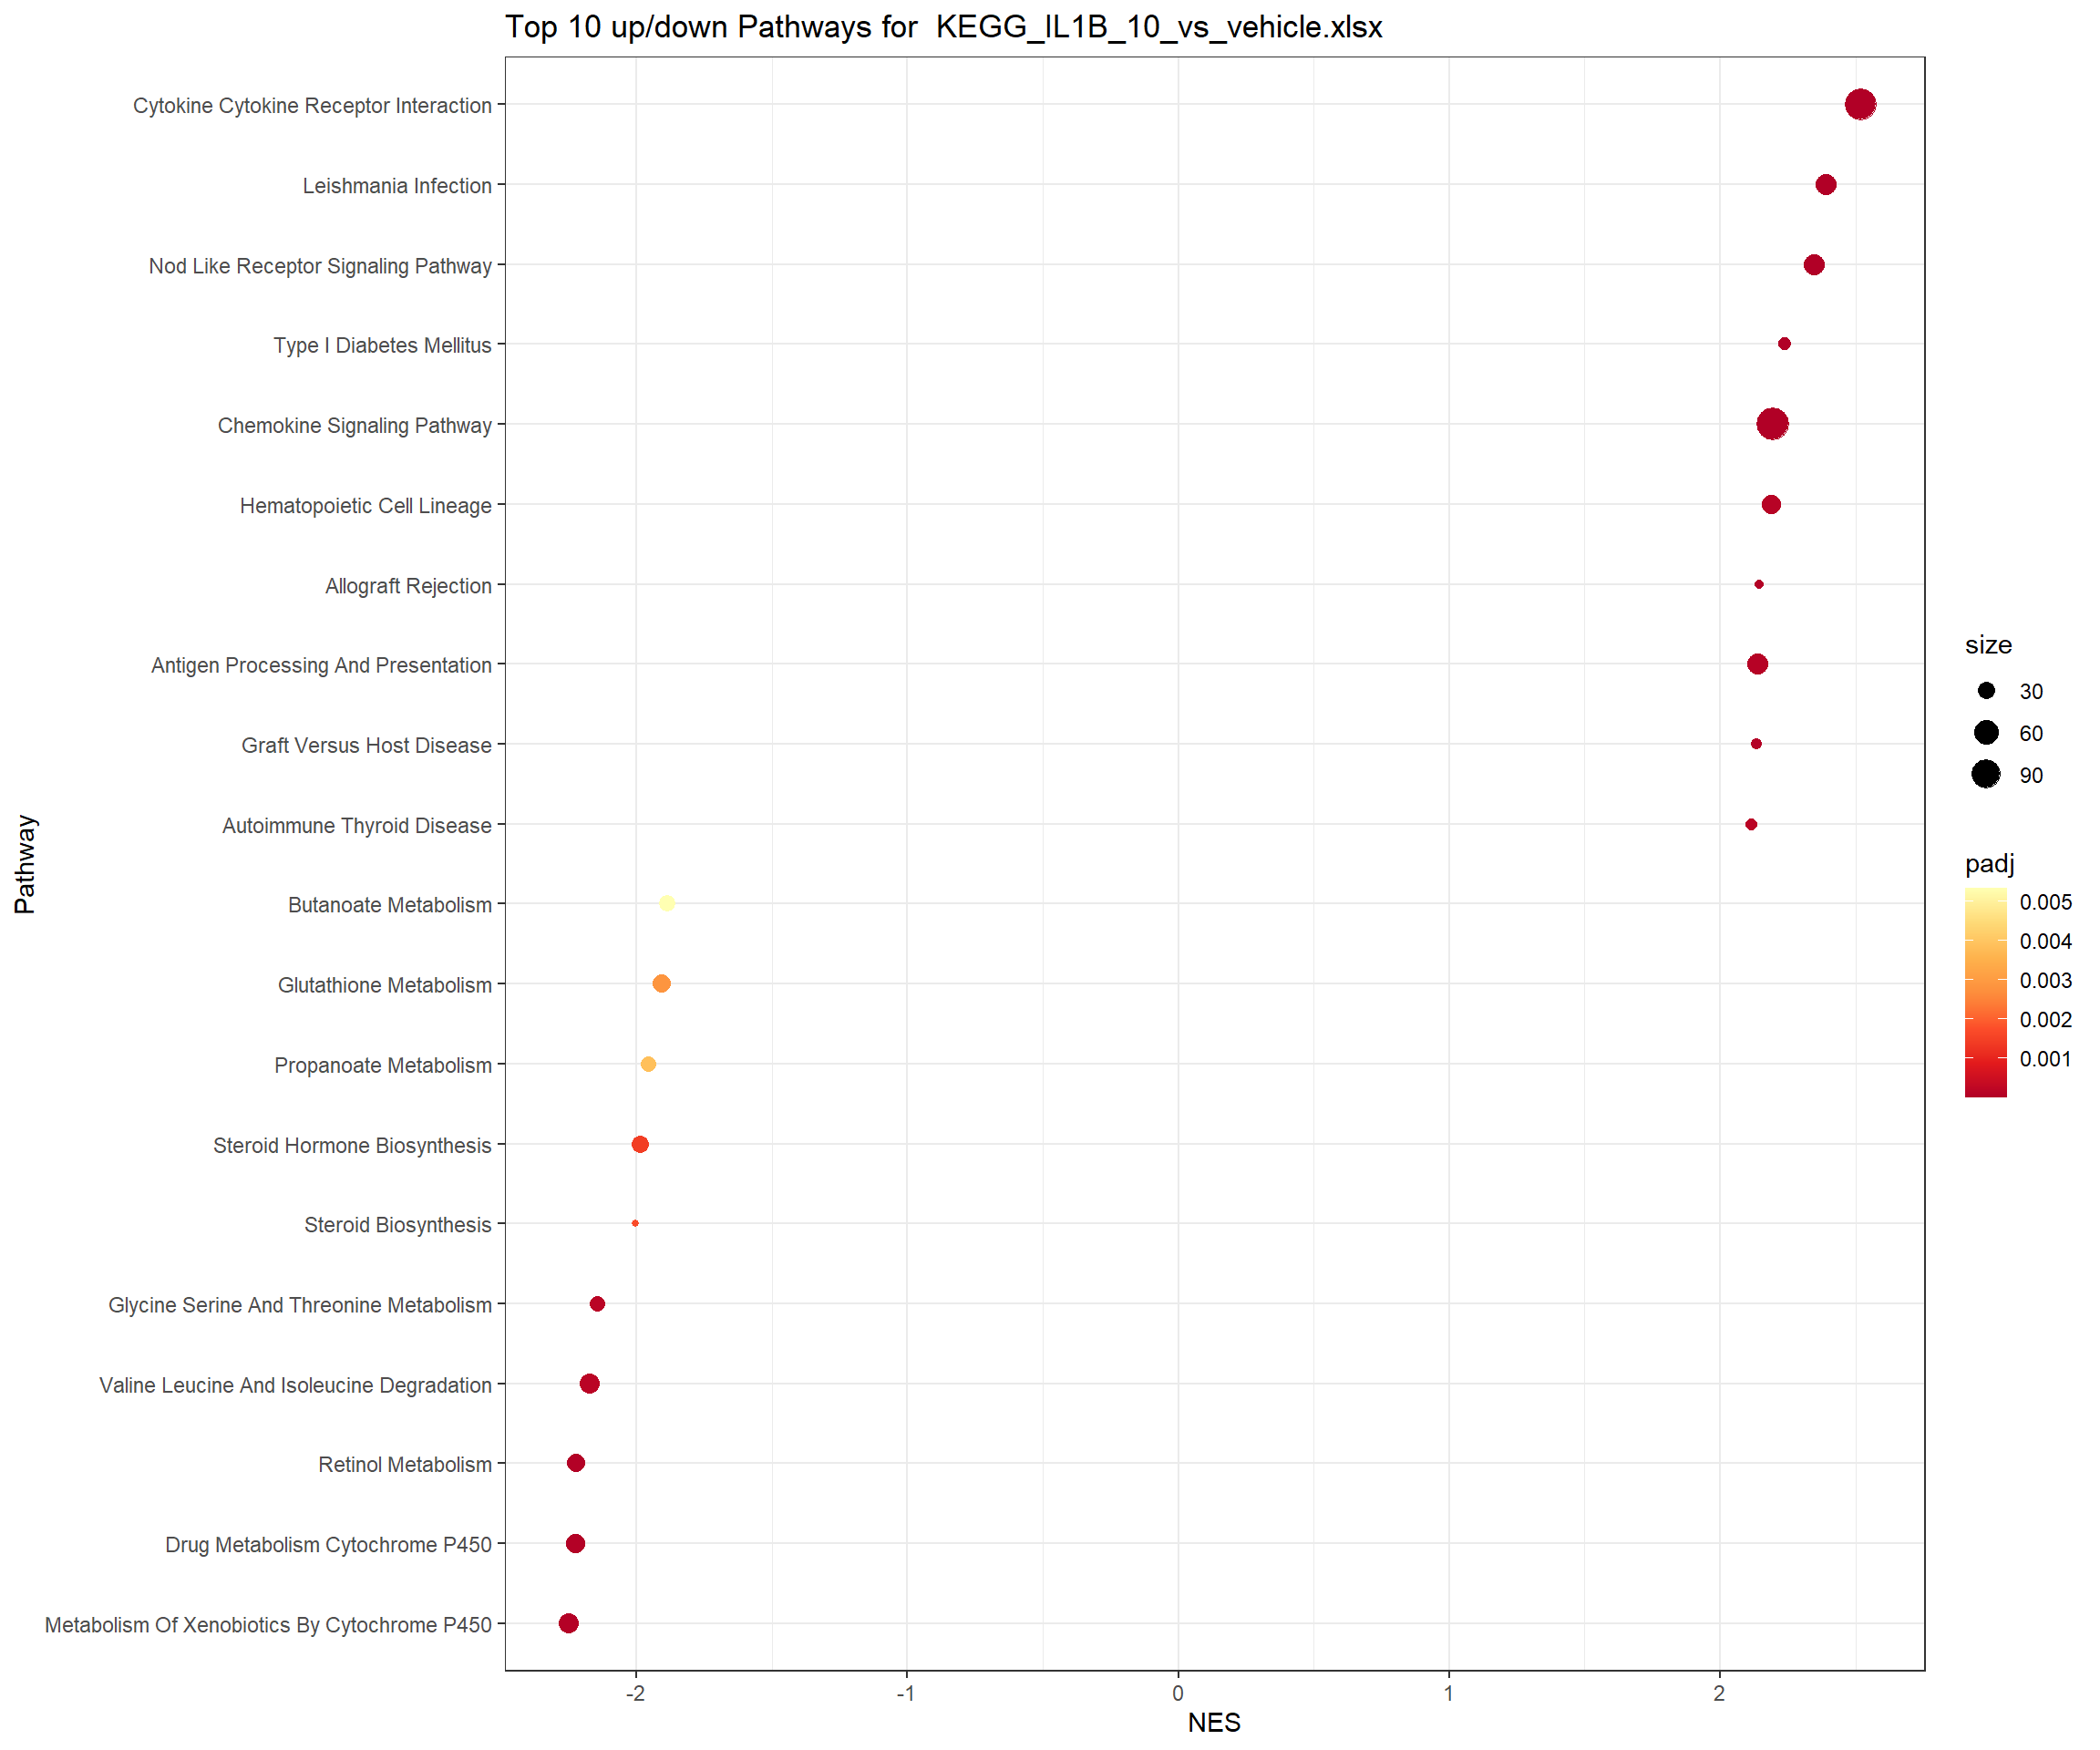

In [ ]:

KEGG_plot_list[[3]]


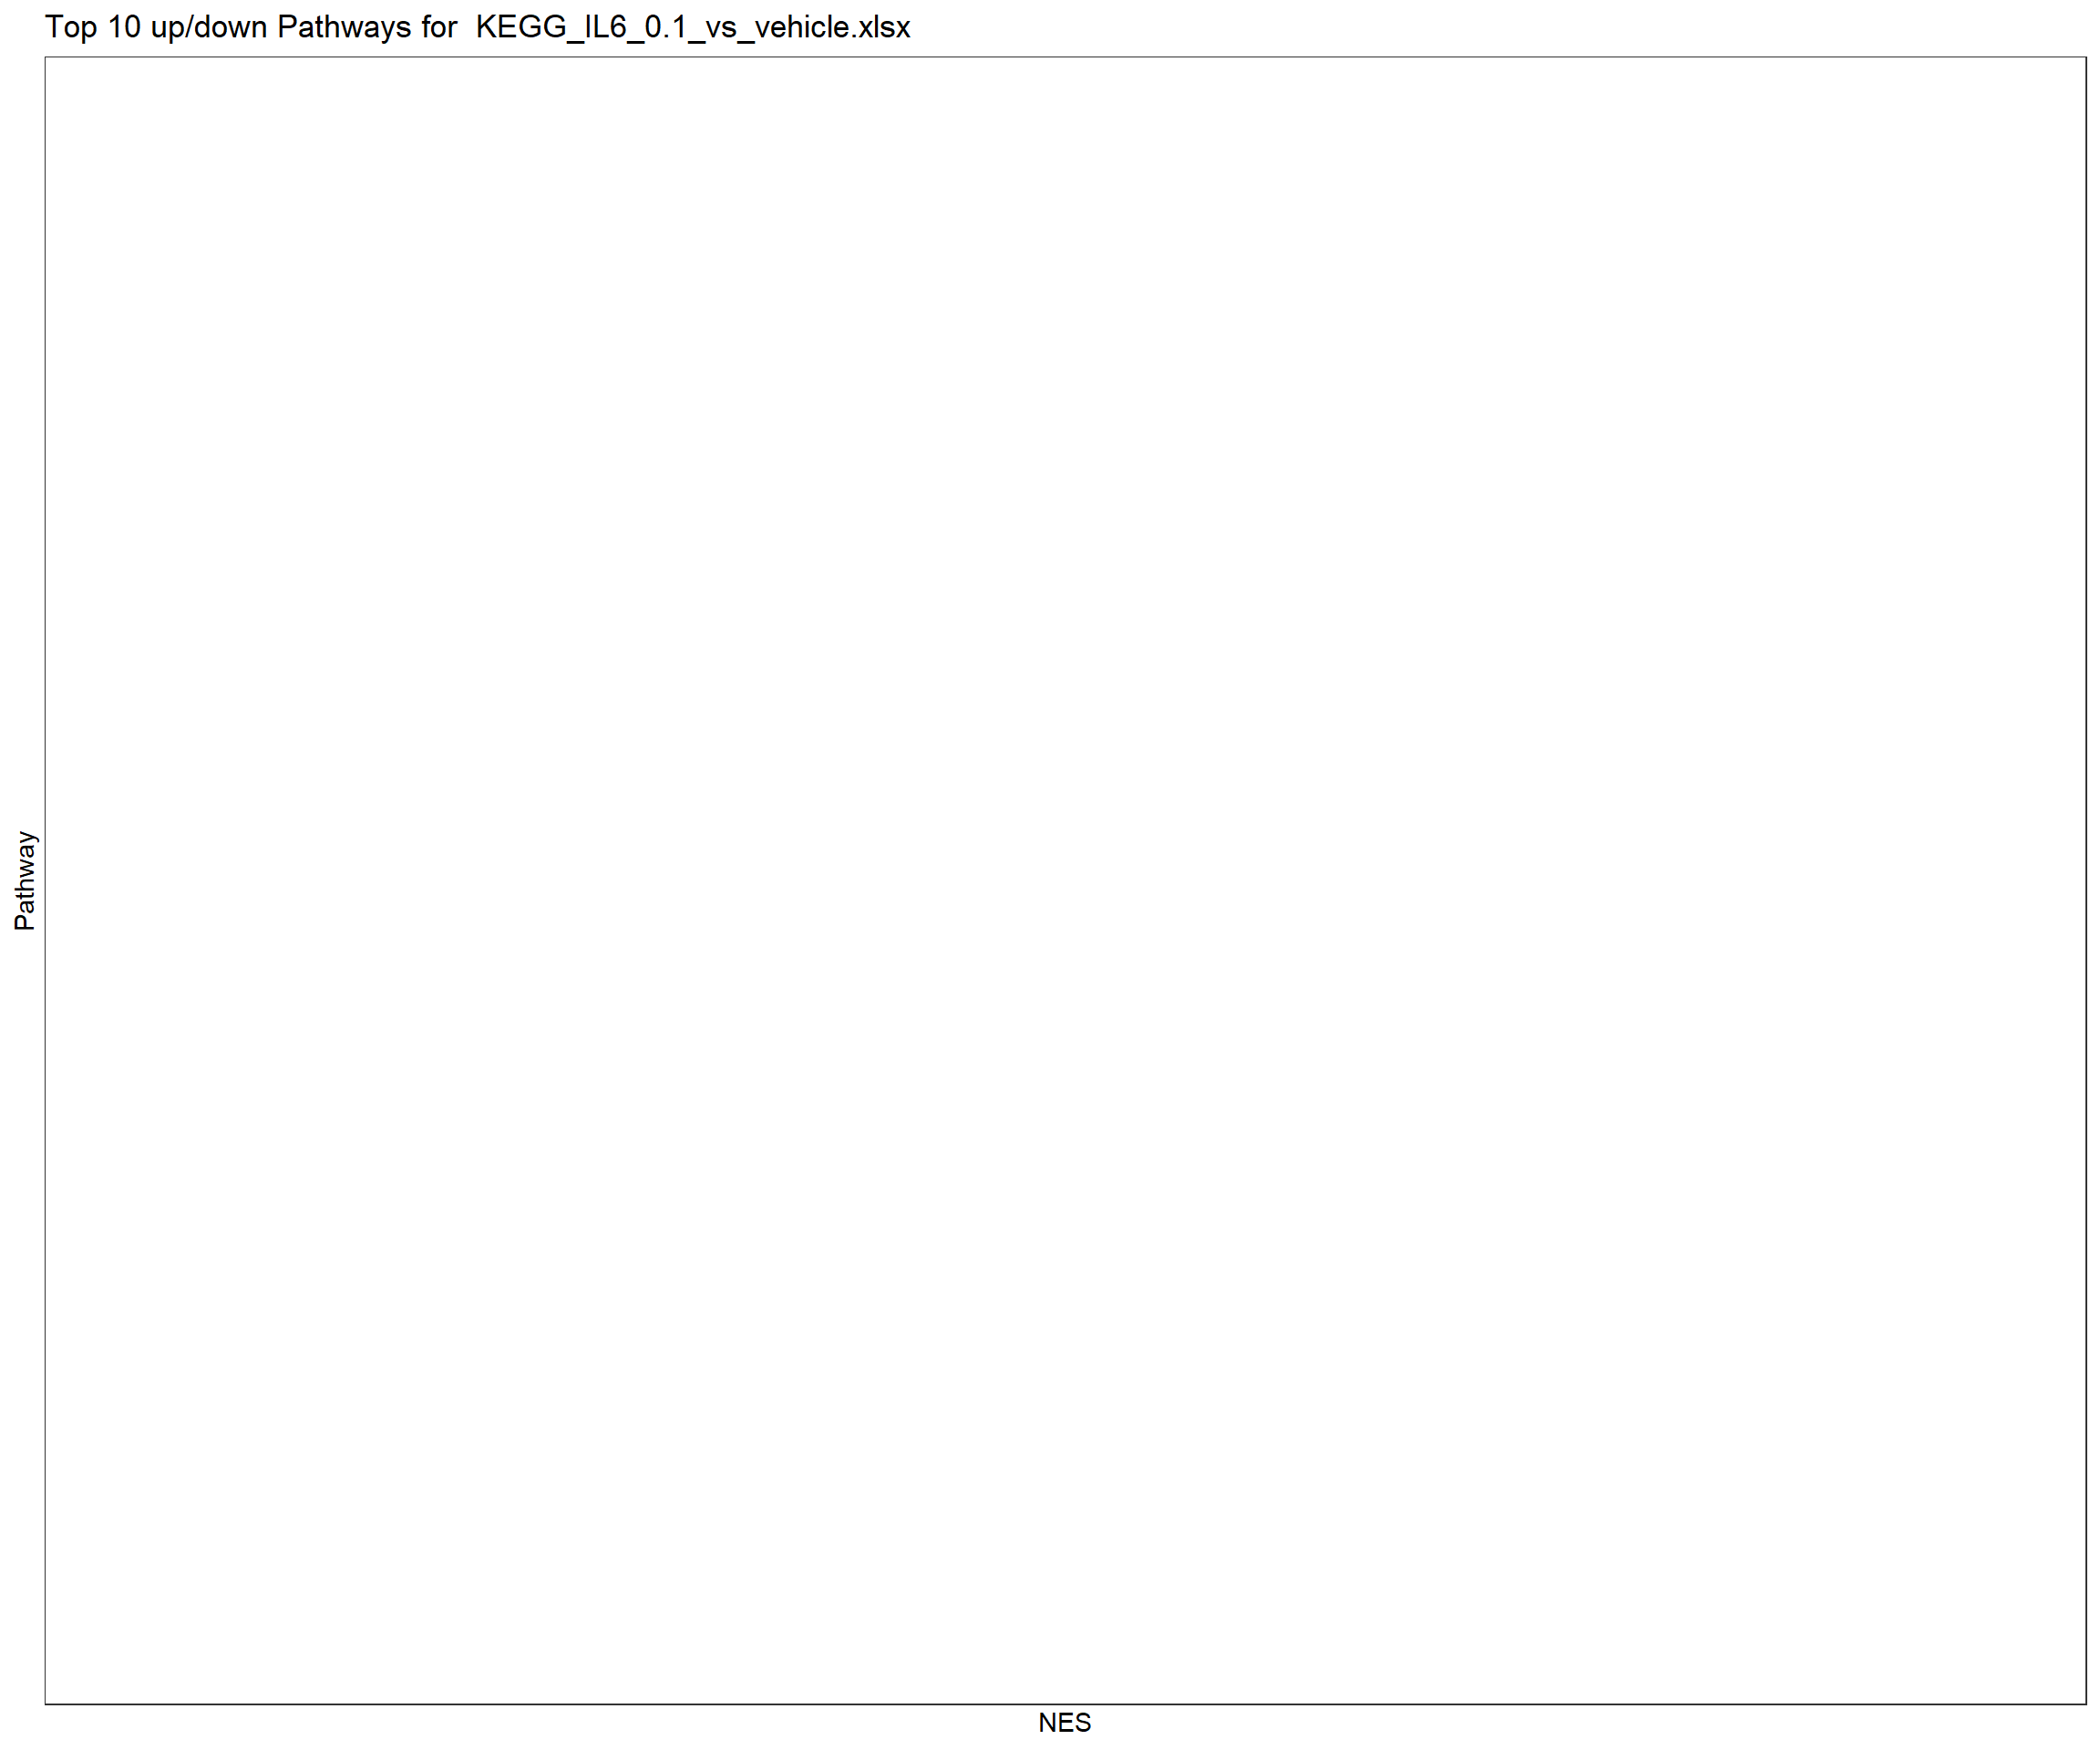

In [ ]:

KEGG_plot_list[[4]]


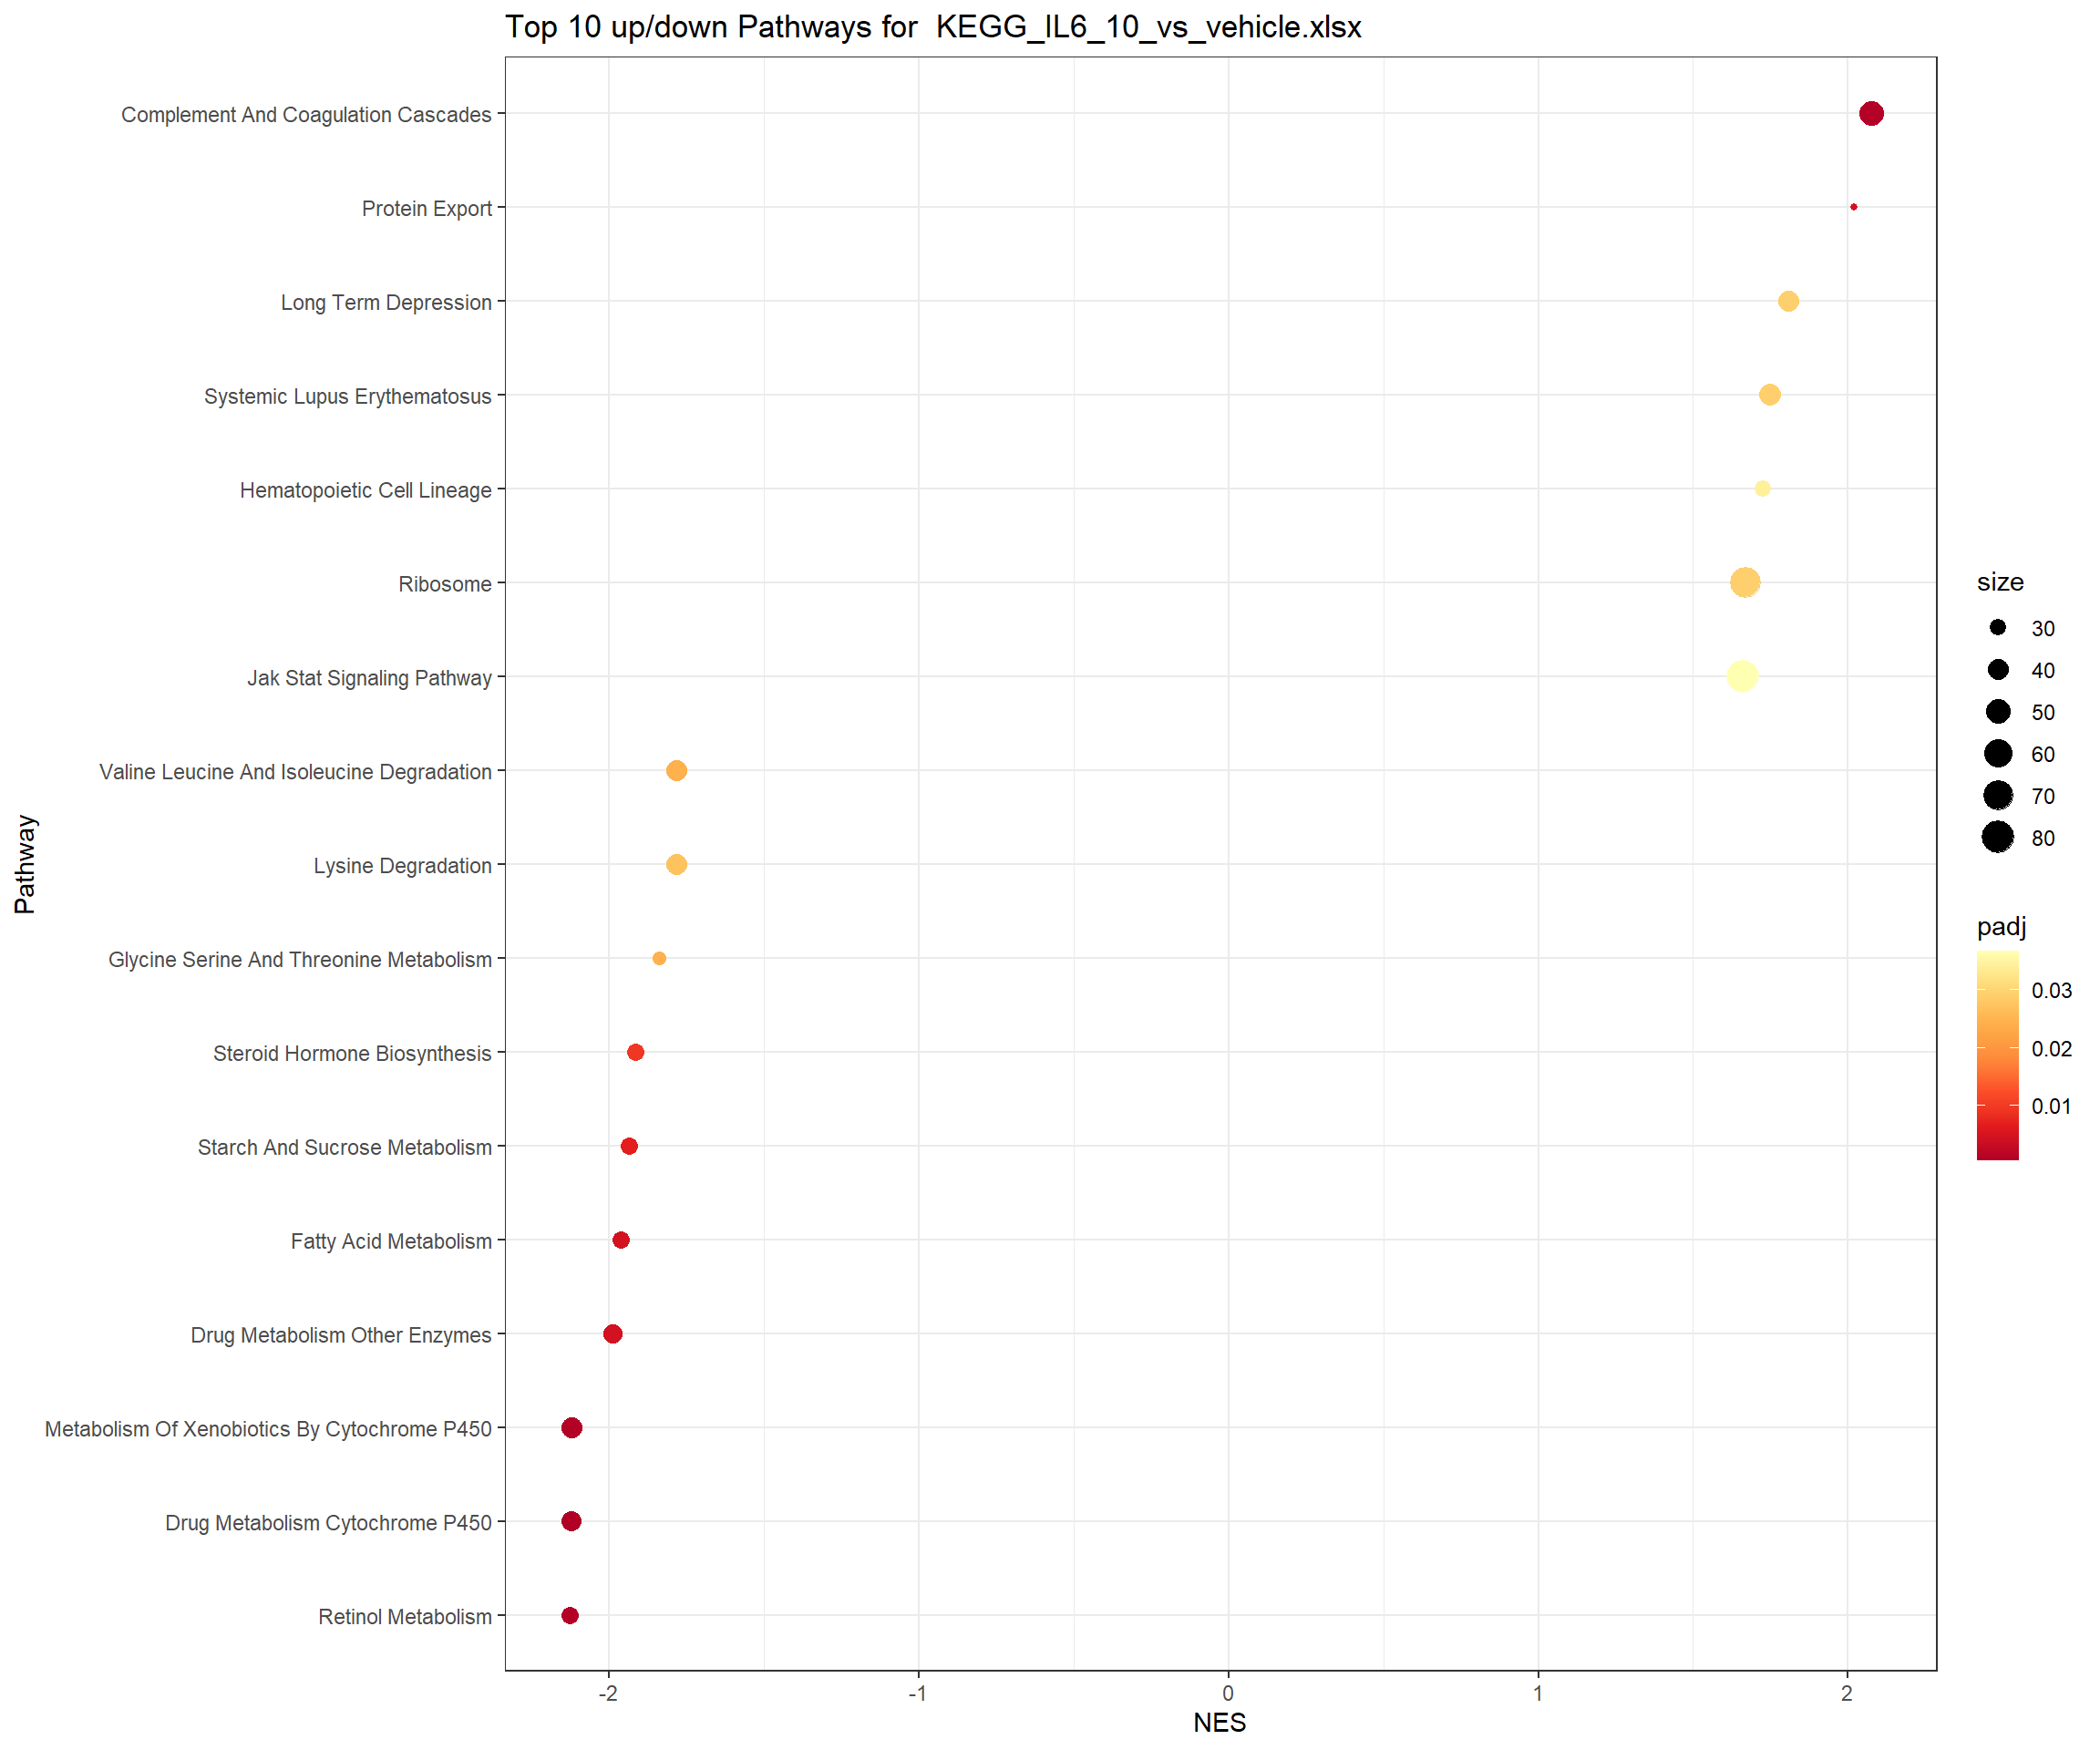

In [ ]:

KEGG_plot_list[[5]]


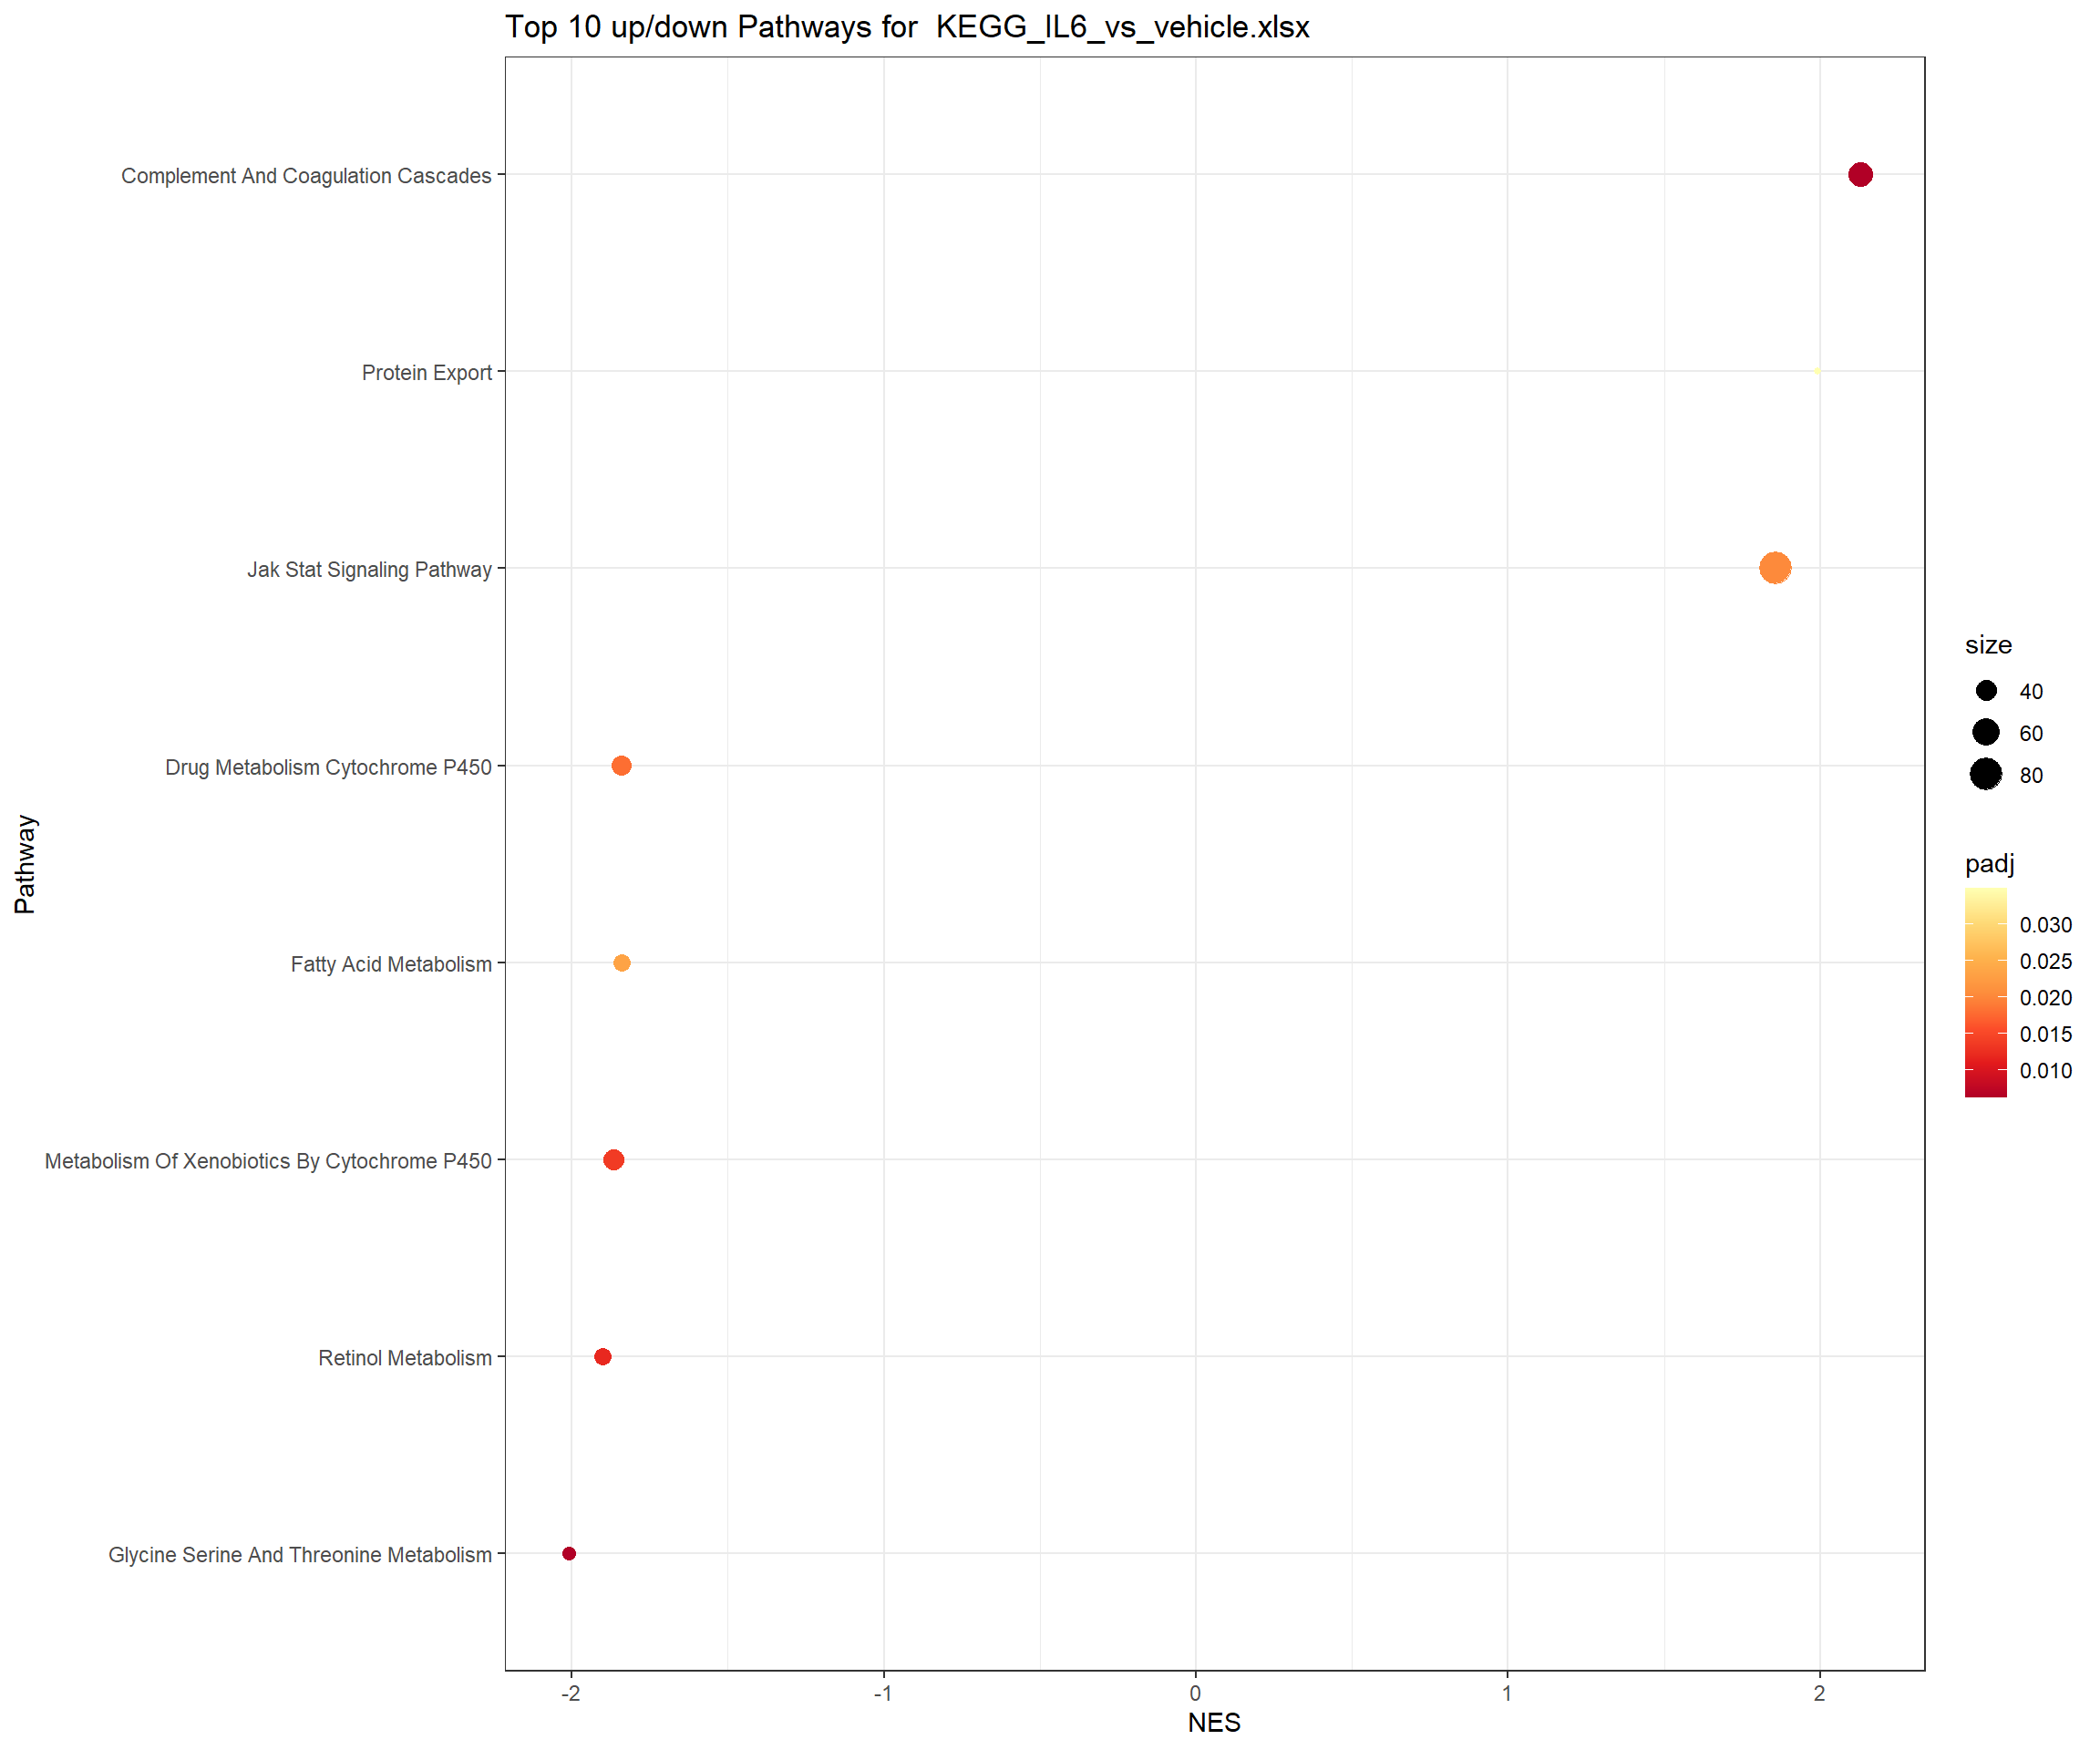

In [ ]:

KEGG_plot_list[[6]]


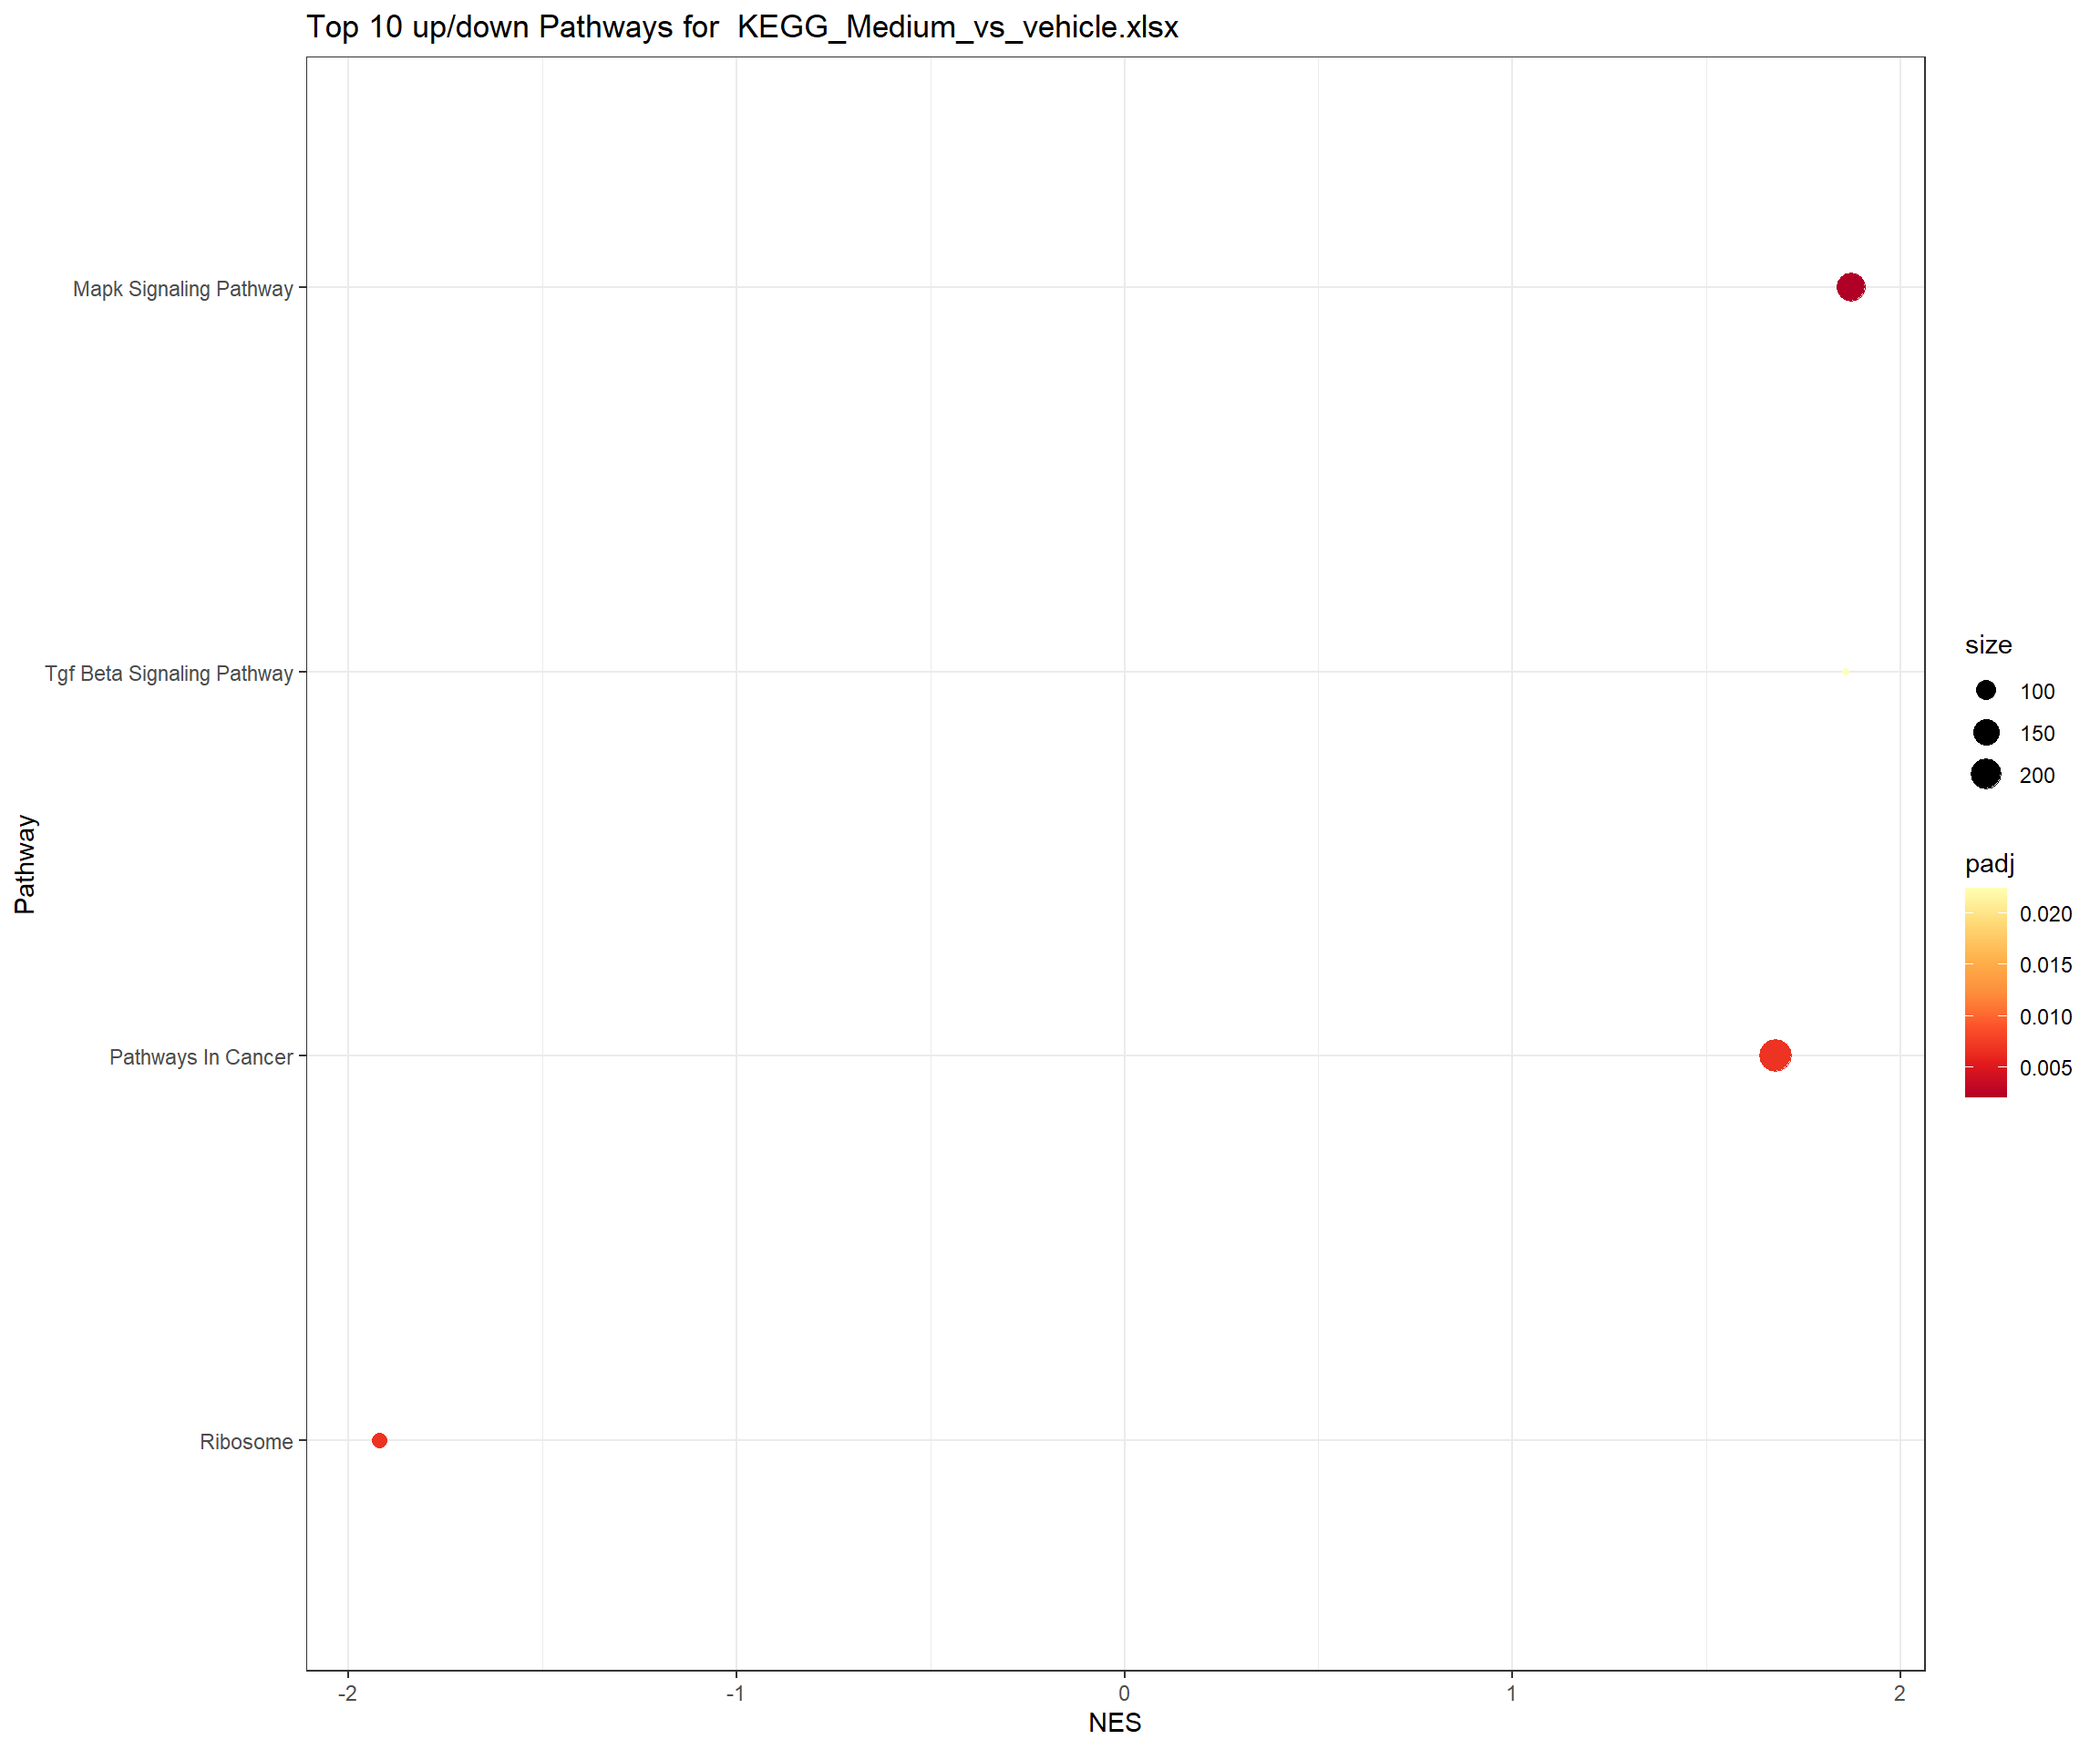

In [ ]:

KEGG_plot_list[[7]]


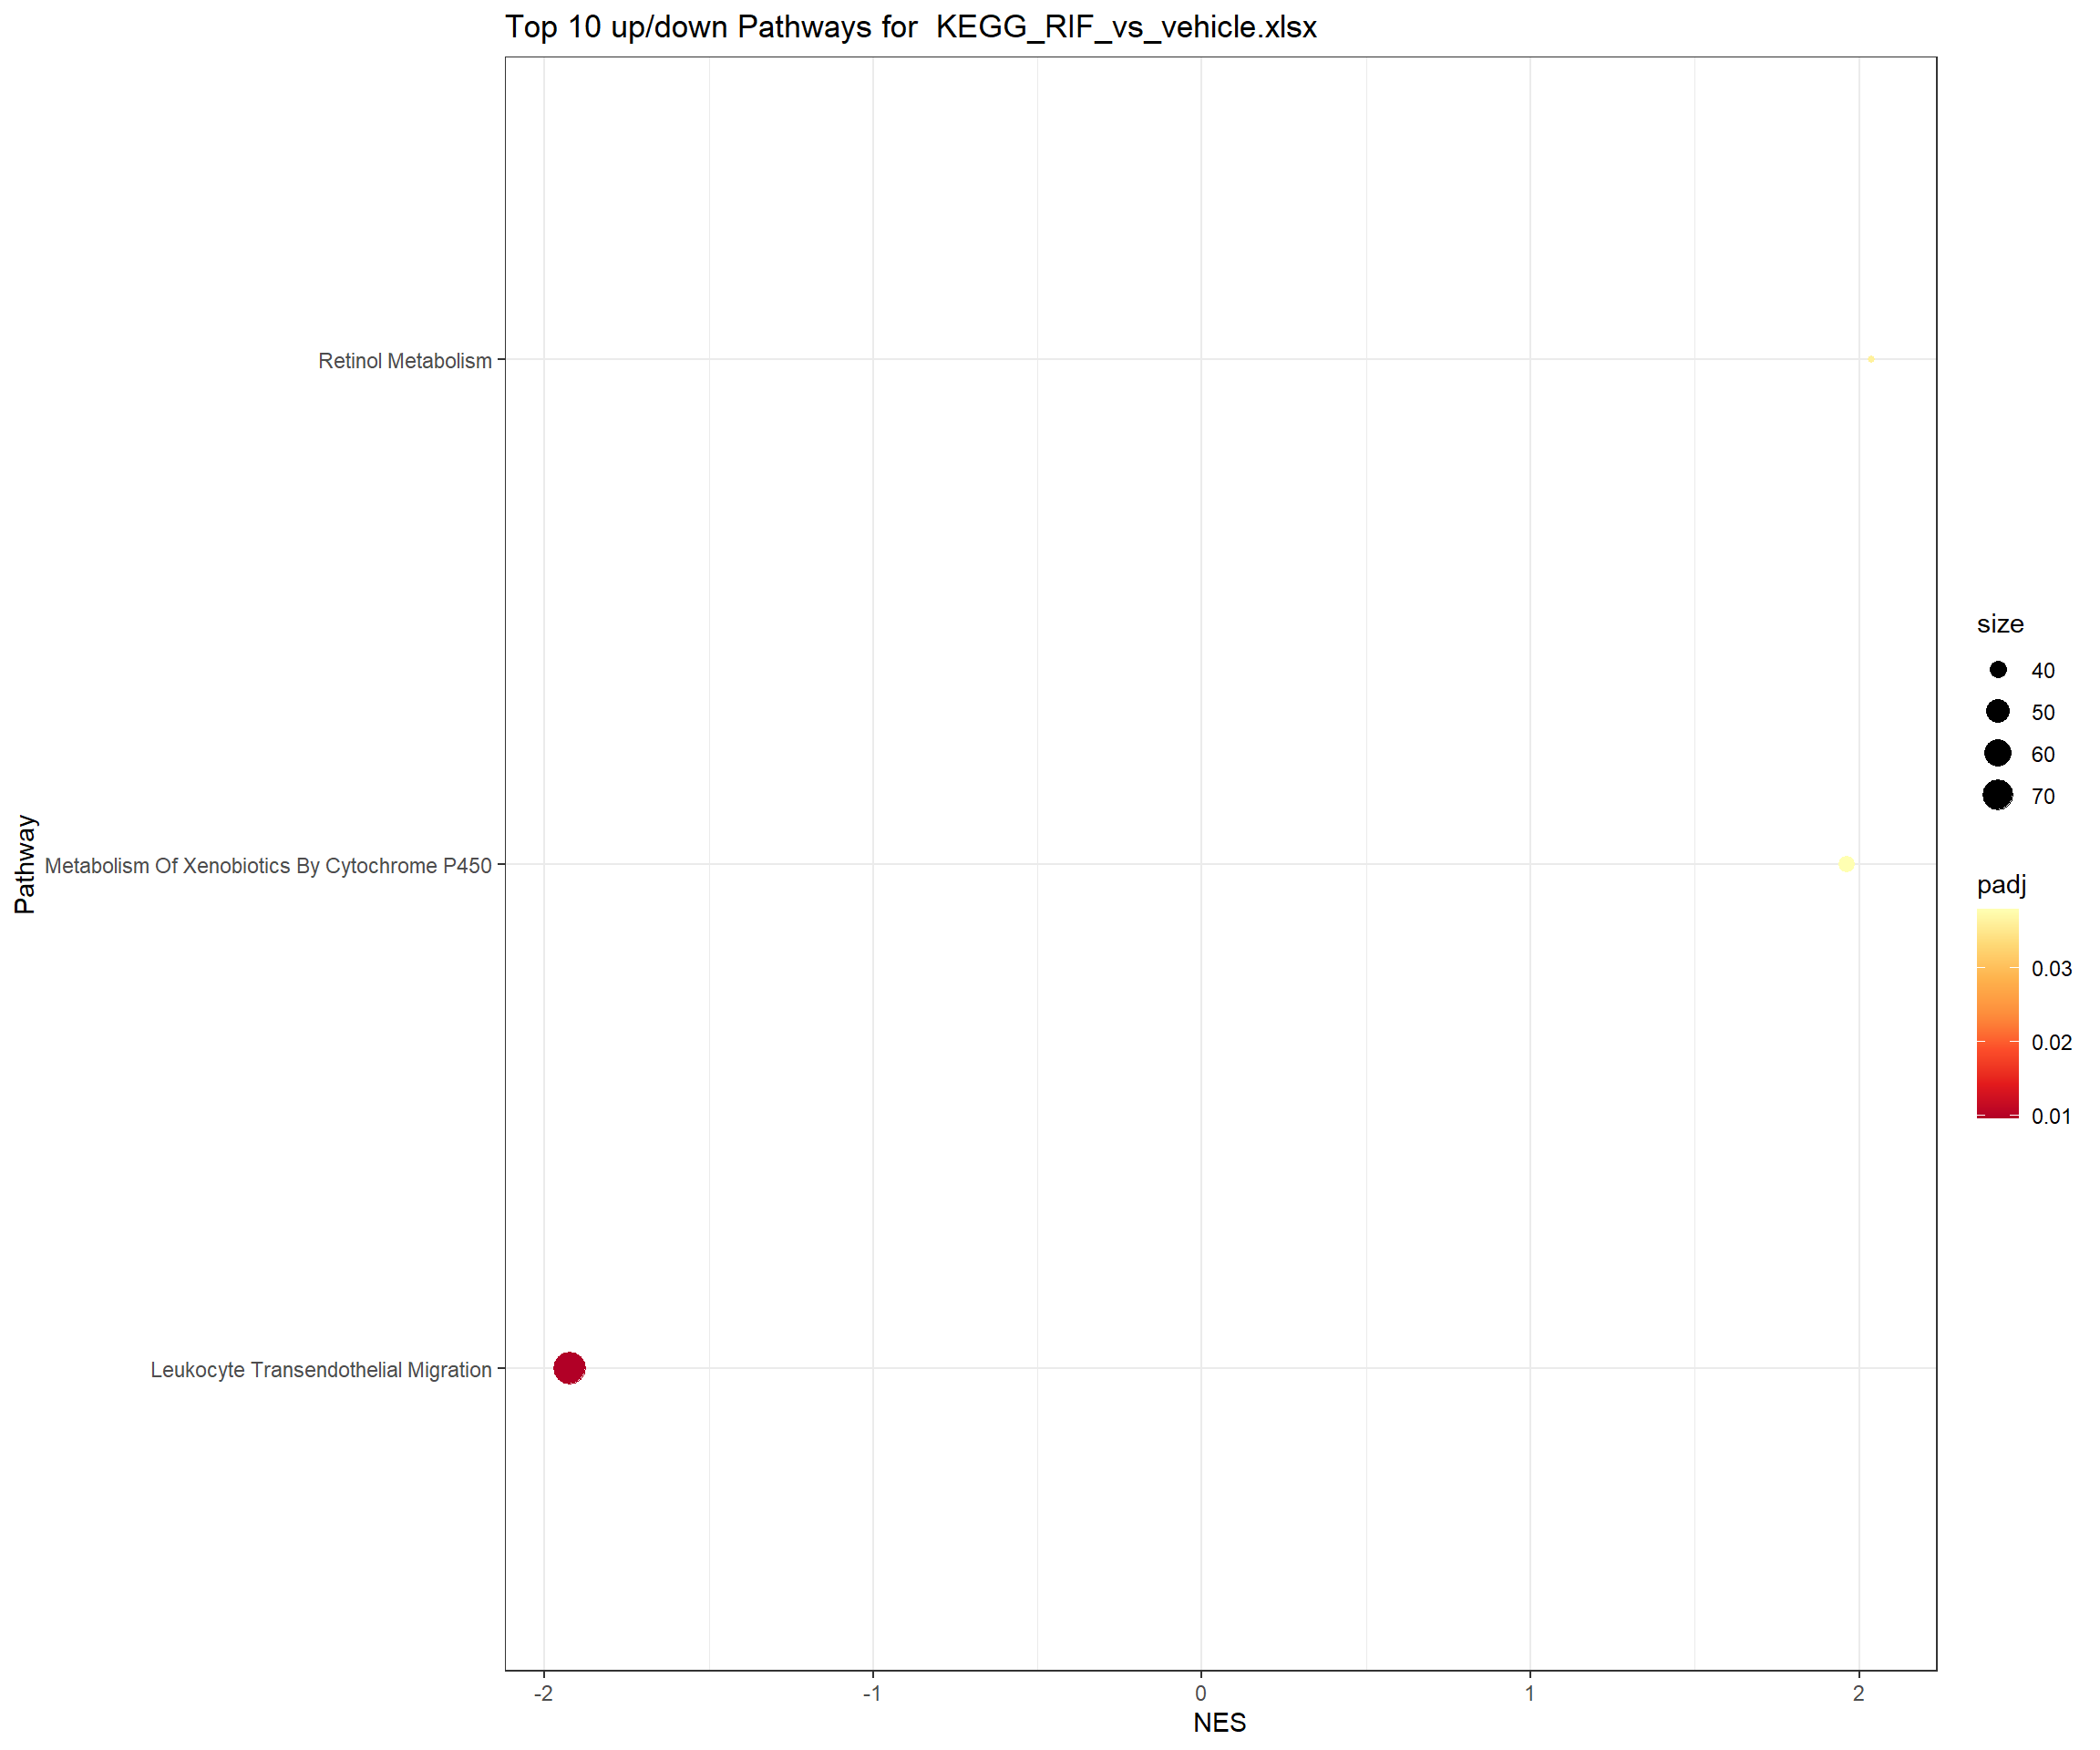

In [ ]:

KEGG_plot_list[[8]]


#### BIOCARTA

**Plot all using a function**

Get all file paths related to BIOCARTA

In [ ]:
# Get file paths
biocarta_file_paths <- dir(here("notebooks/seq/data_raw/GSEA"), pattern = "BIOCARTA", full.names = TRUE)

# Subset to interleukines if wanted
# kegg_file_paths[grep(pattern = "IL", kegg_file_paths)]


In [ ]:
BIOCARTA_plot_list <- map(biocarta_file_paths, function(file_path) {
  # Read the file
  plot_data <- read_excel(file_path)
  
  # Process the data
  processed_data <- plot_data %>%
    arrange(desc(abs(NES))) %>%
    group_by(sign_NES = sign(NES)) %>%
    slice_head(n = 10) %>%
    ungroup() %>%
    filter(padj <= 0.05) %>%
    mutate(pathway = str_remove_all(pathway, "BIOCARTA"),
           pathway = str_replace_all(pathway, pattern = "_", replacement = " "),
           pathway = str_to_title(pathway))
  
  # Generate the plot
  ggplot(processed_data, aes(x = NES, y = fct_reorder(pathway, NES), color = padj, size = size)) +
    geom_point(stat = 'identity') +
    labs(x = "NES", y = "Pathway", title = paste("Top 10 up/down Pathways for","", basename(file_path))) +
    theme_bw() +
    scale_color_distiller(type = "seq", palette = "YlOrRd") #+
    #theme(legend.position = "none") # Remove legend to focus on the data
})


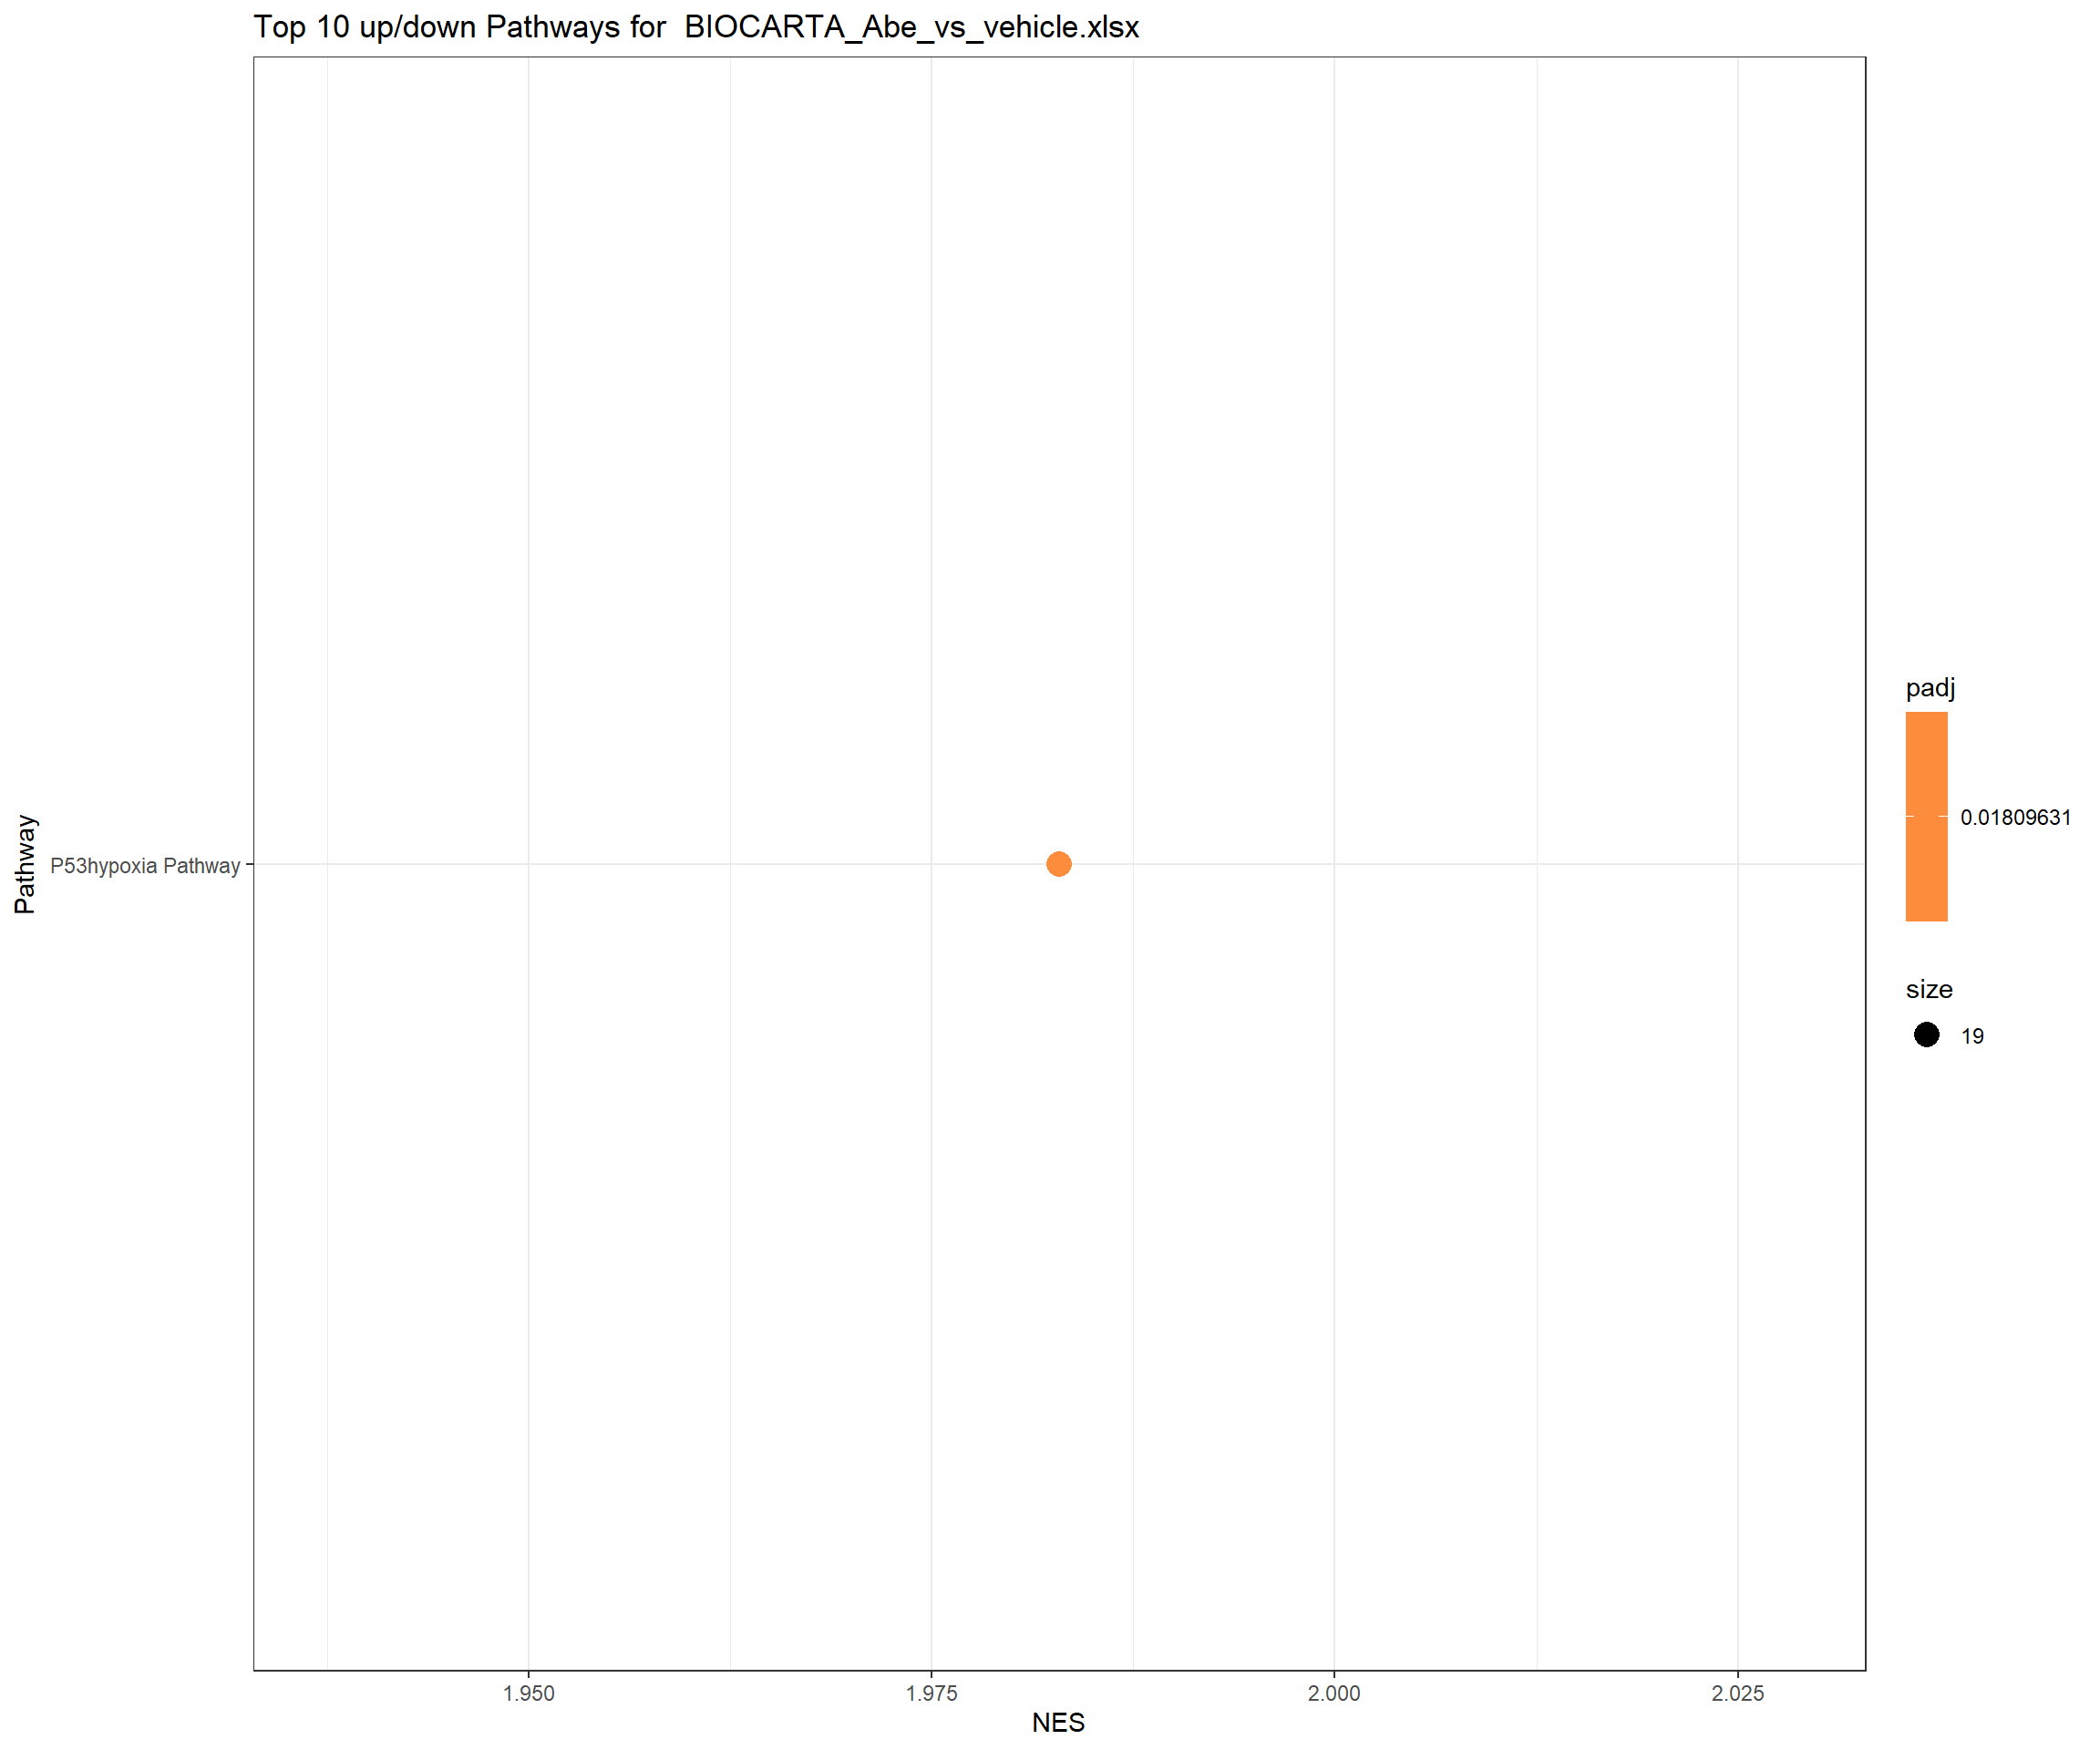

In [ ]:
BIOCARTA_plot_list[[1]]


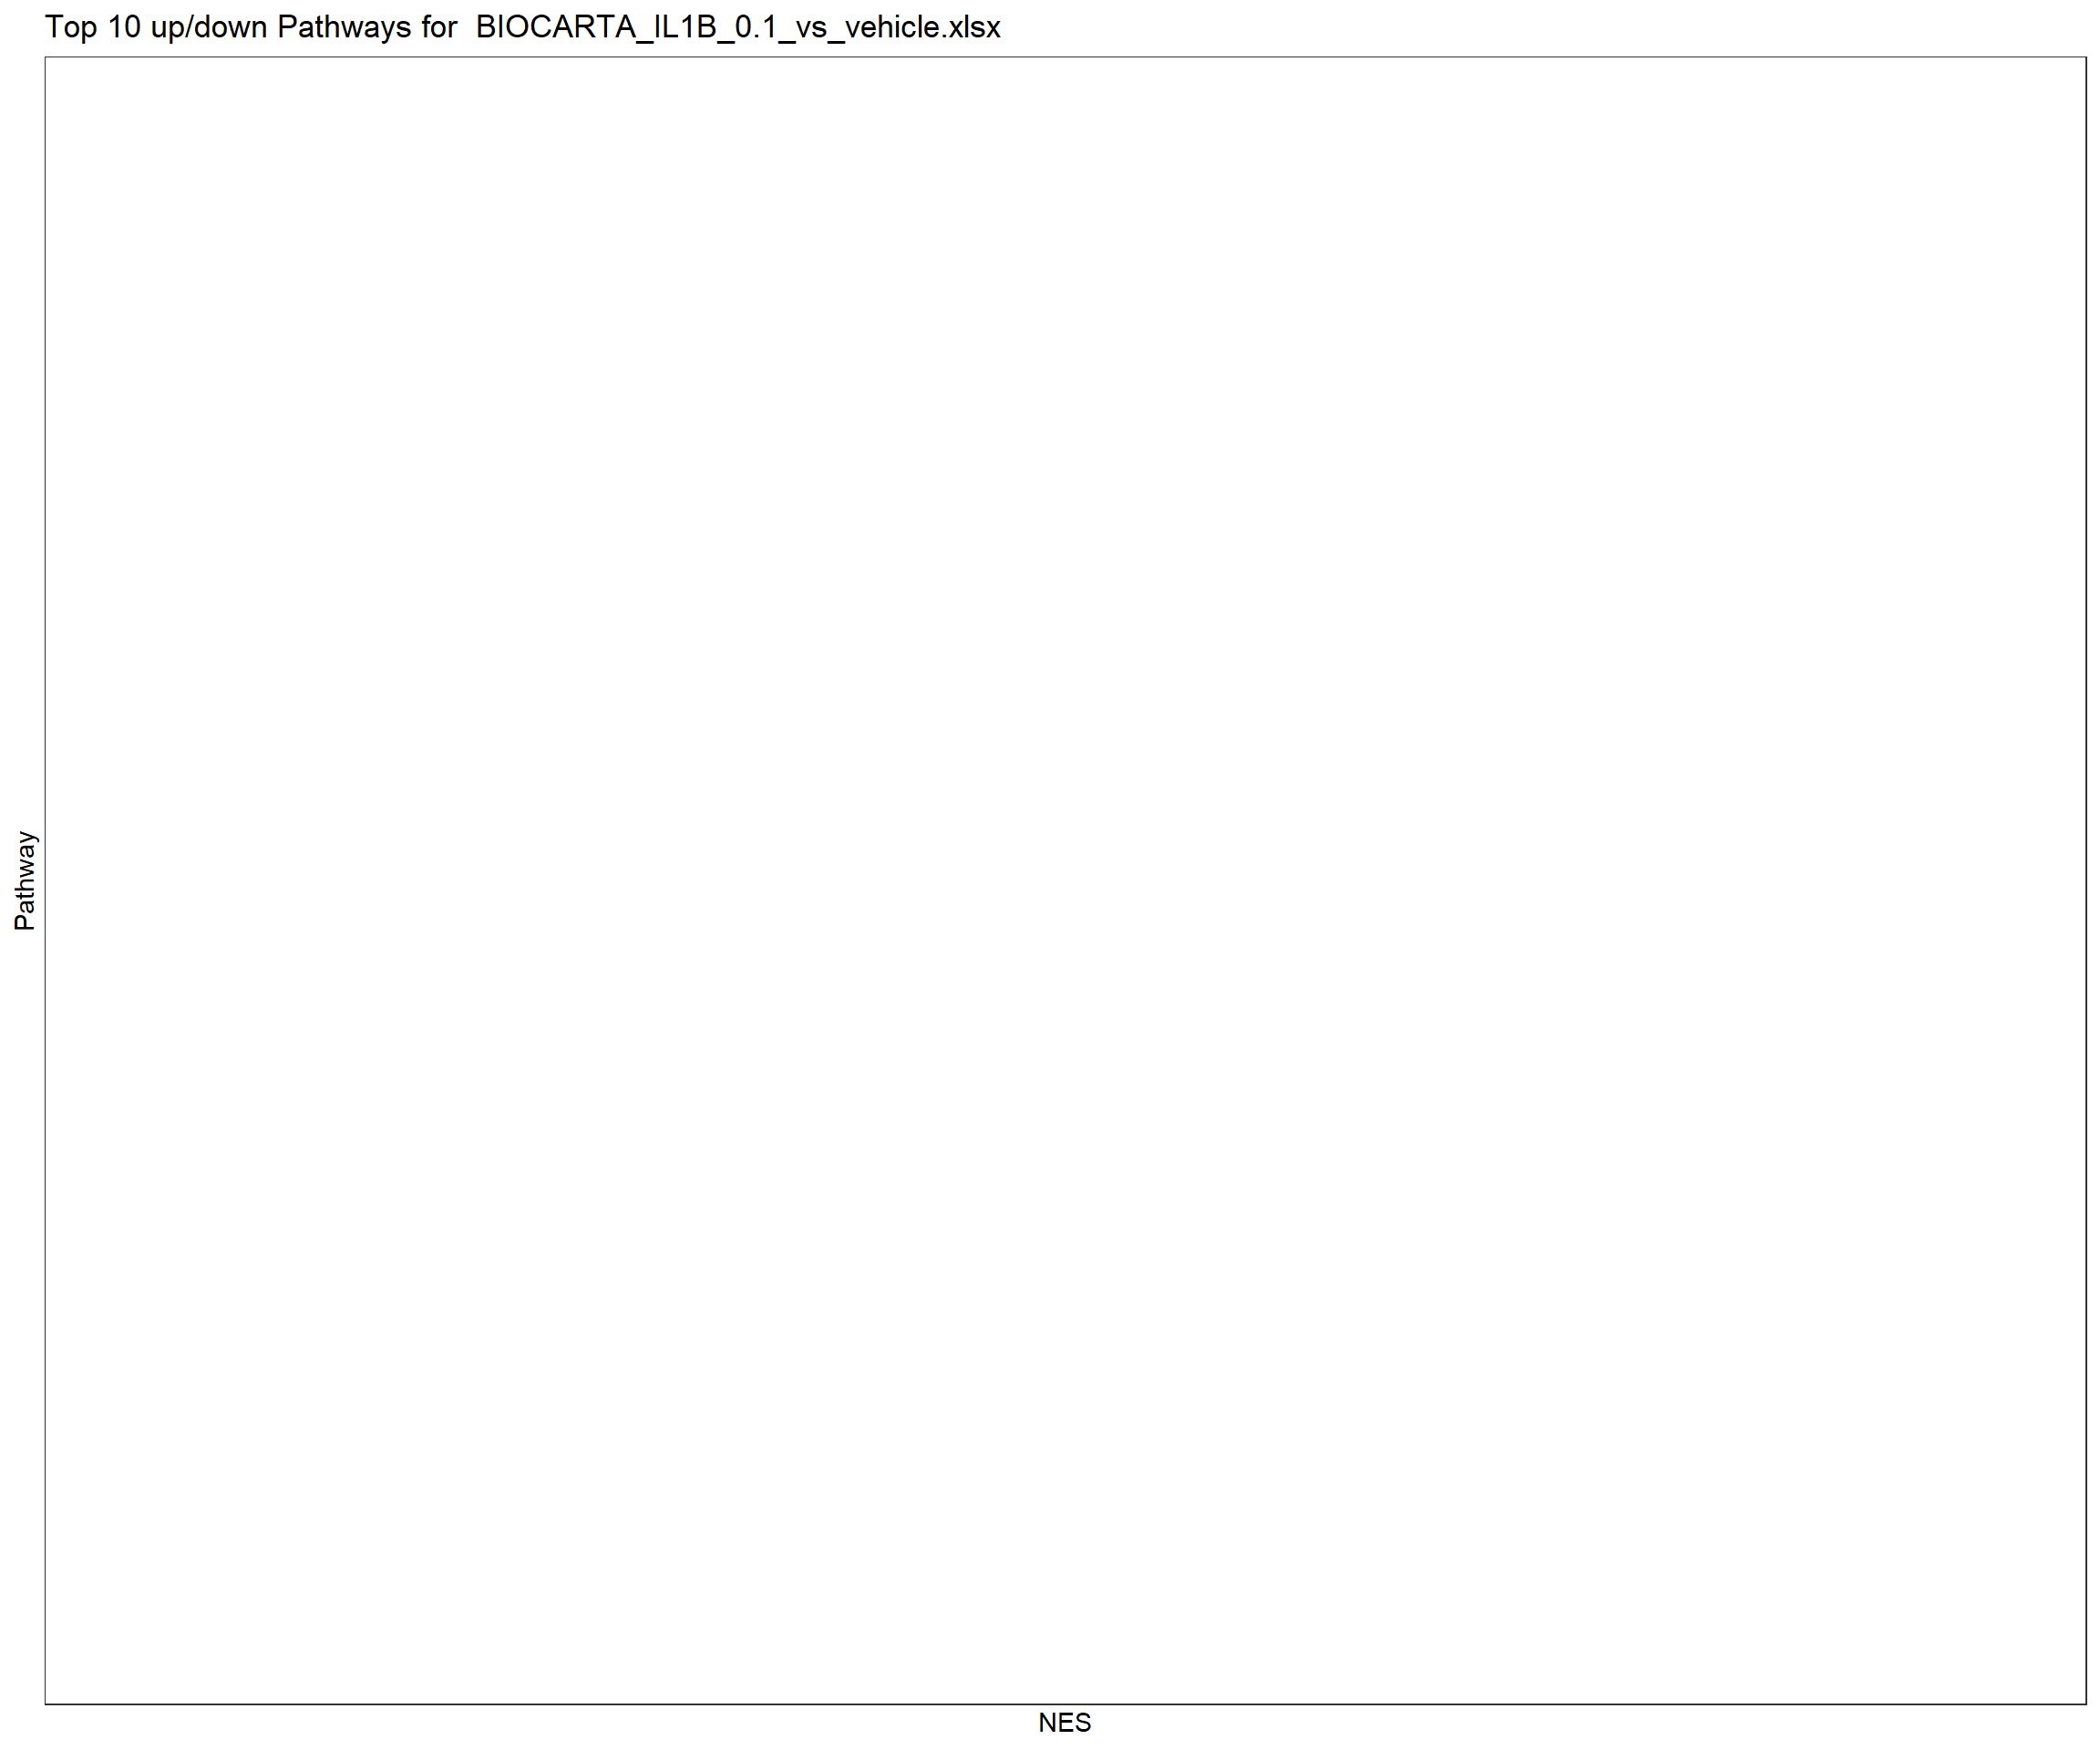

In [ ]:
BIOCARTA_plot_list[[2]]


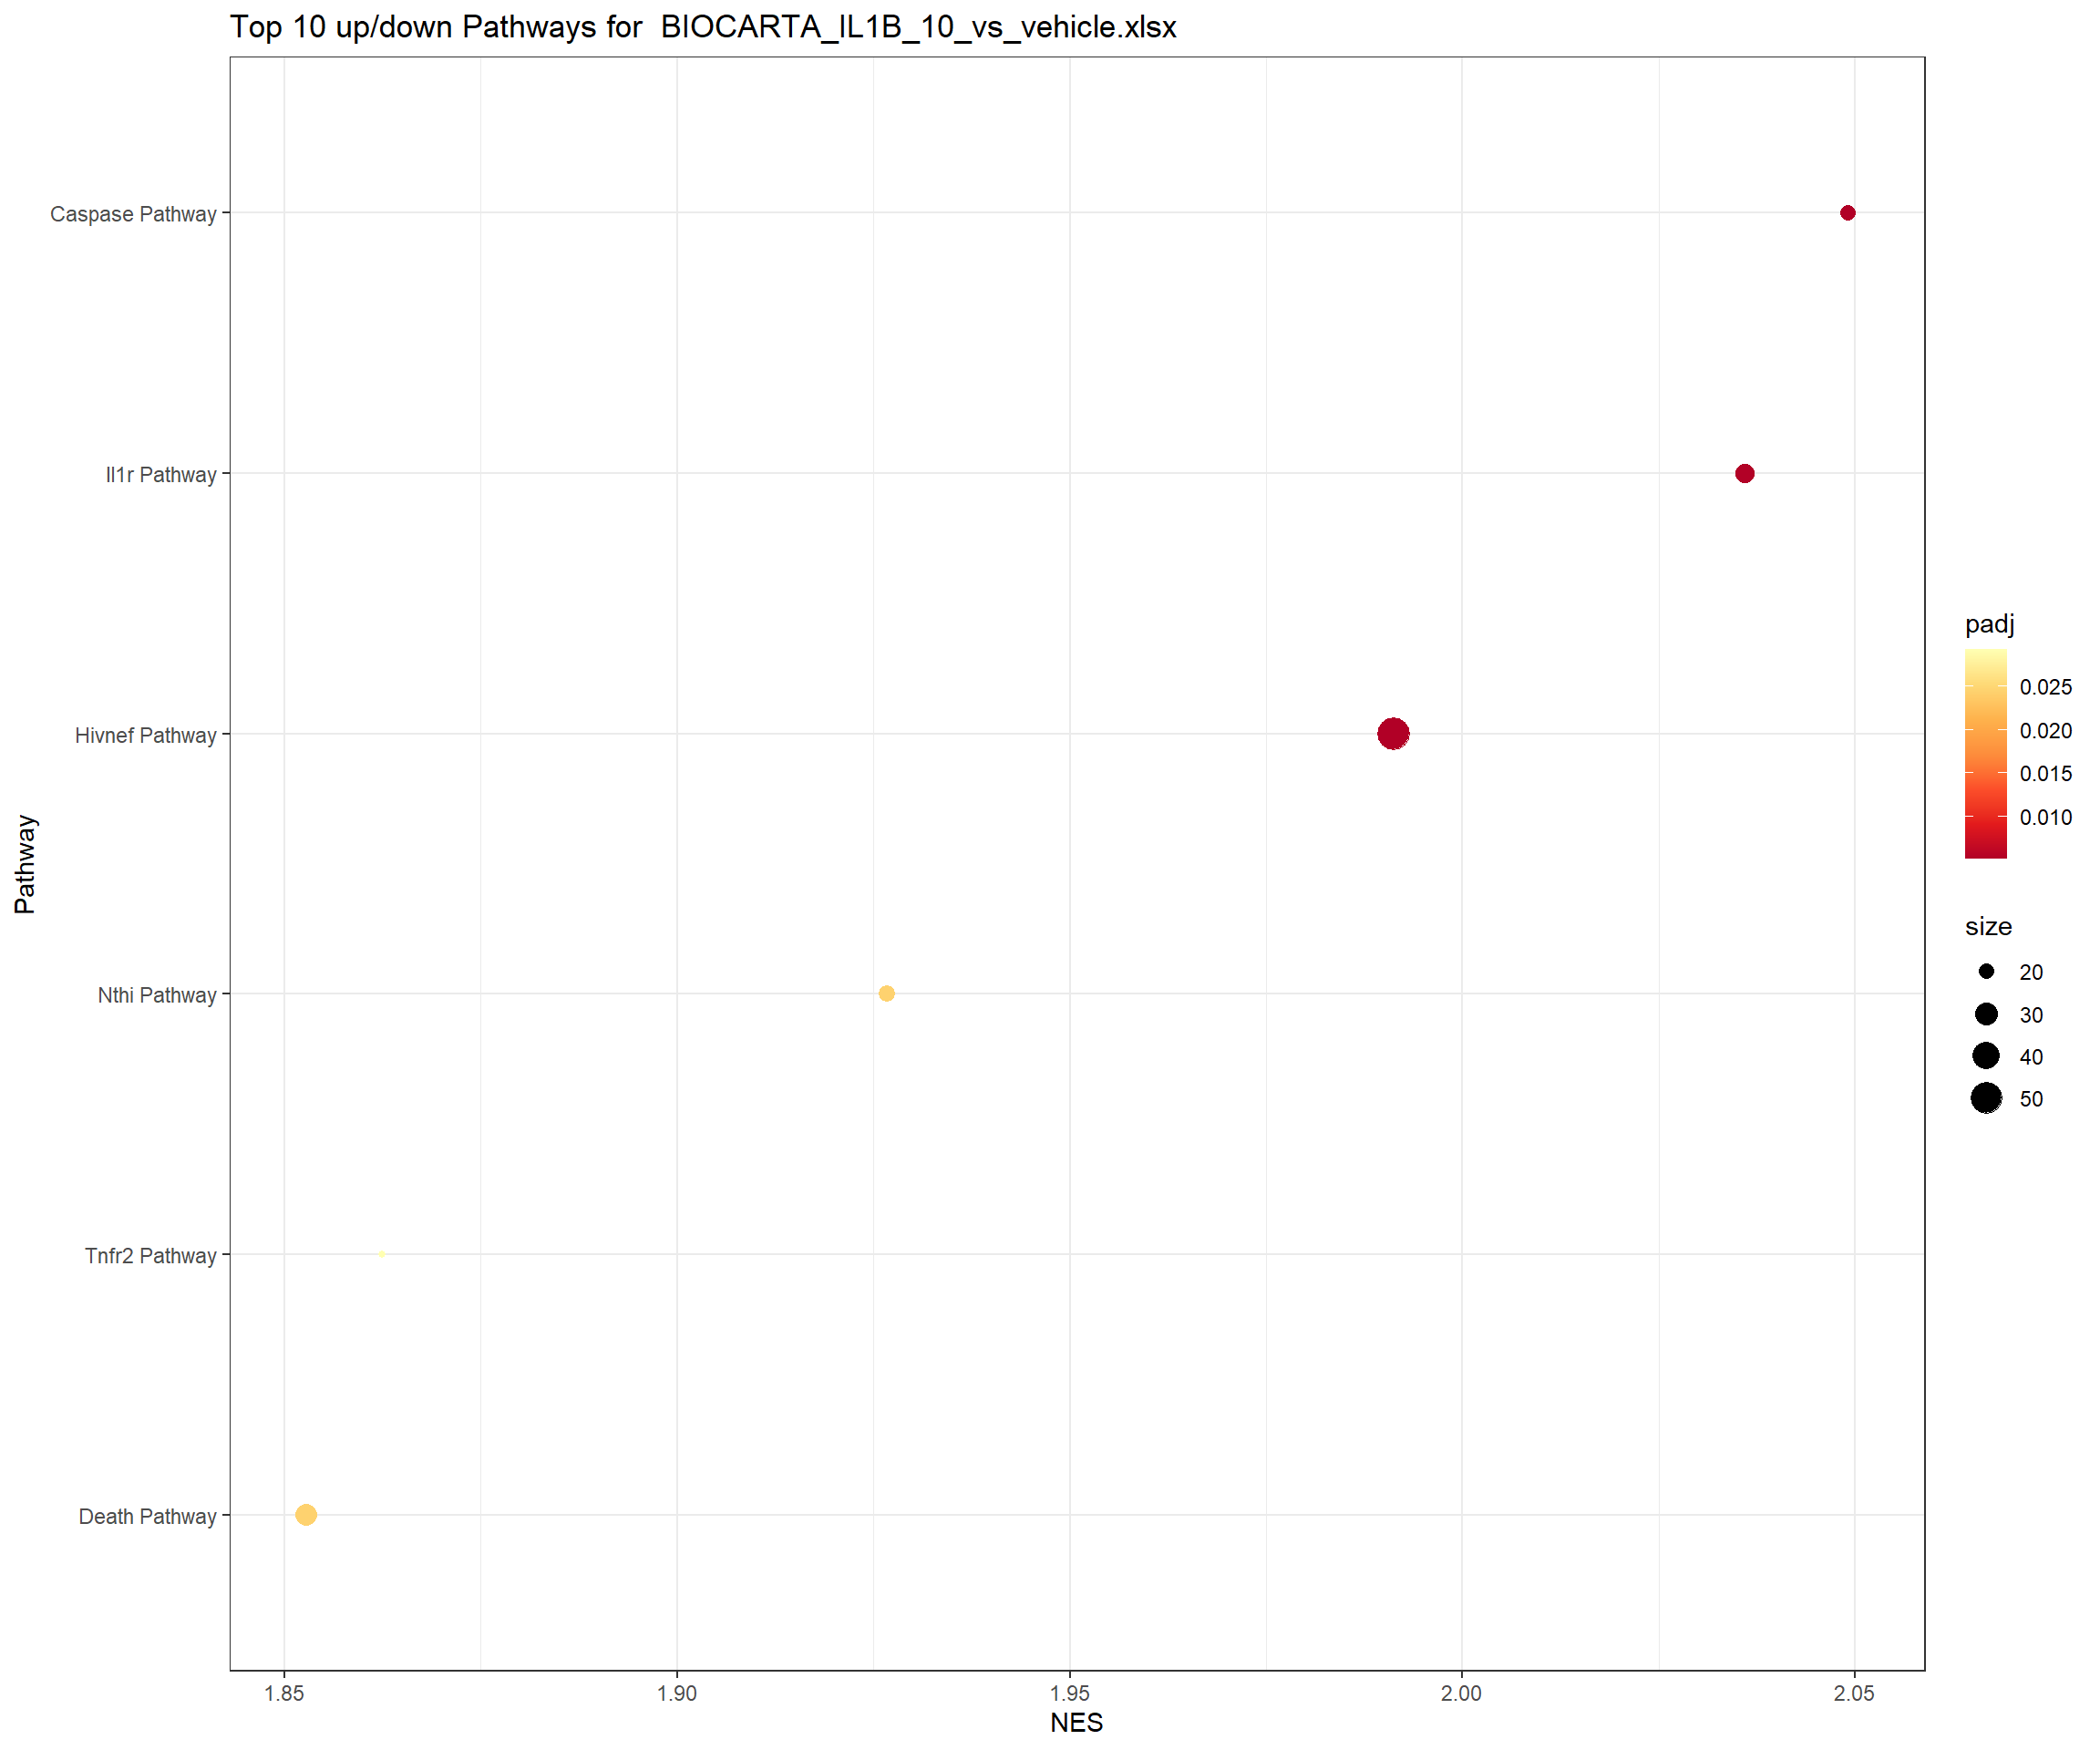

In [ ]:
BIOCARTA_plot_list[[3]]


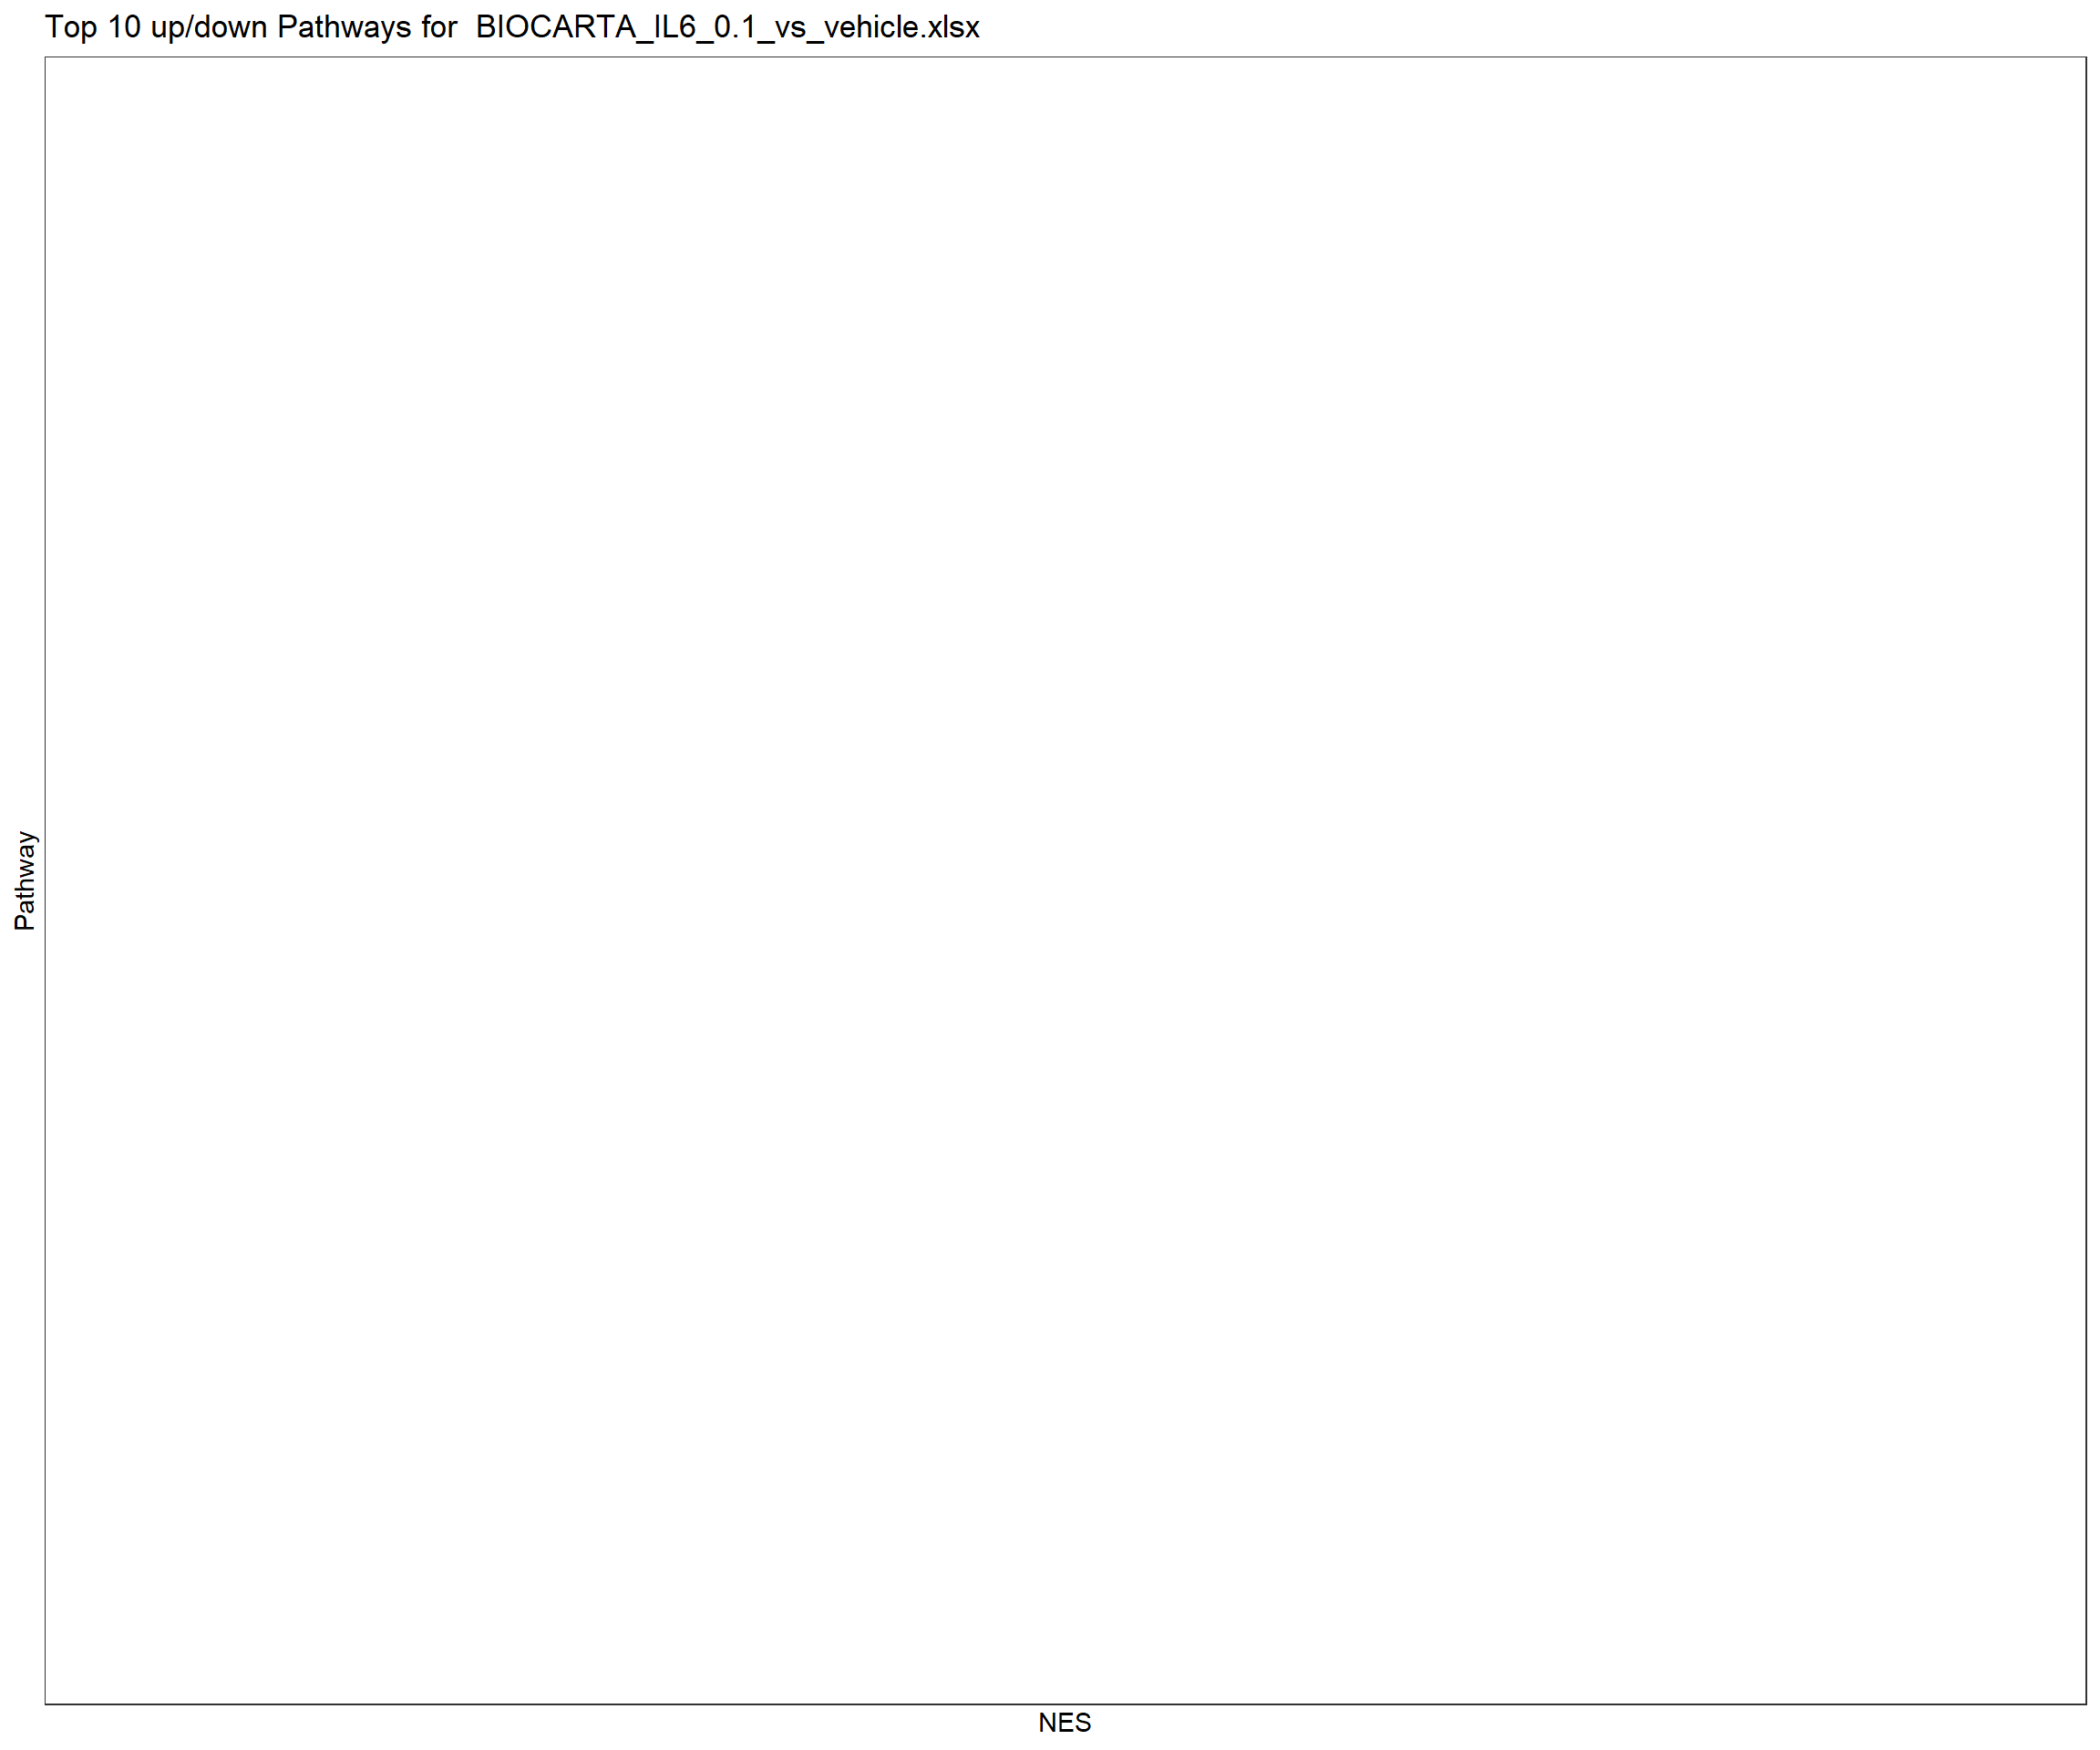

In [ ]:
BIOCARTA_plot_list[[4]]


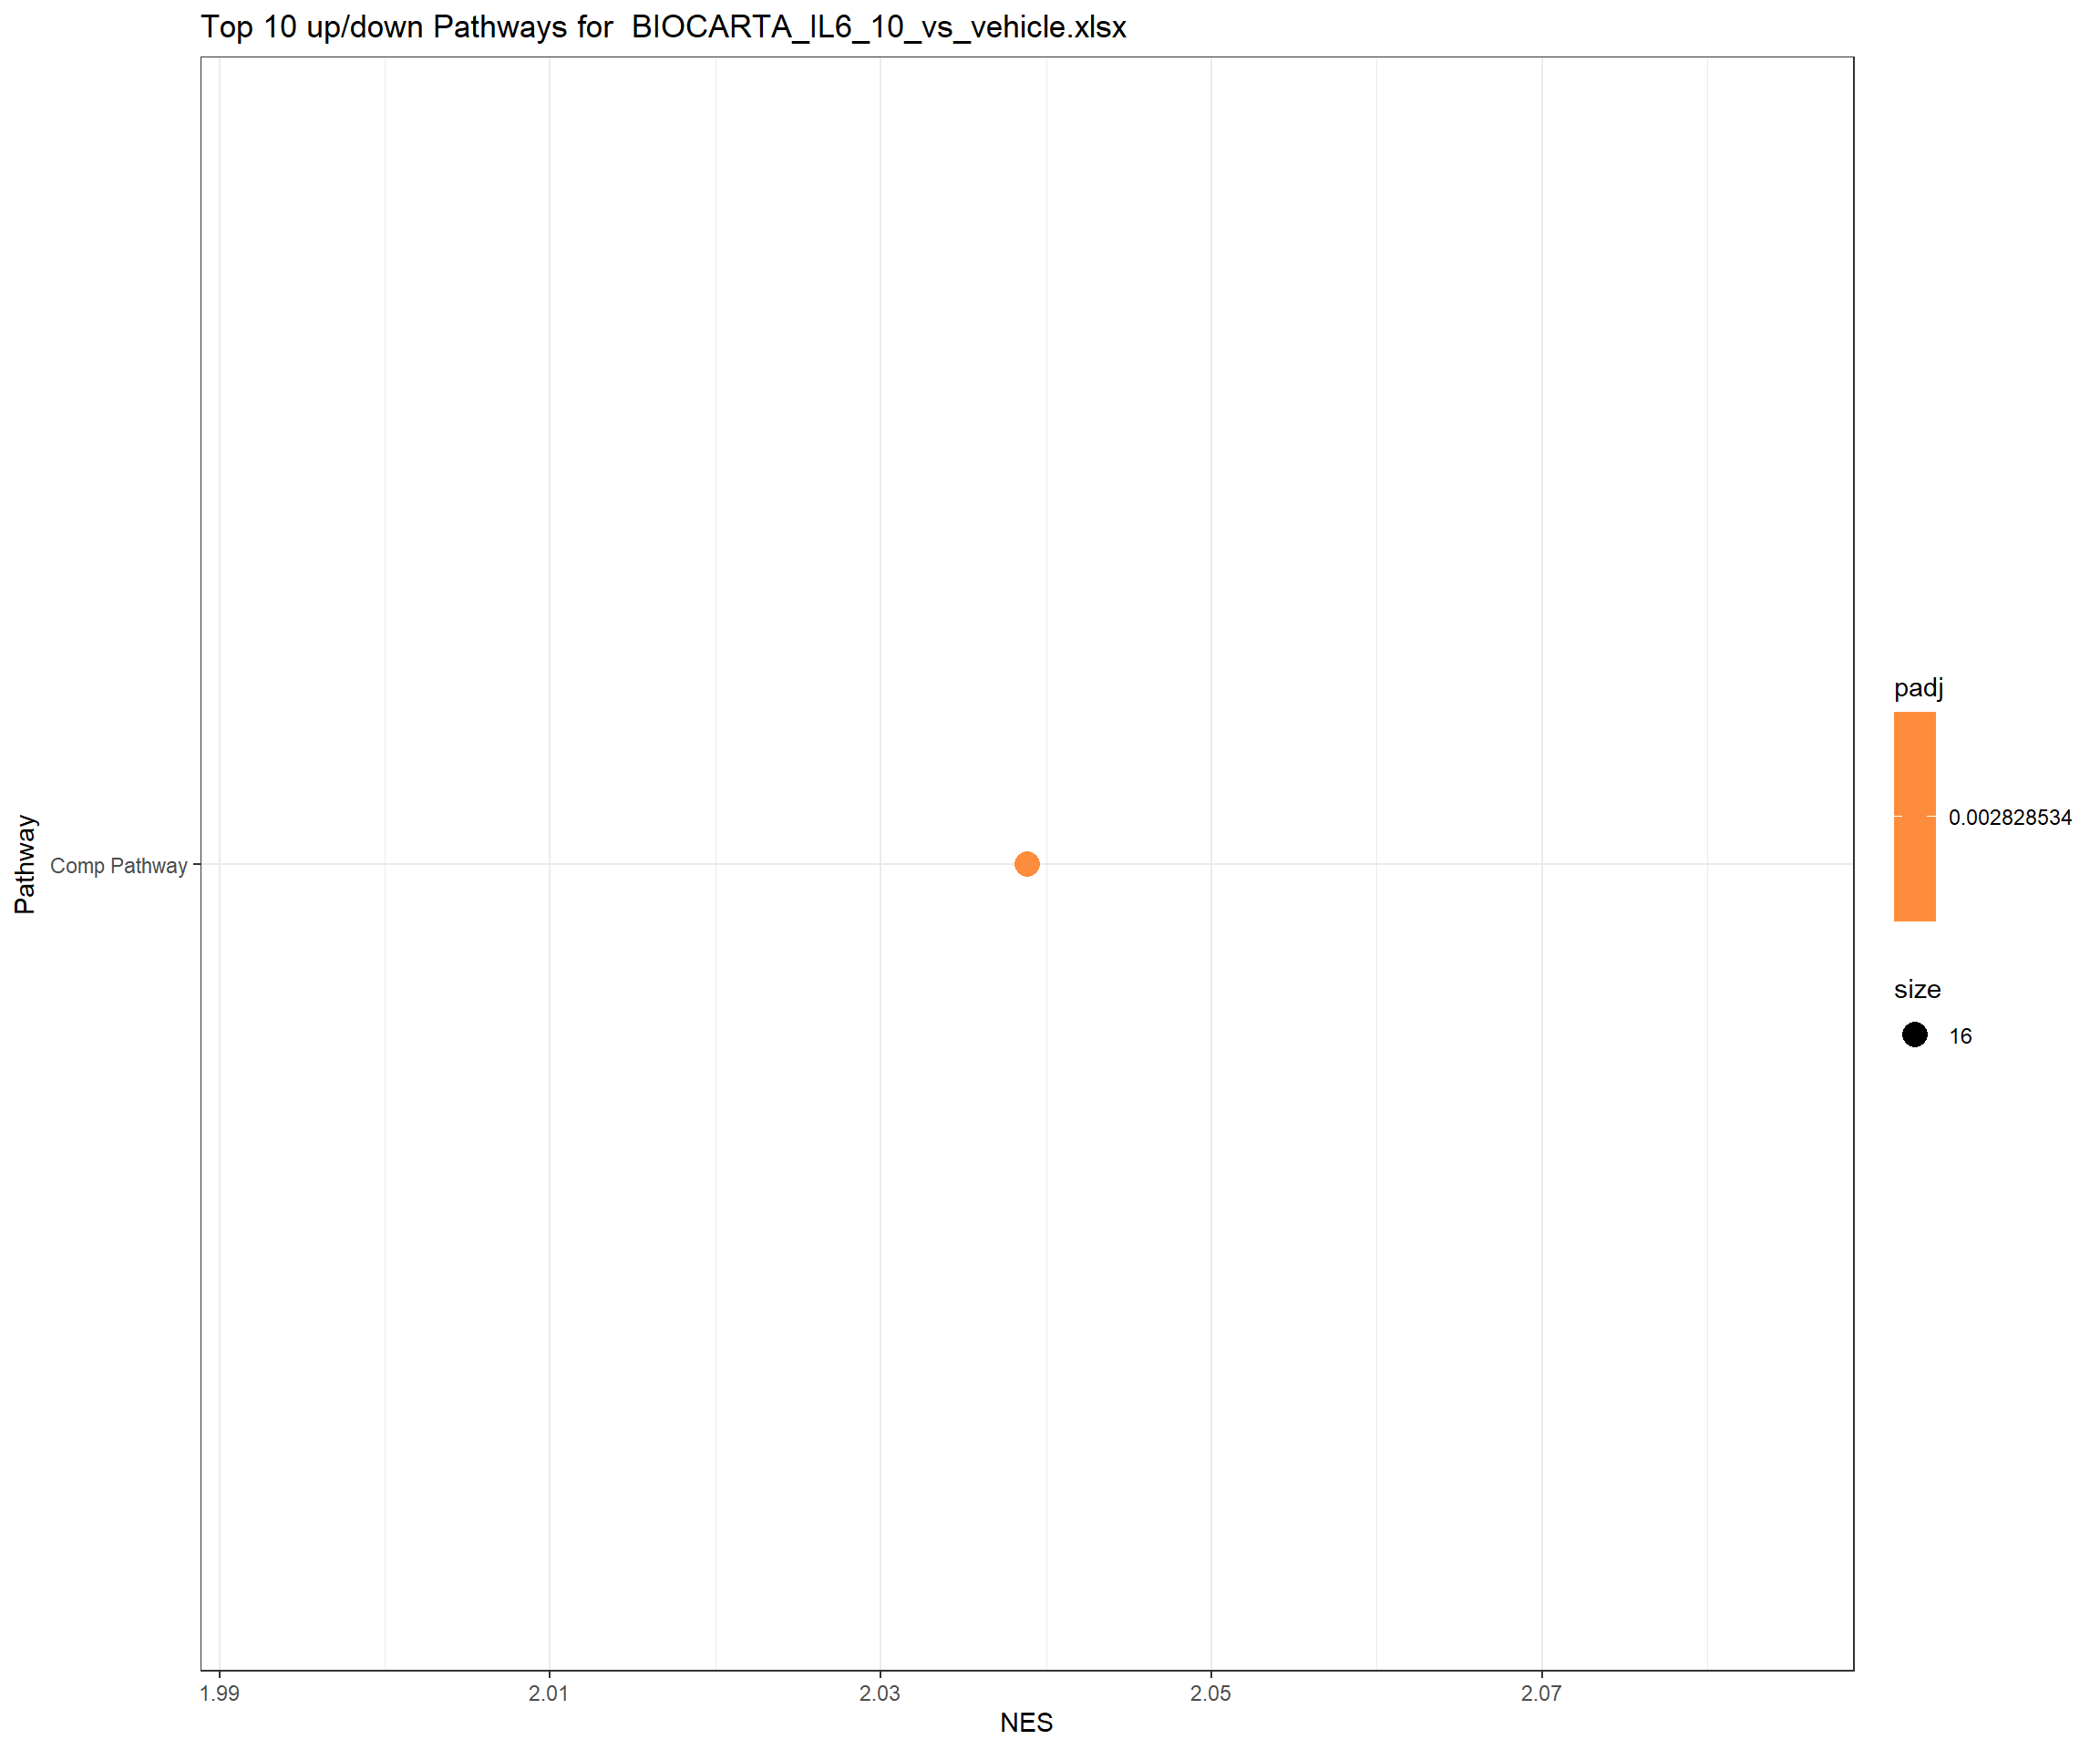

In [ ]:
BIOCARTA_plot_list[[5]]


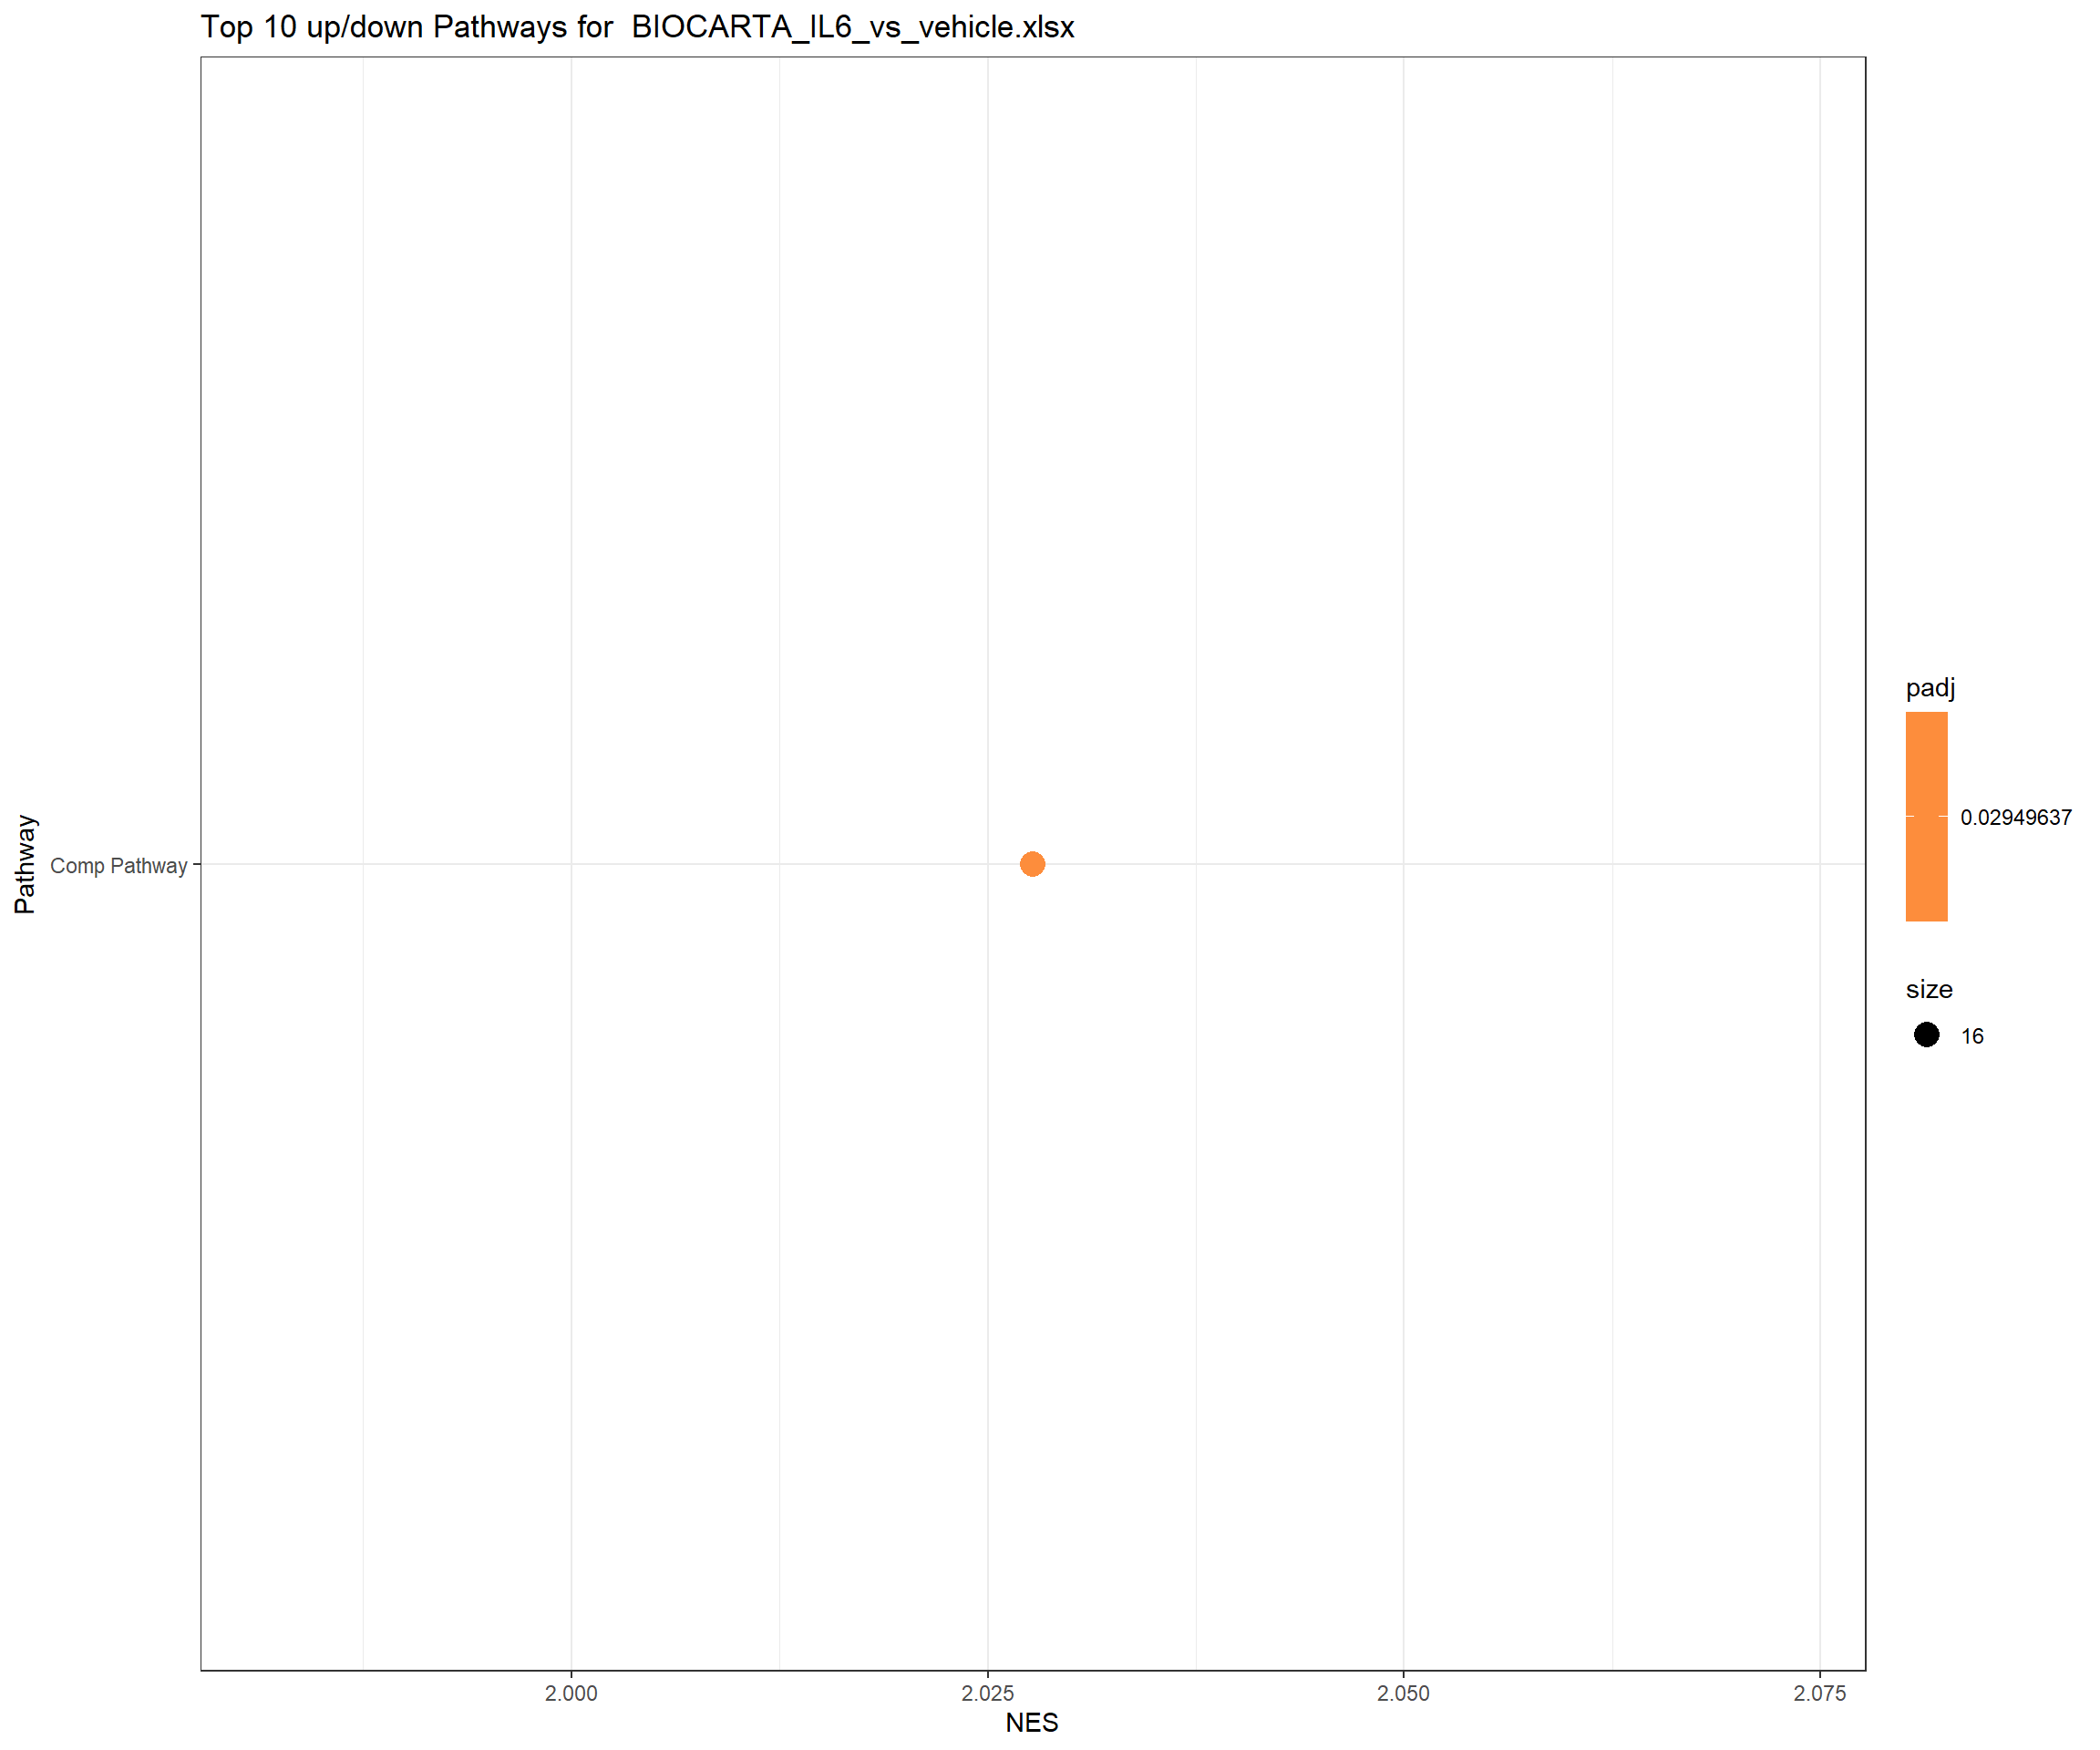

In [ ]:
BIOCARTA_plot_list[[6]]


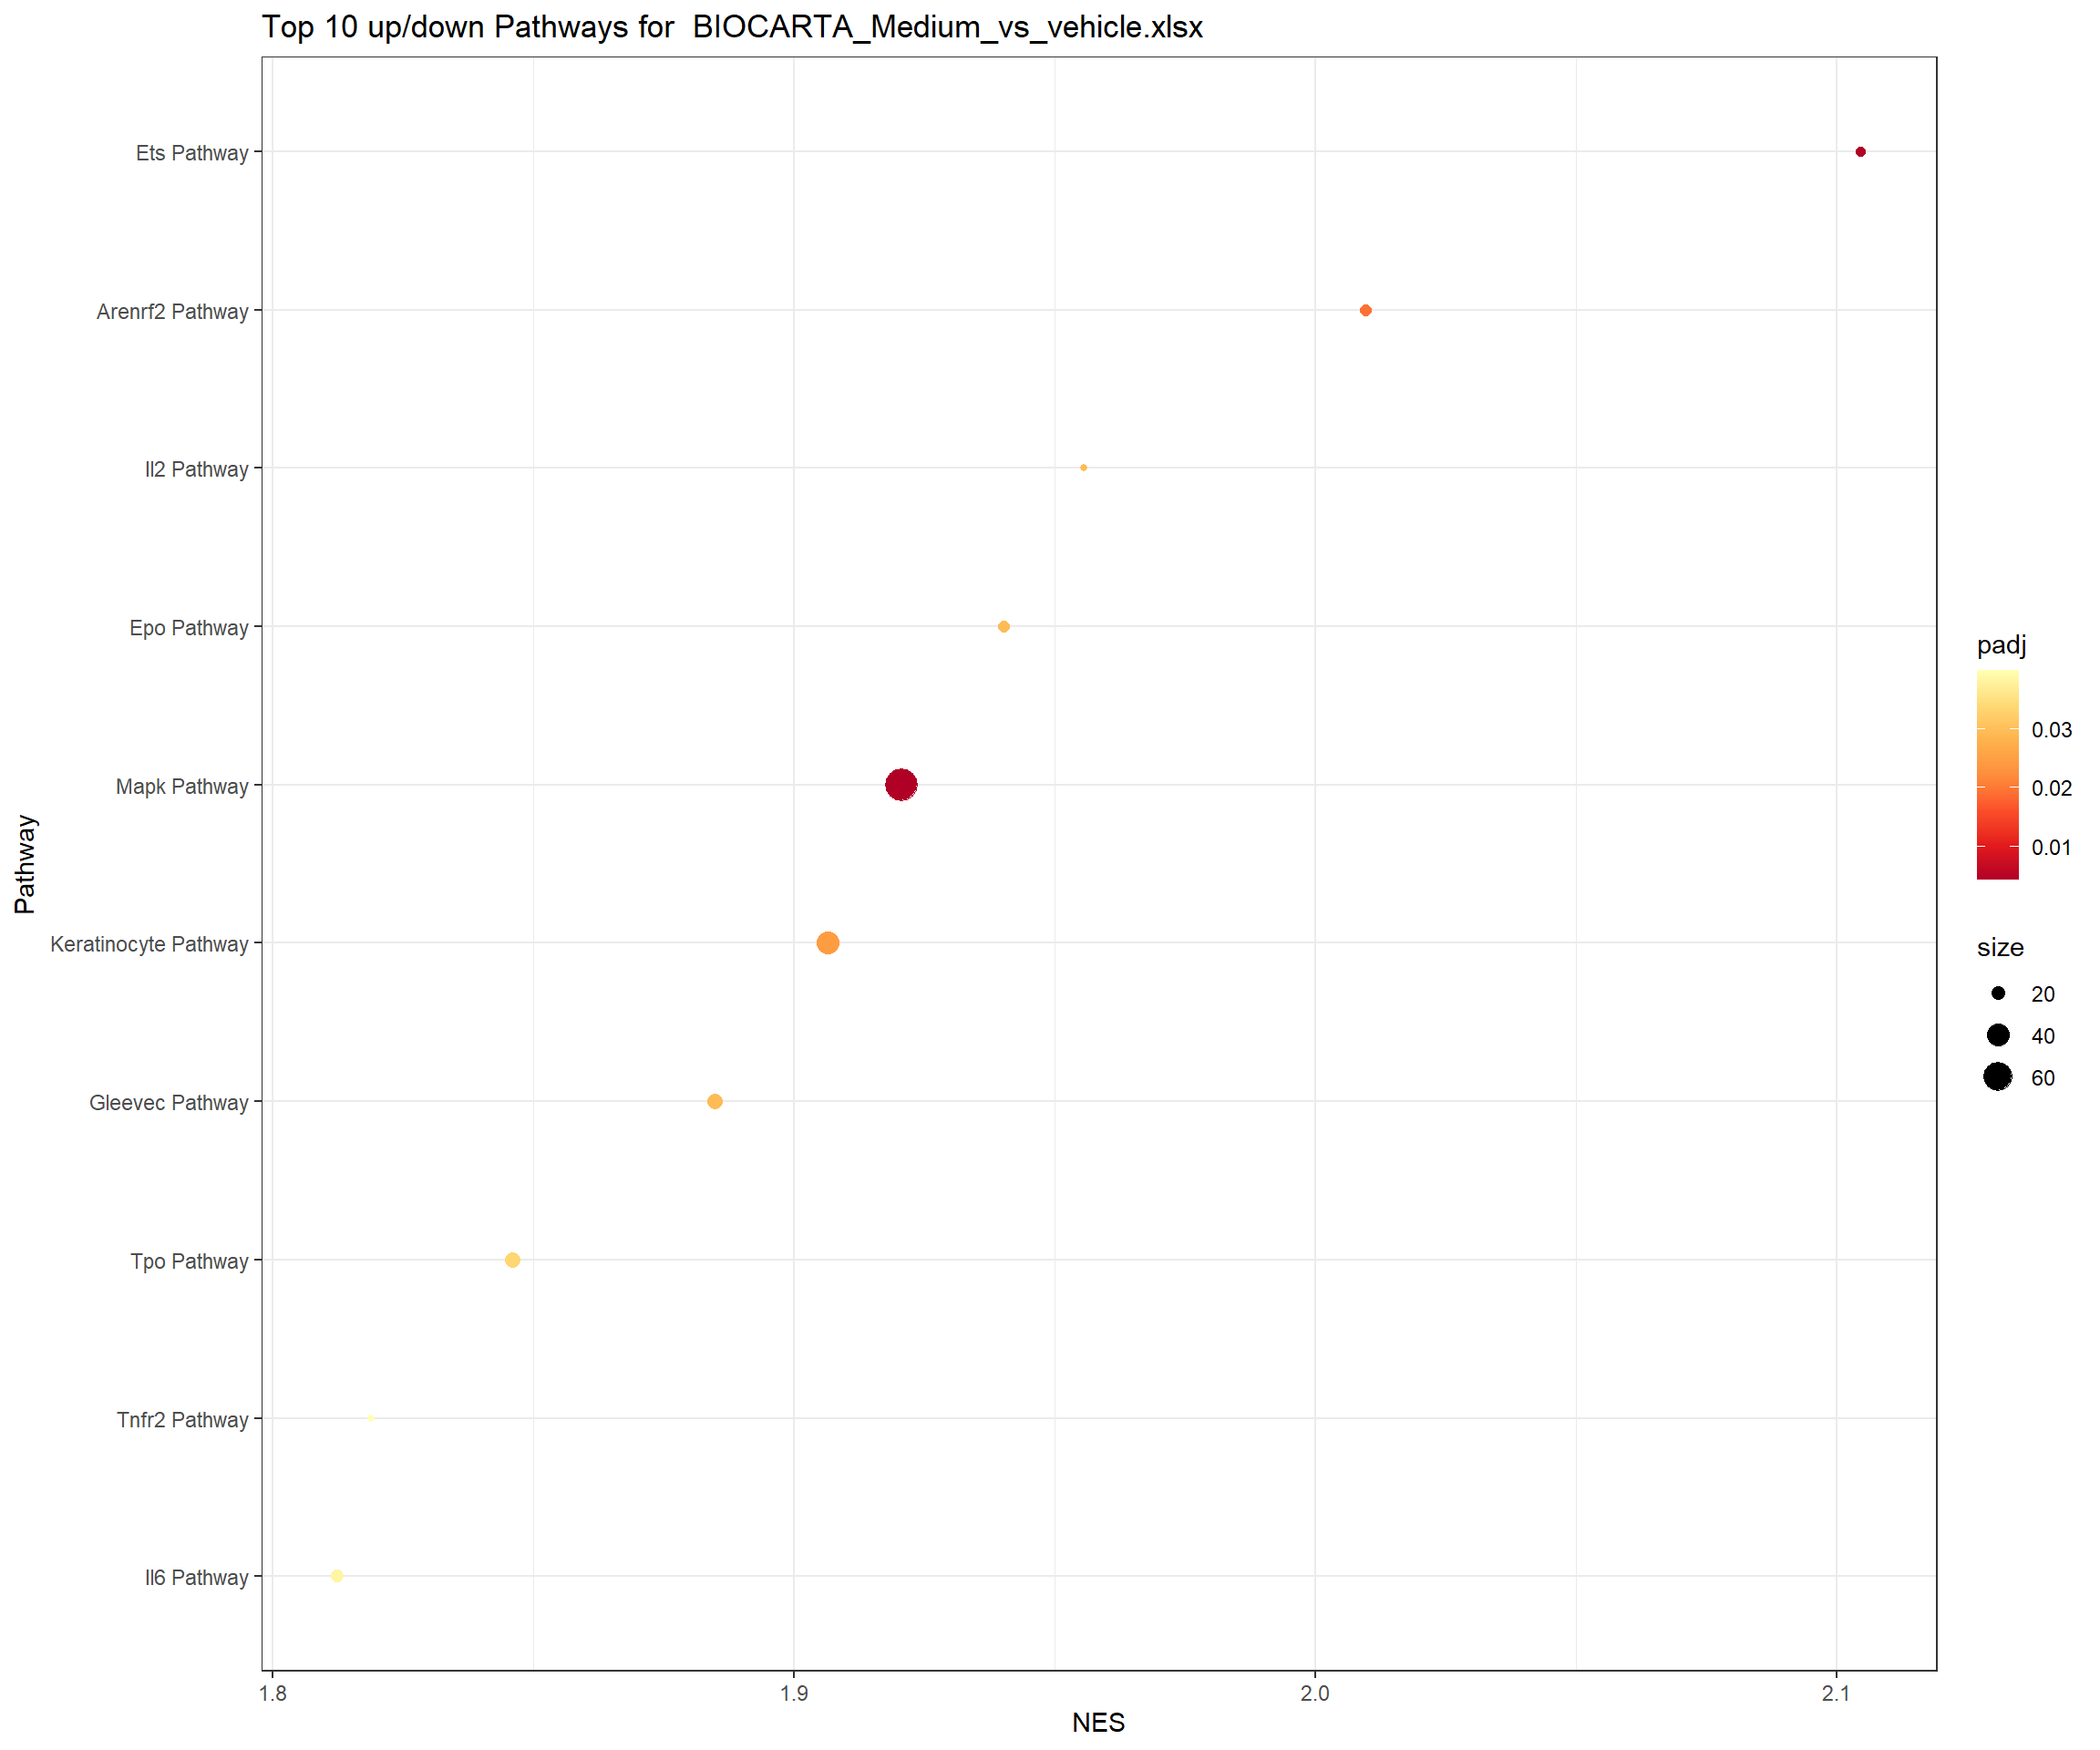

In [ ]:
BIOCARTA_plot_list[[7]]


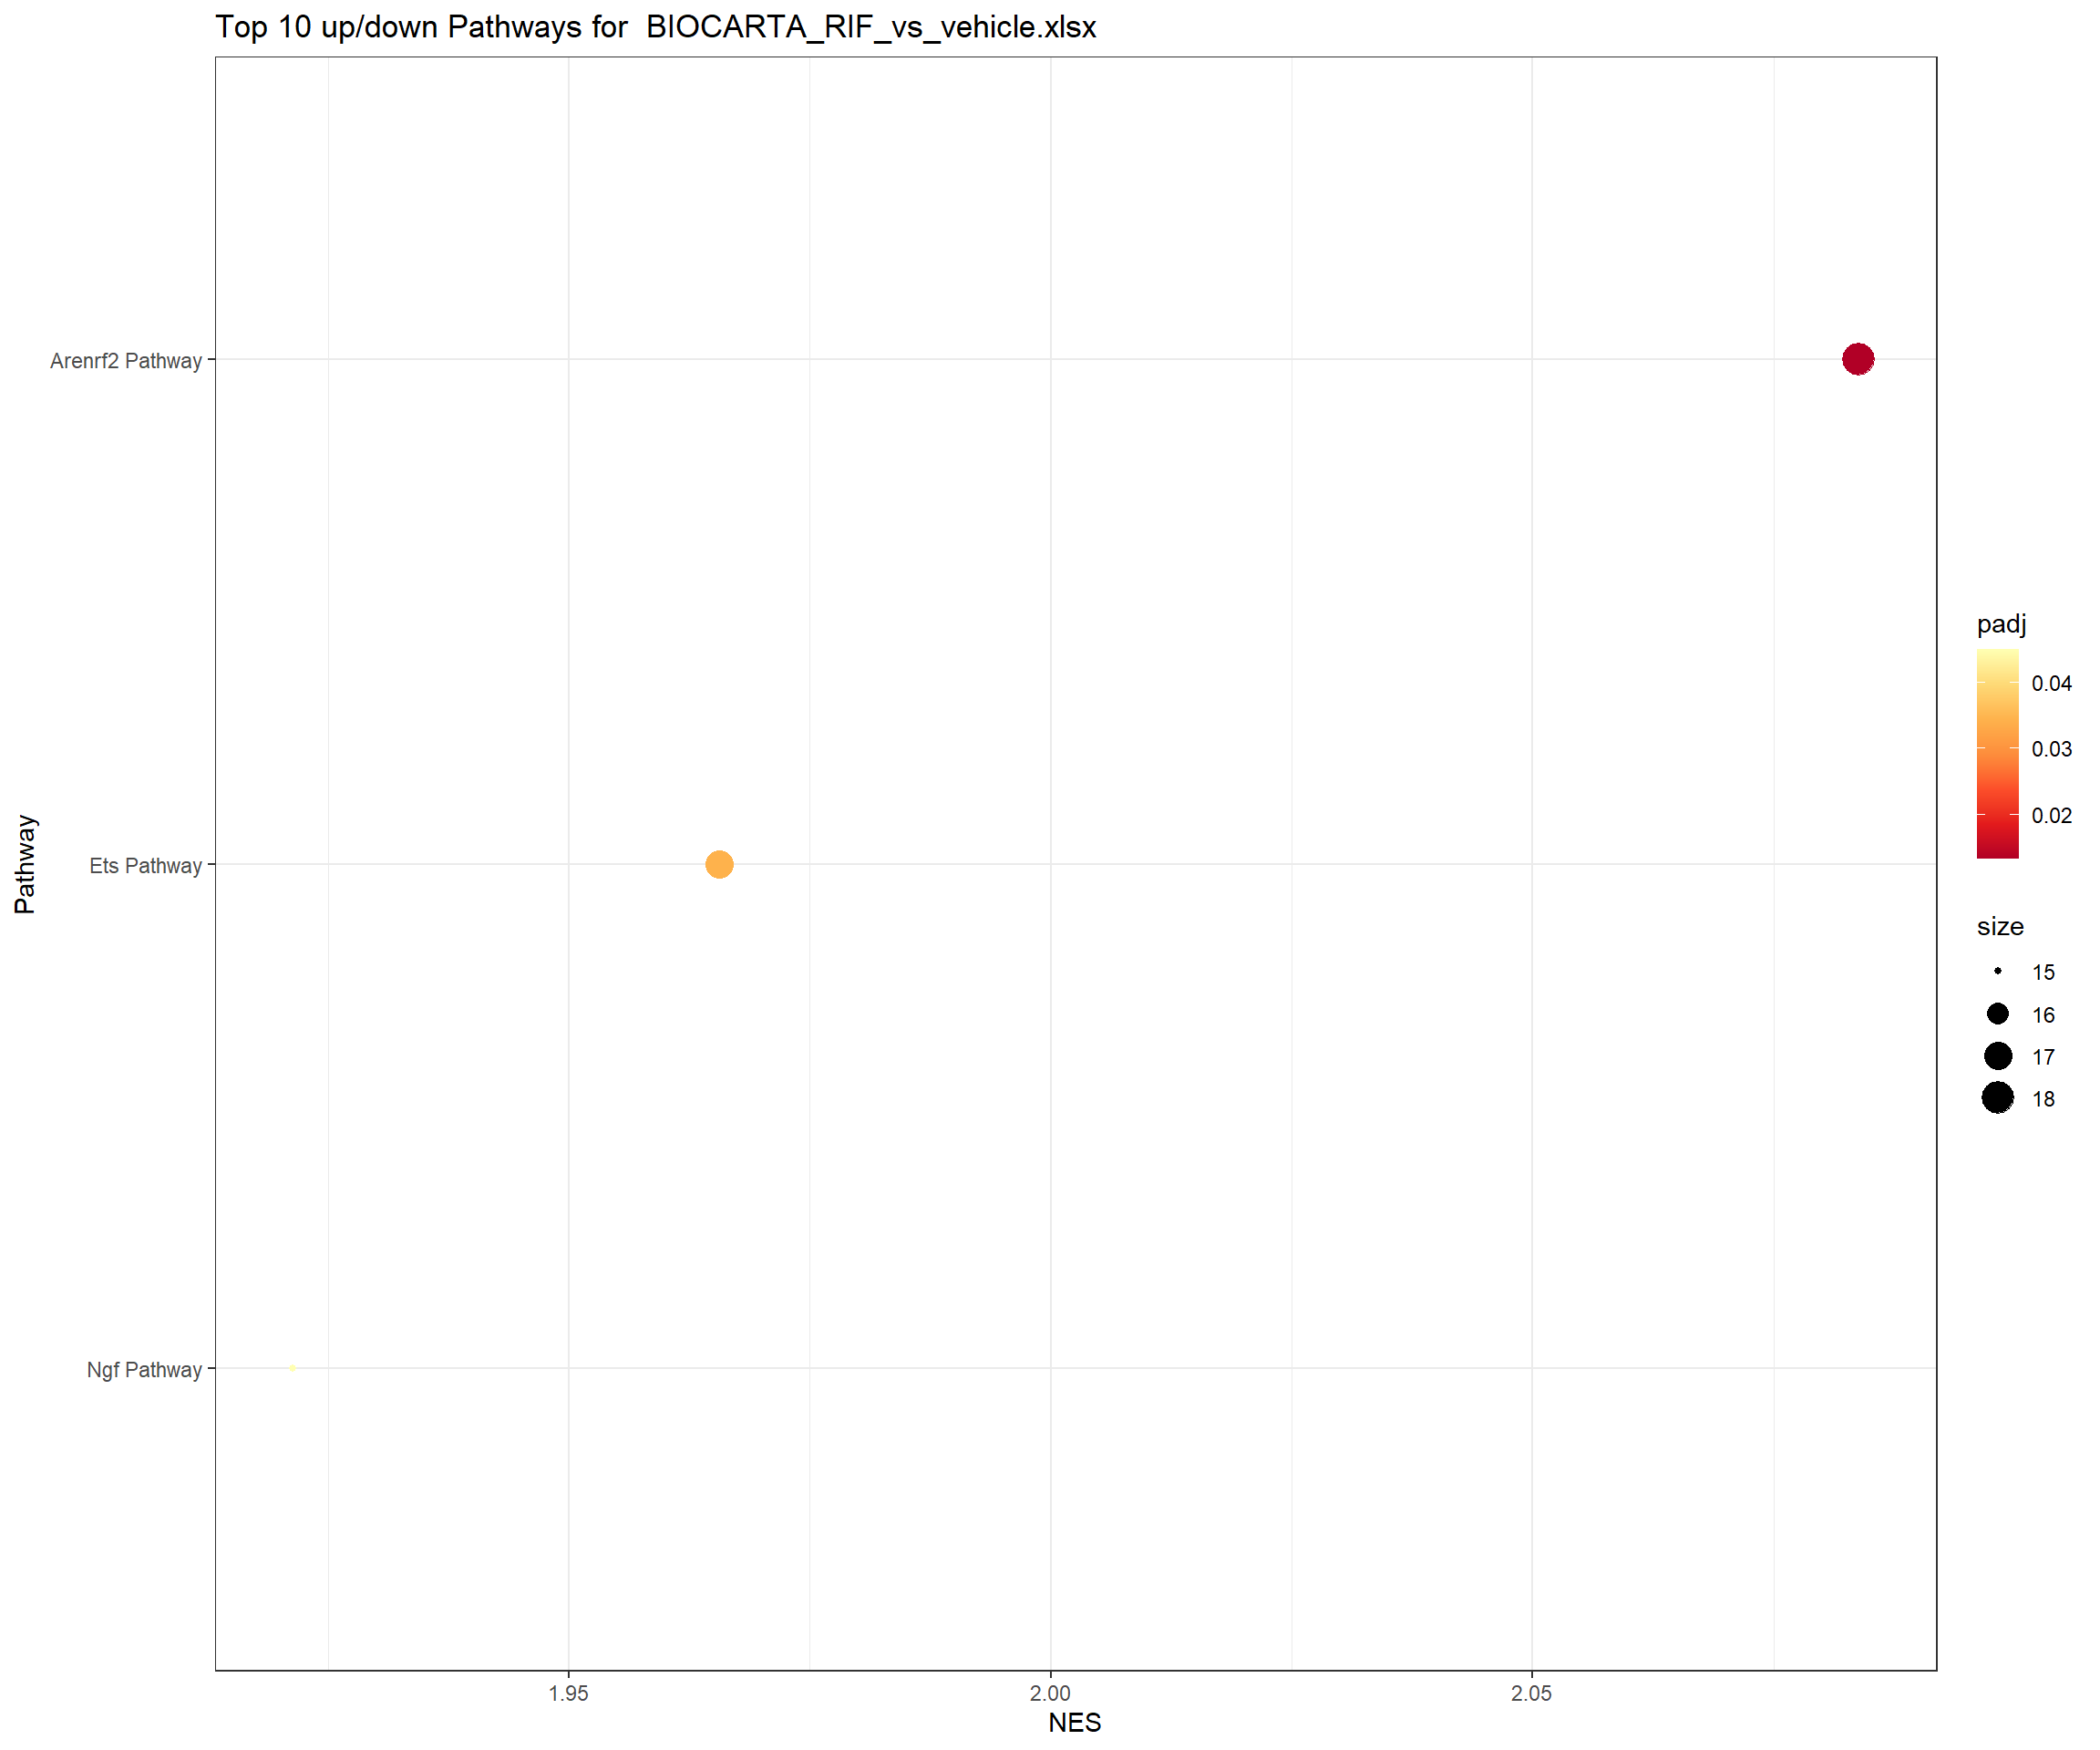

In [ ]:
BIOCARTA_plot_list[[8]]


### REACTOME

Get all file paths related to Reactome

In [ ]:
# Get file paths
reactome_file_paths <- dir(here("notebooks/seq/data_raw/GSEA"), pattern = "REACTOME", full.names = TRUE)

# Subset to interleukines if wanted
# kegg_file_paths[grep(pattern = "IL", kegg_file_paths)]


In [ ]:
REACTOME_plot_list <- map(reactome_file_paths, function(file_path) {
  # Read the file
  plot_data <- read_excel(file_path)
  
  # Process the data
  processed_data <- plot_data %>%
    arrange(desc(abs(NES))) %>%
    group_by(sign_NES = sign(NES)) %>%
    slice_head(n = 10) %>%
    ungroup() %>%
    filter(padj <= 0.05) %>%
    mutate(pathway = str_remove_all(pathway, "REACTOME_"),
           pathway = str_replace_all(pathway, pattern = "_", replacement = " "),
           pathway = str_to_title(pathway))
  
  # Generate the plot
  ggplot(processed_data,
         aes(x = NES,
             y = fct_reorder(pathway, NES),
             color = padj,
             size = size
             )
         ) +
    geom_point(stat = 'identity') +
    labs(x = "NES",
         y = "Pathway",
         title = paste("Top 10 up/down Pathways for","", basename(file_path))
         ) +
    theme_bw() +
    scale_color_distiller(type = "seq", palette = "YlOrRd") #+
    #theme(legend.position = "none") # Remove legend to focus on the data
})


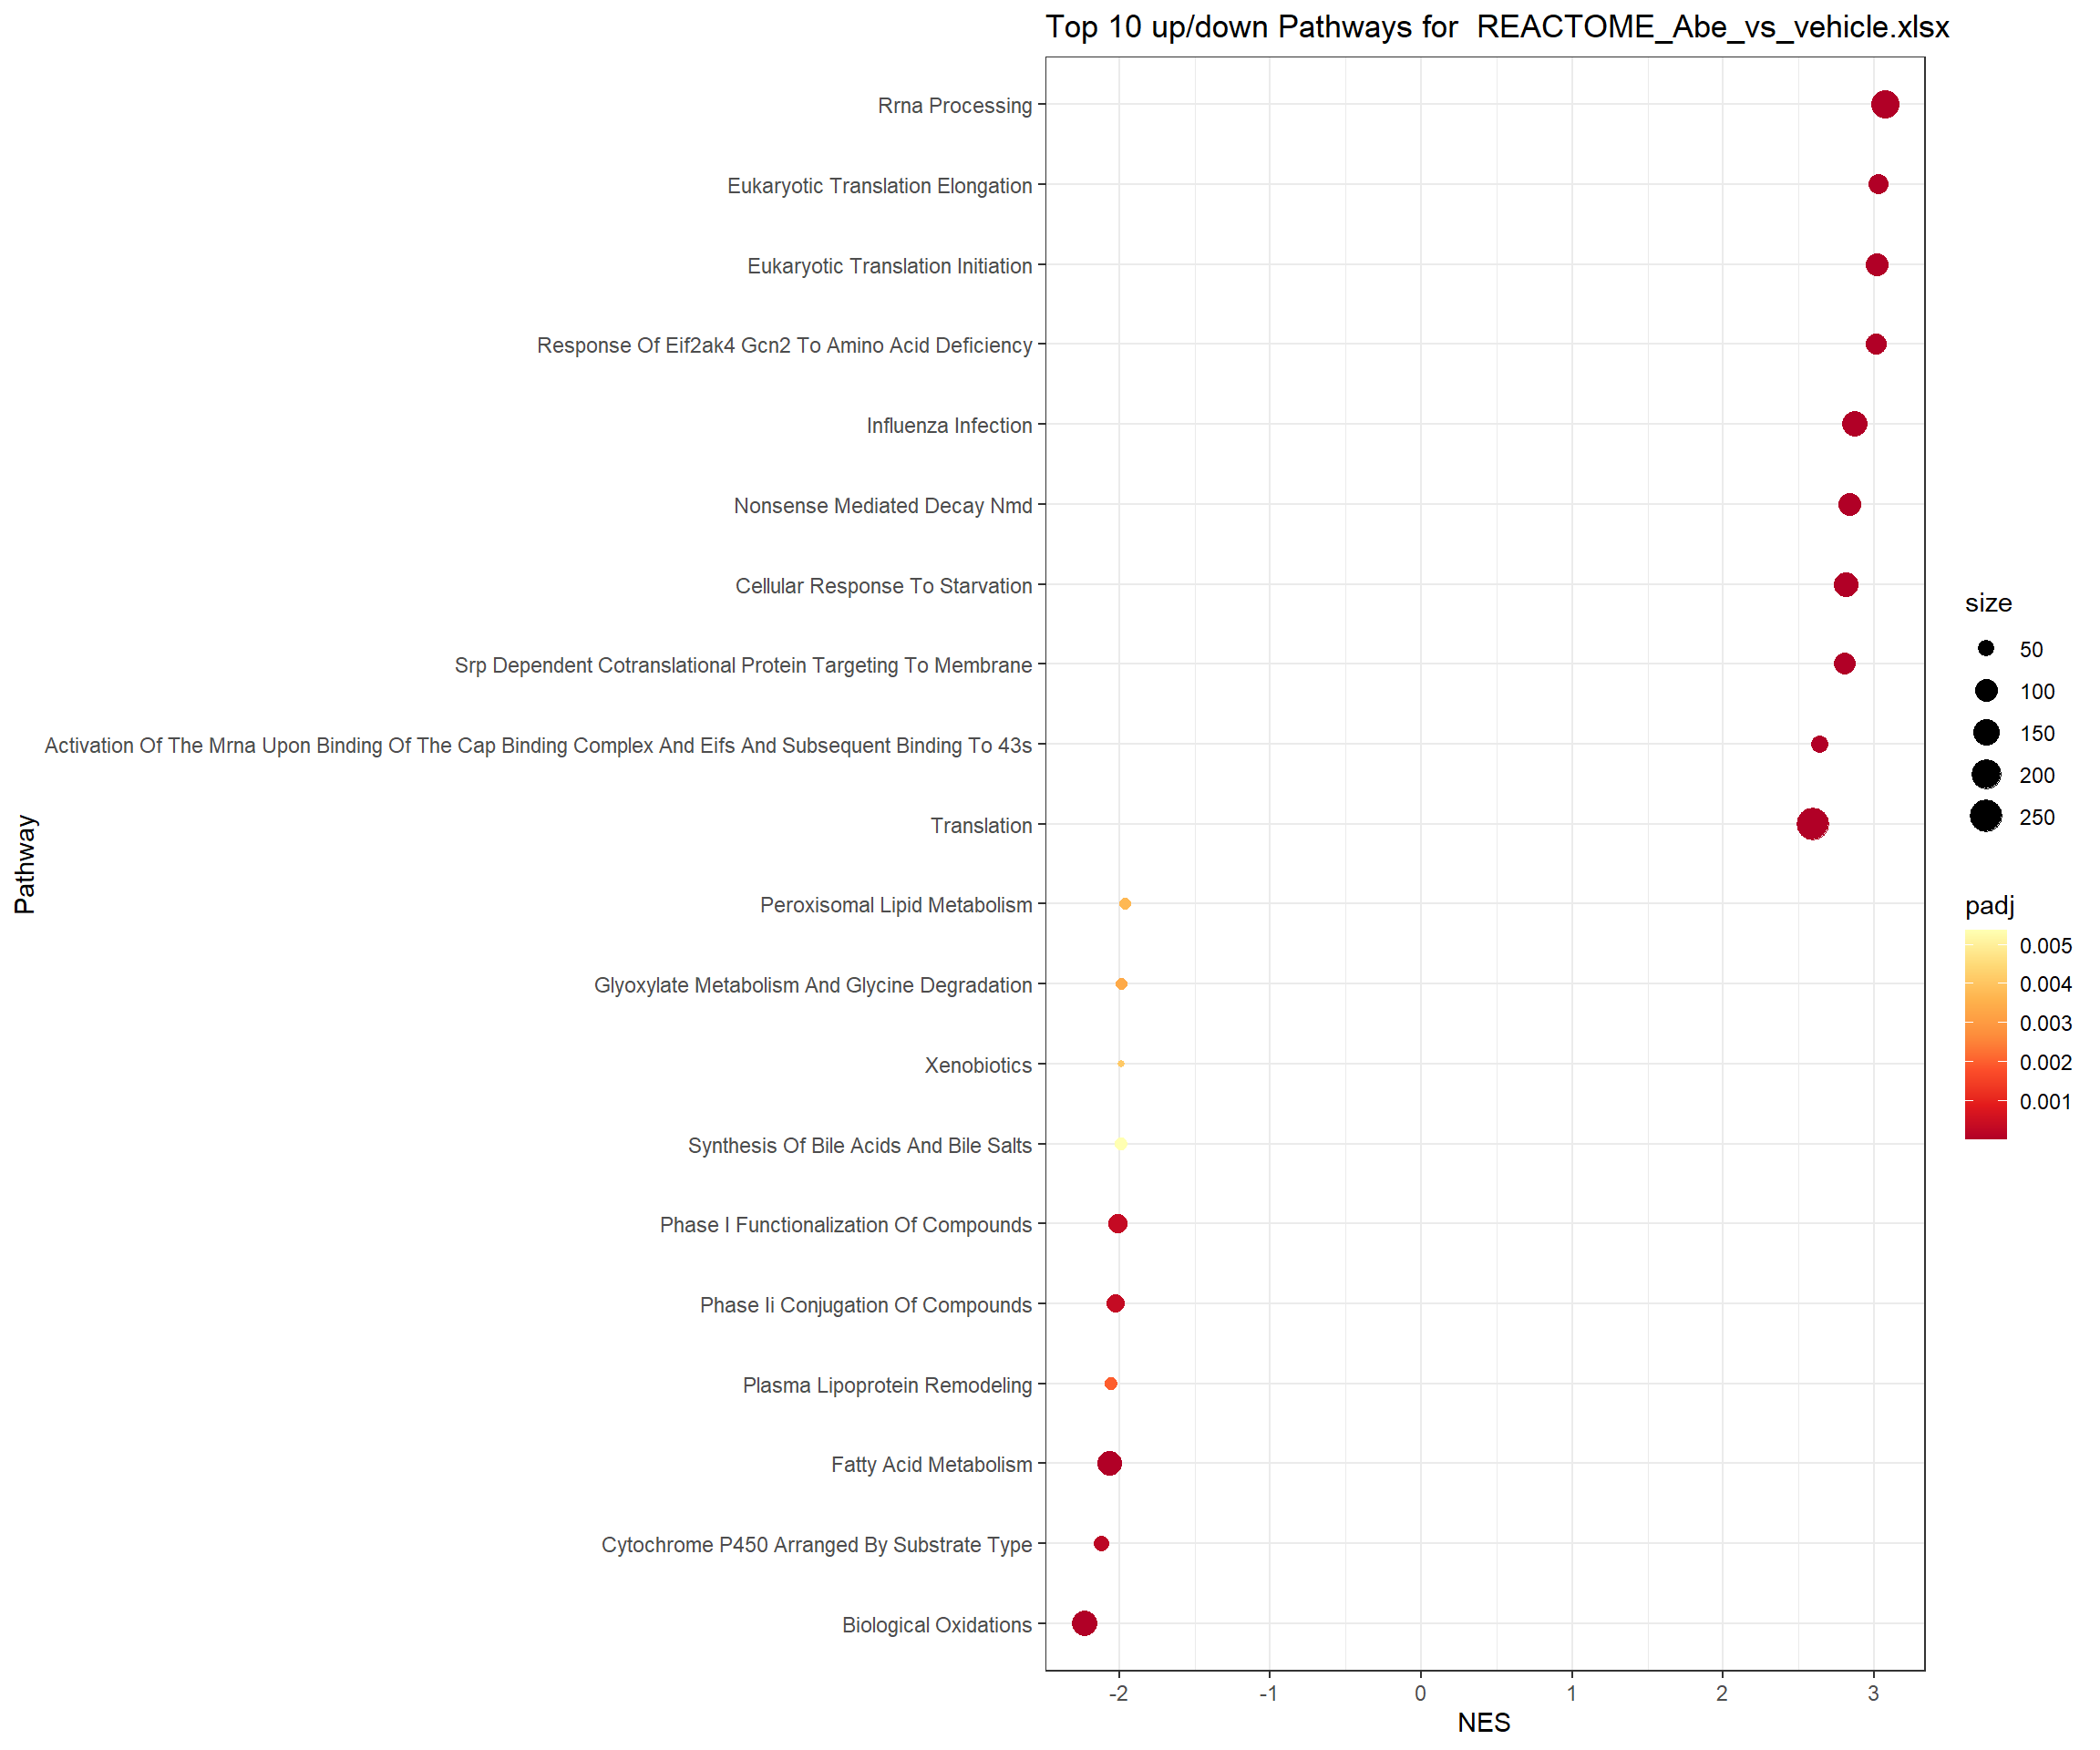

In [ ]:

REACTOME_plot_list[[1]]


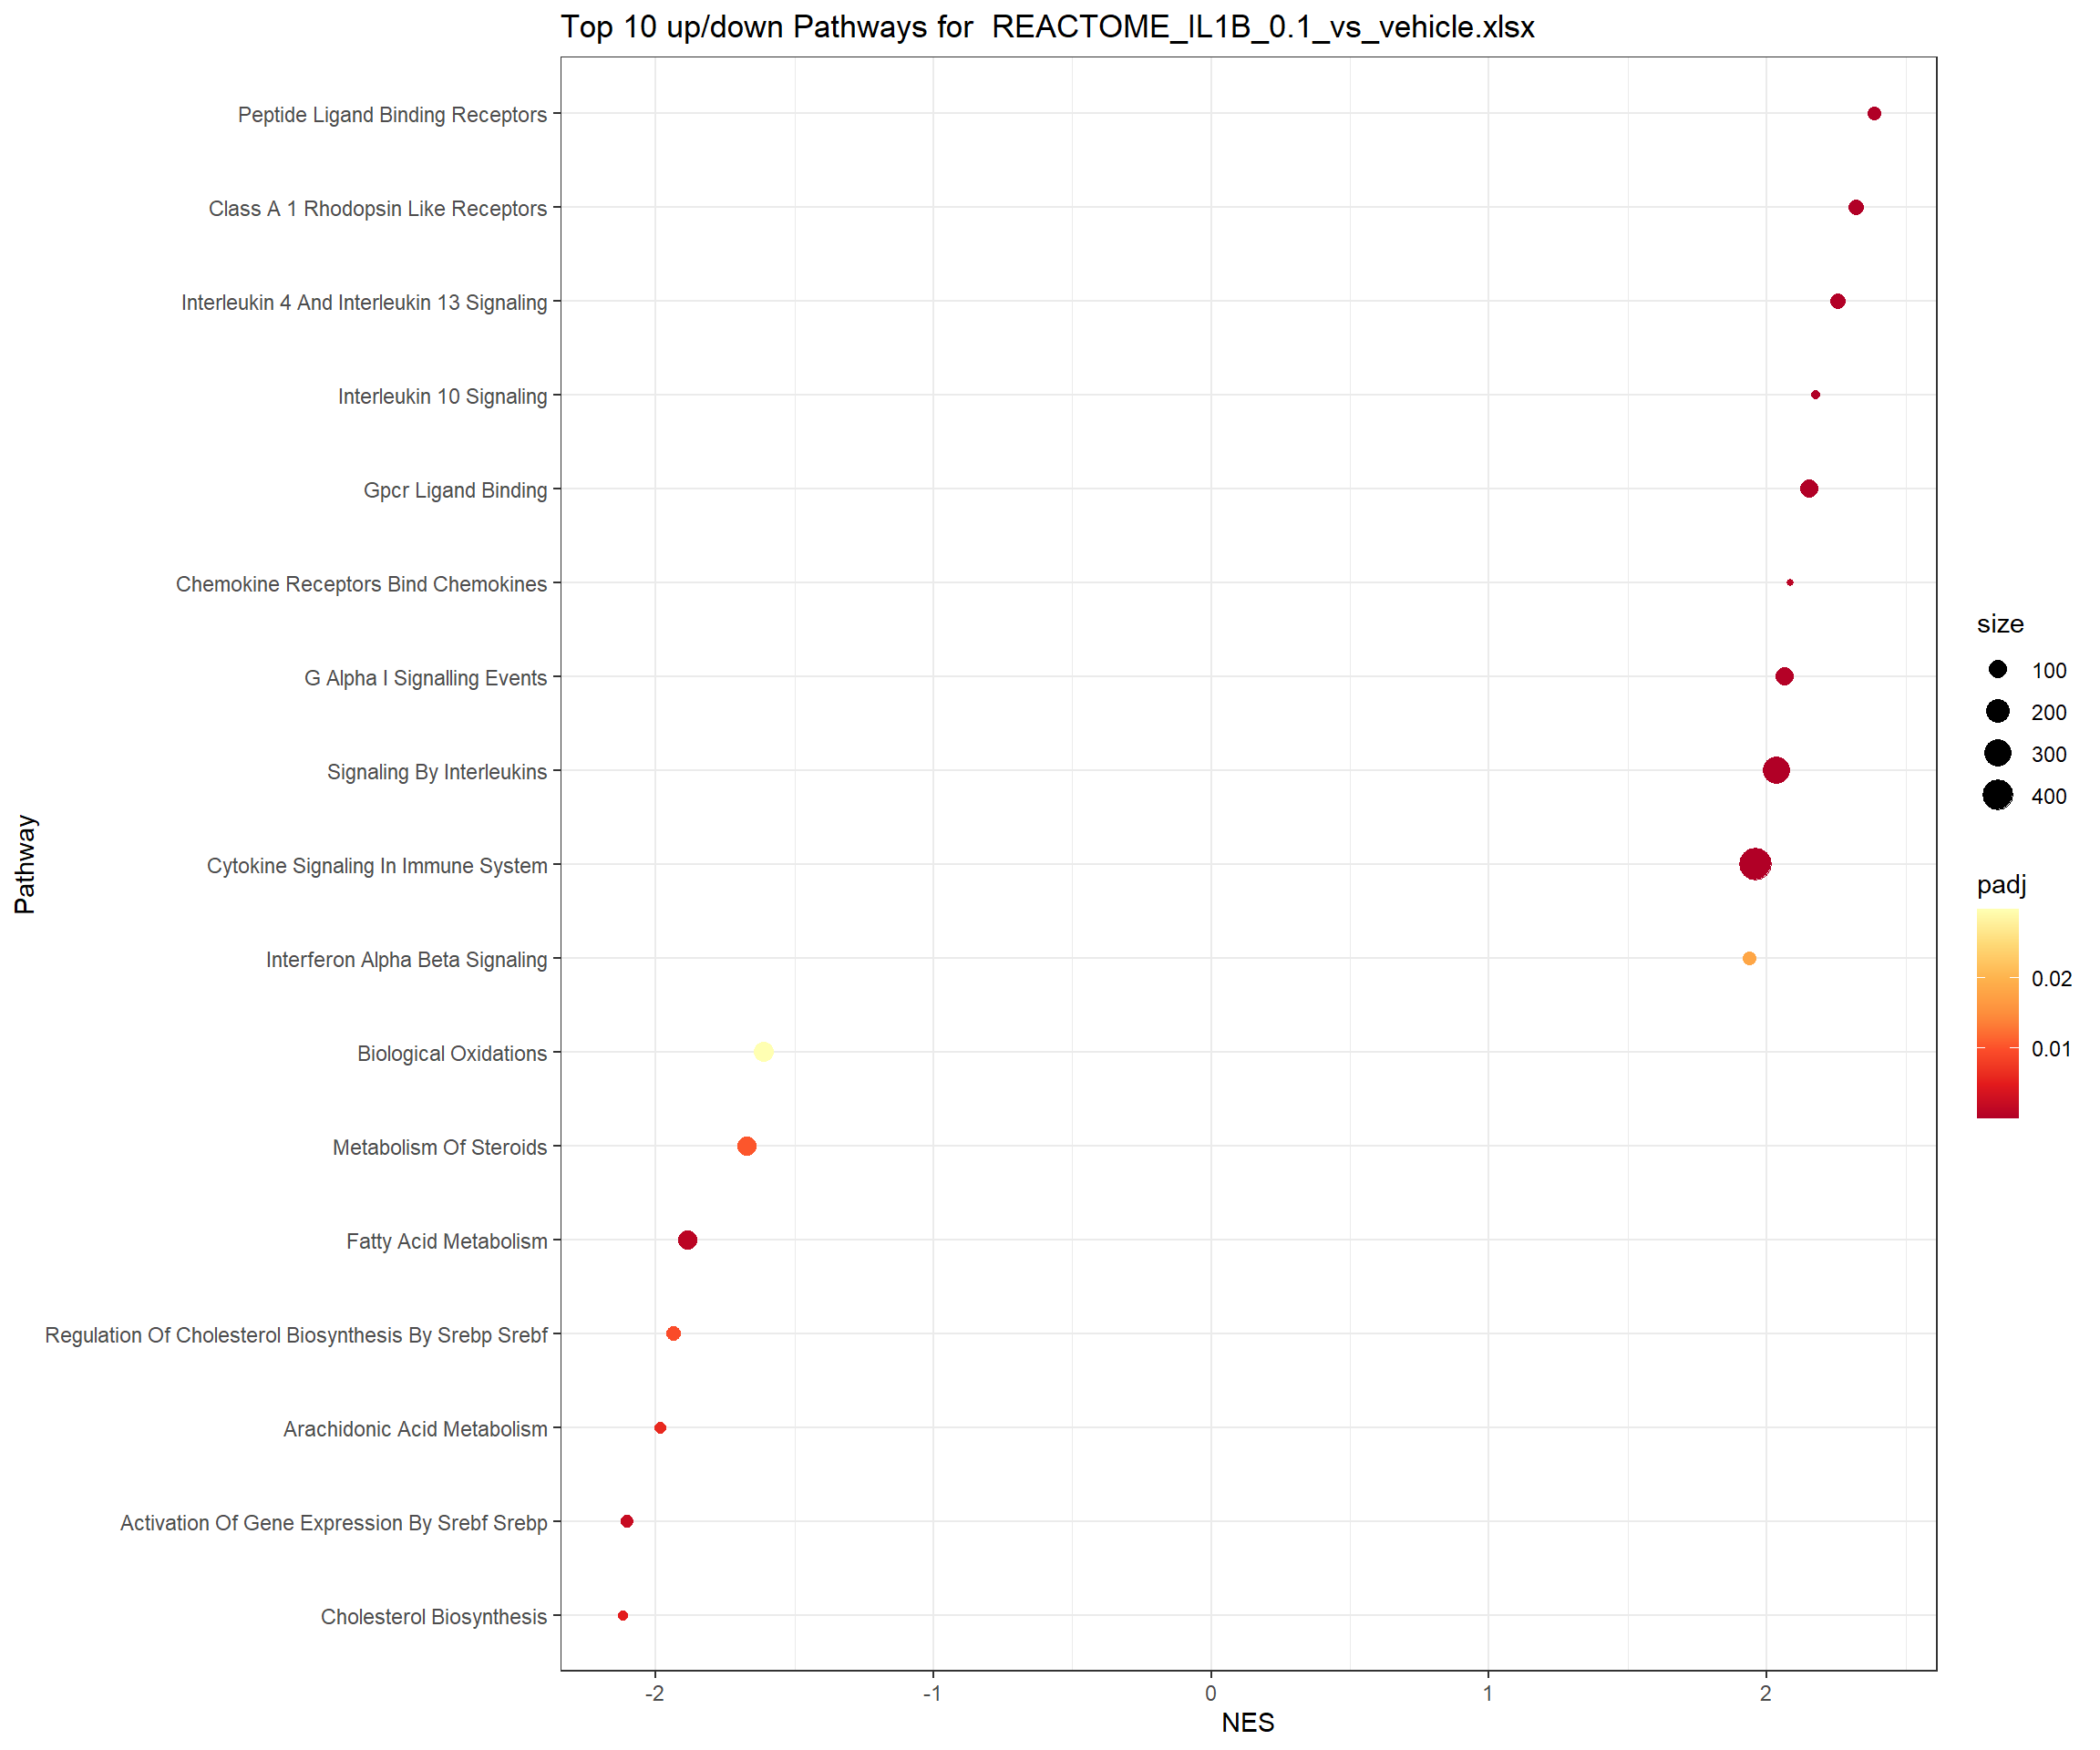

In [ ]:

REACTOME_plot_list[[2]]


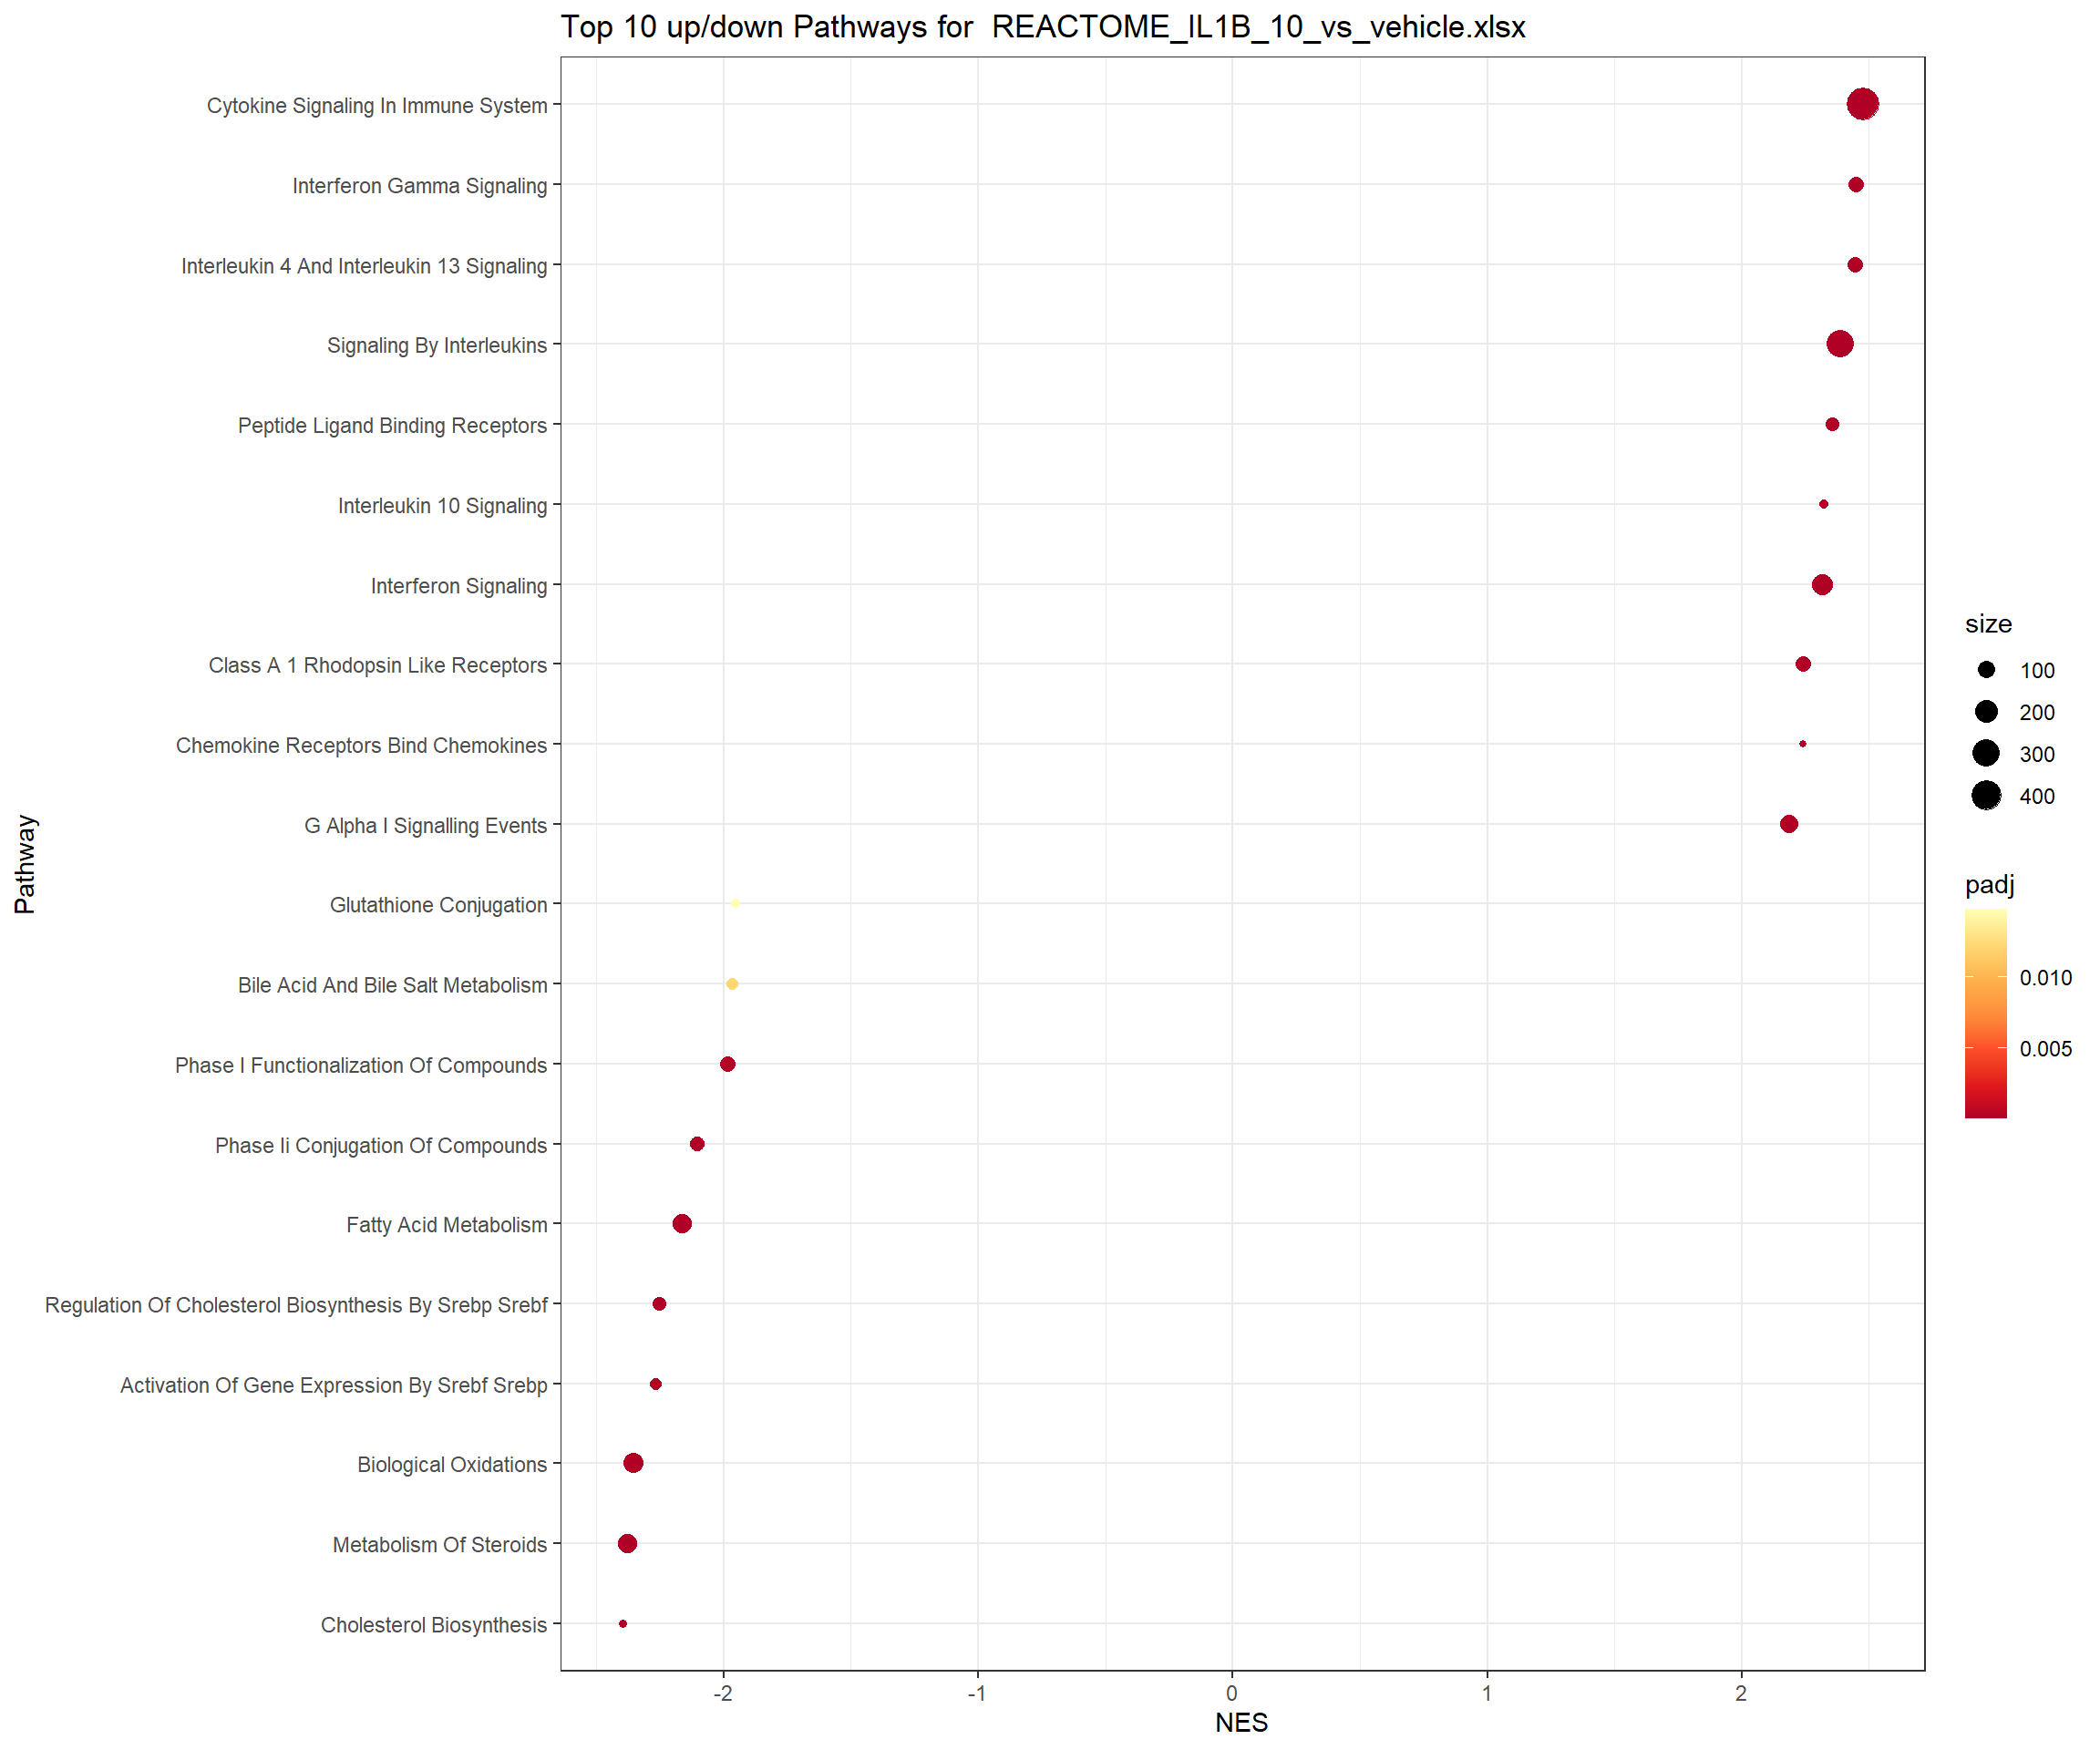

In [ ]:

REACTOME_plot_list[[3]]


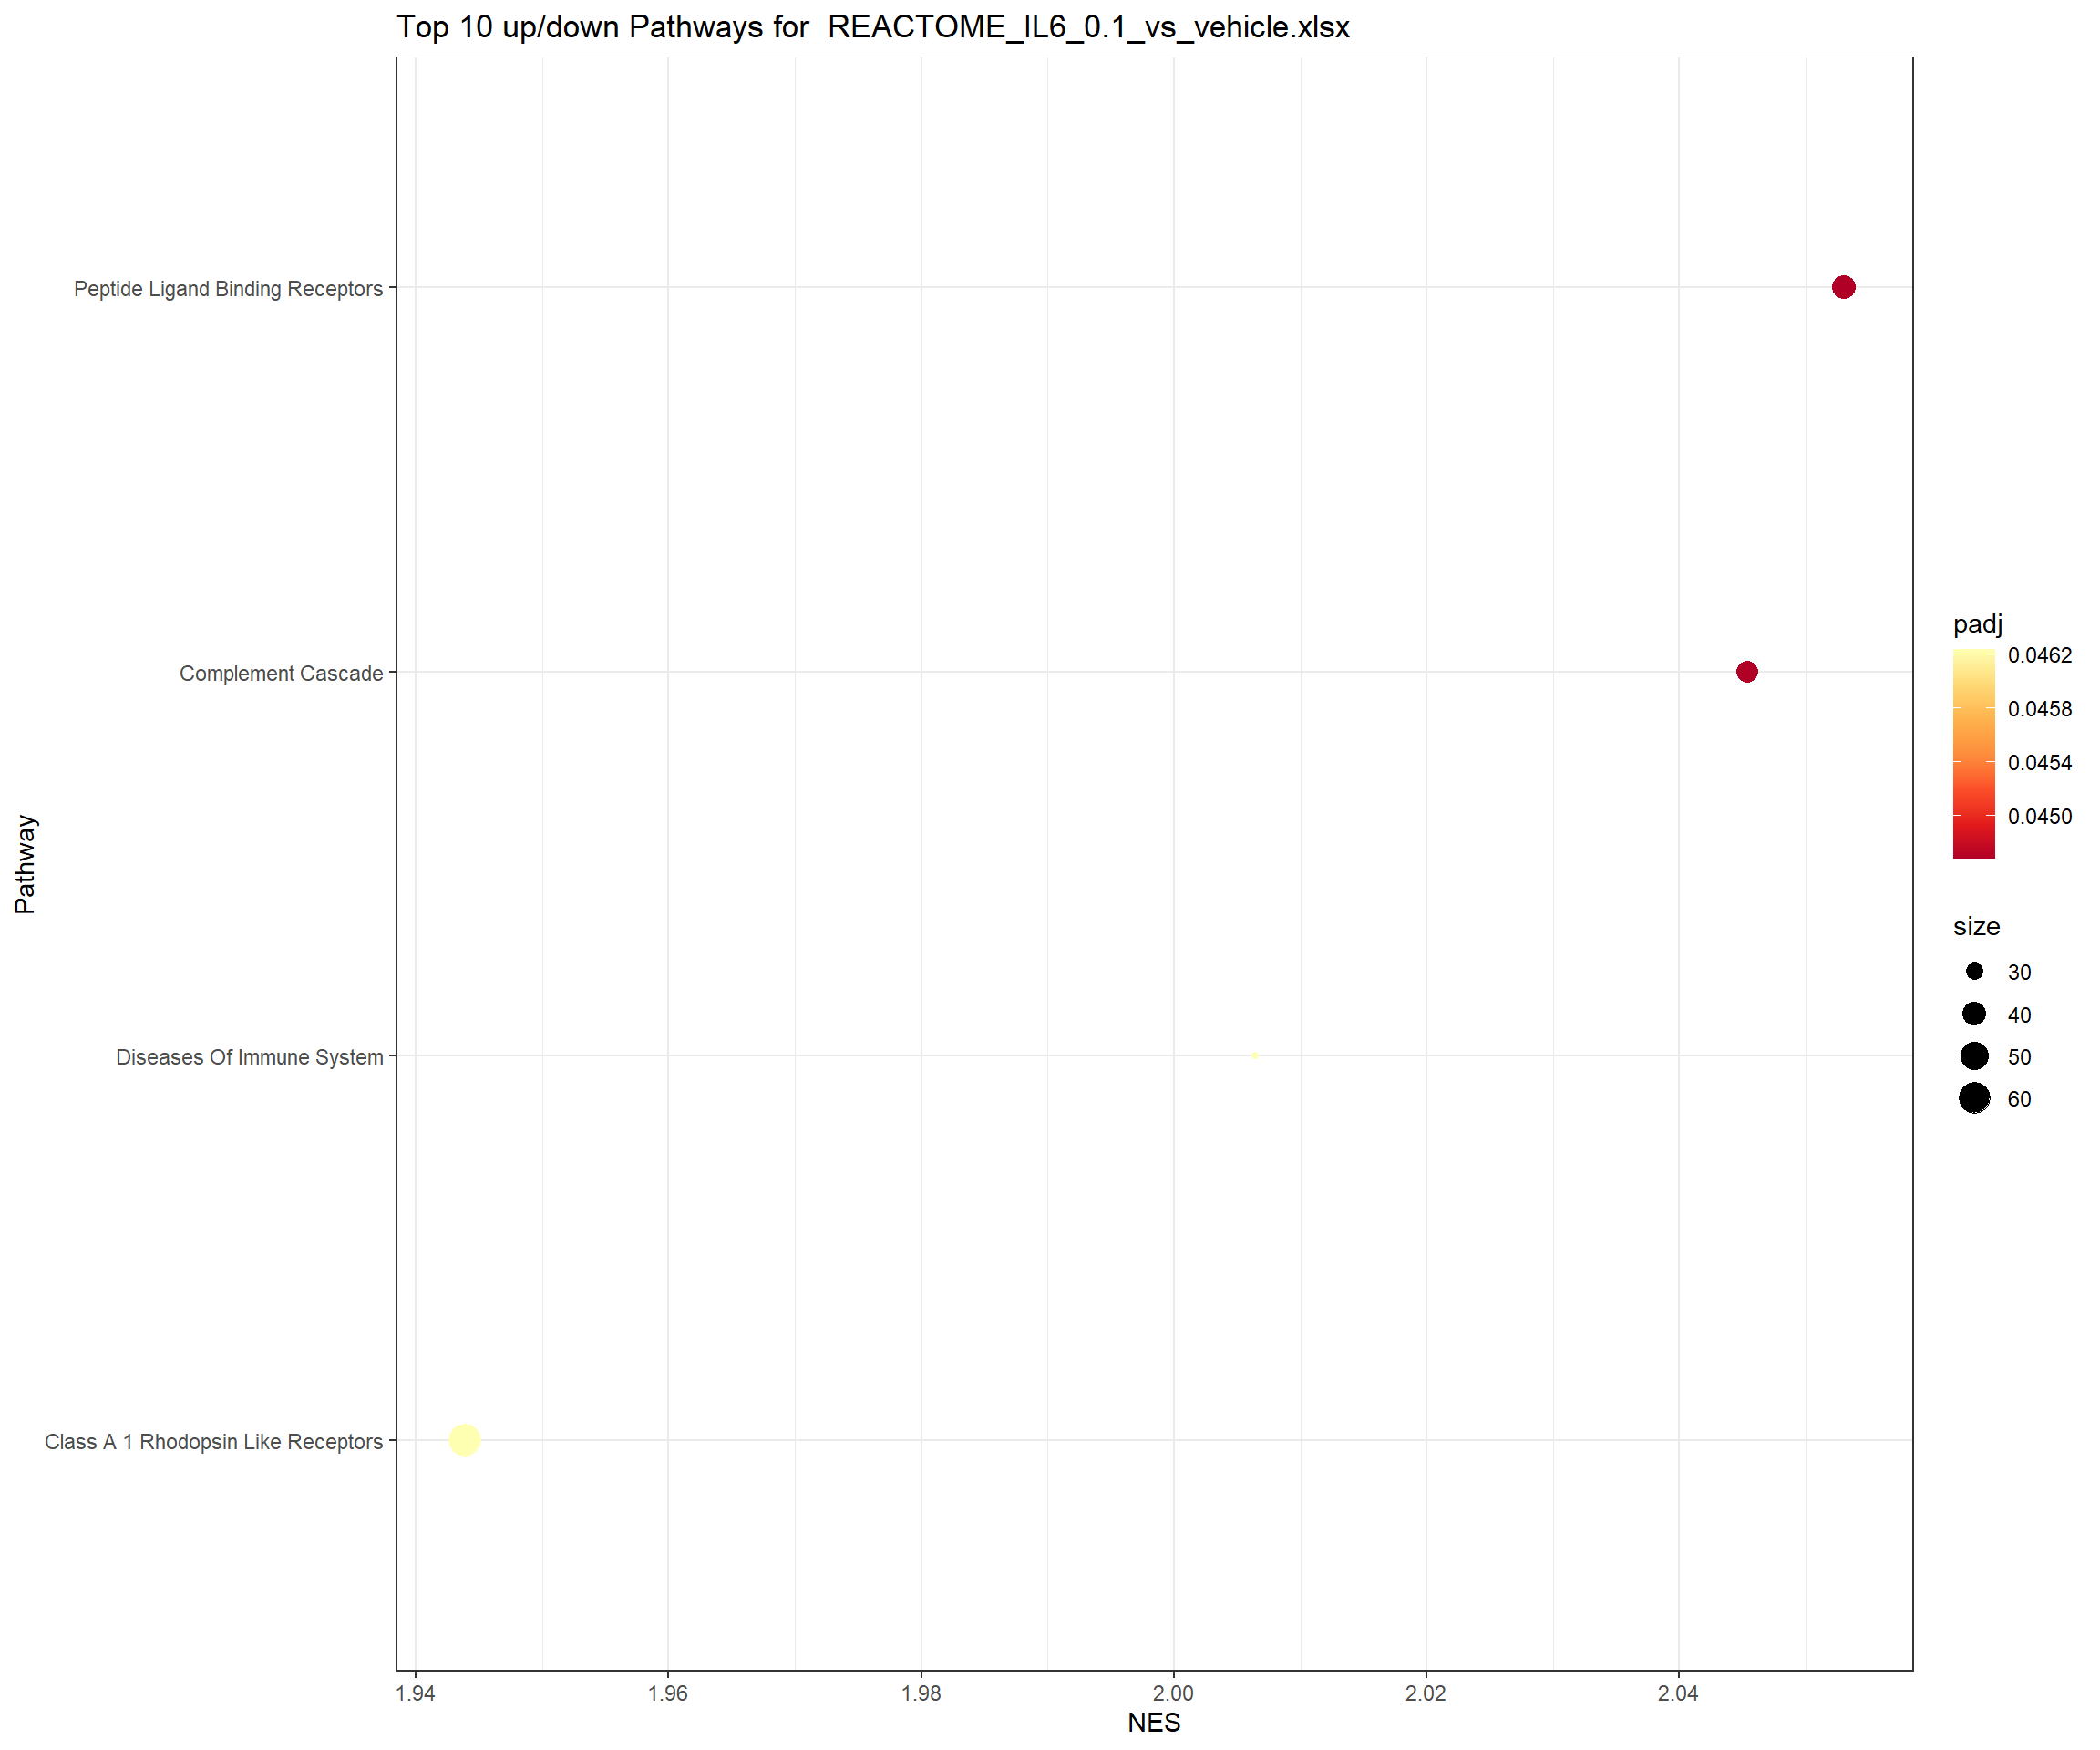

In [ ]:

REACTOME_plot_list[[4]]


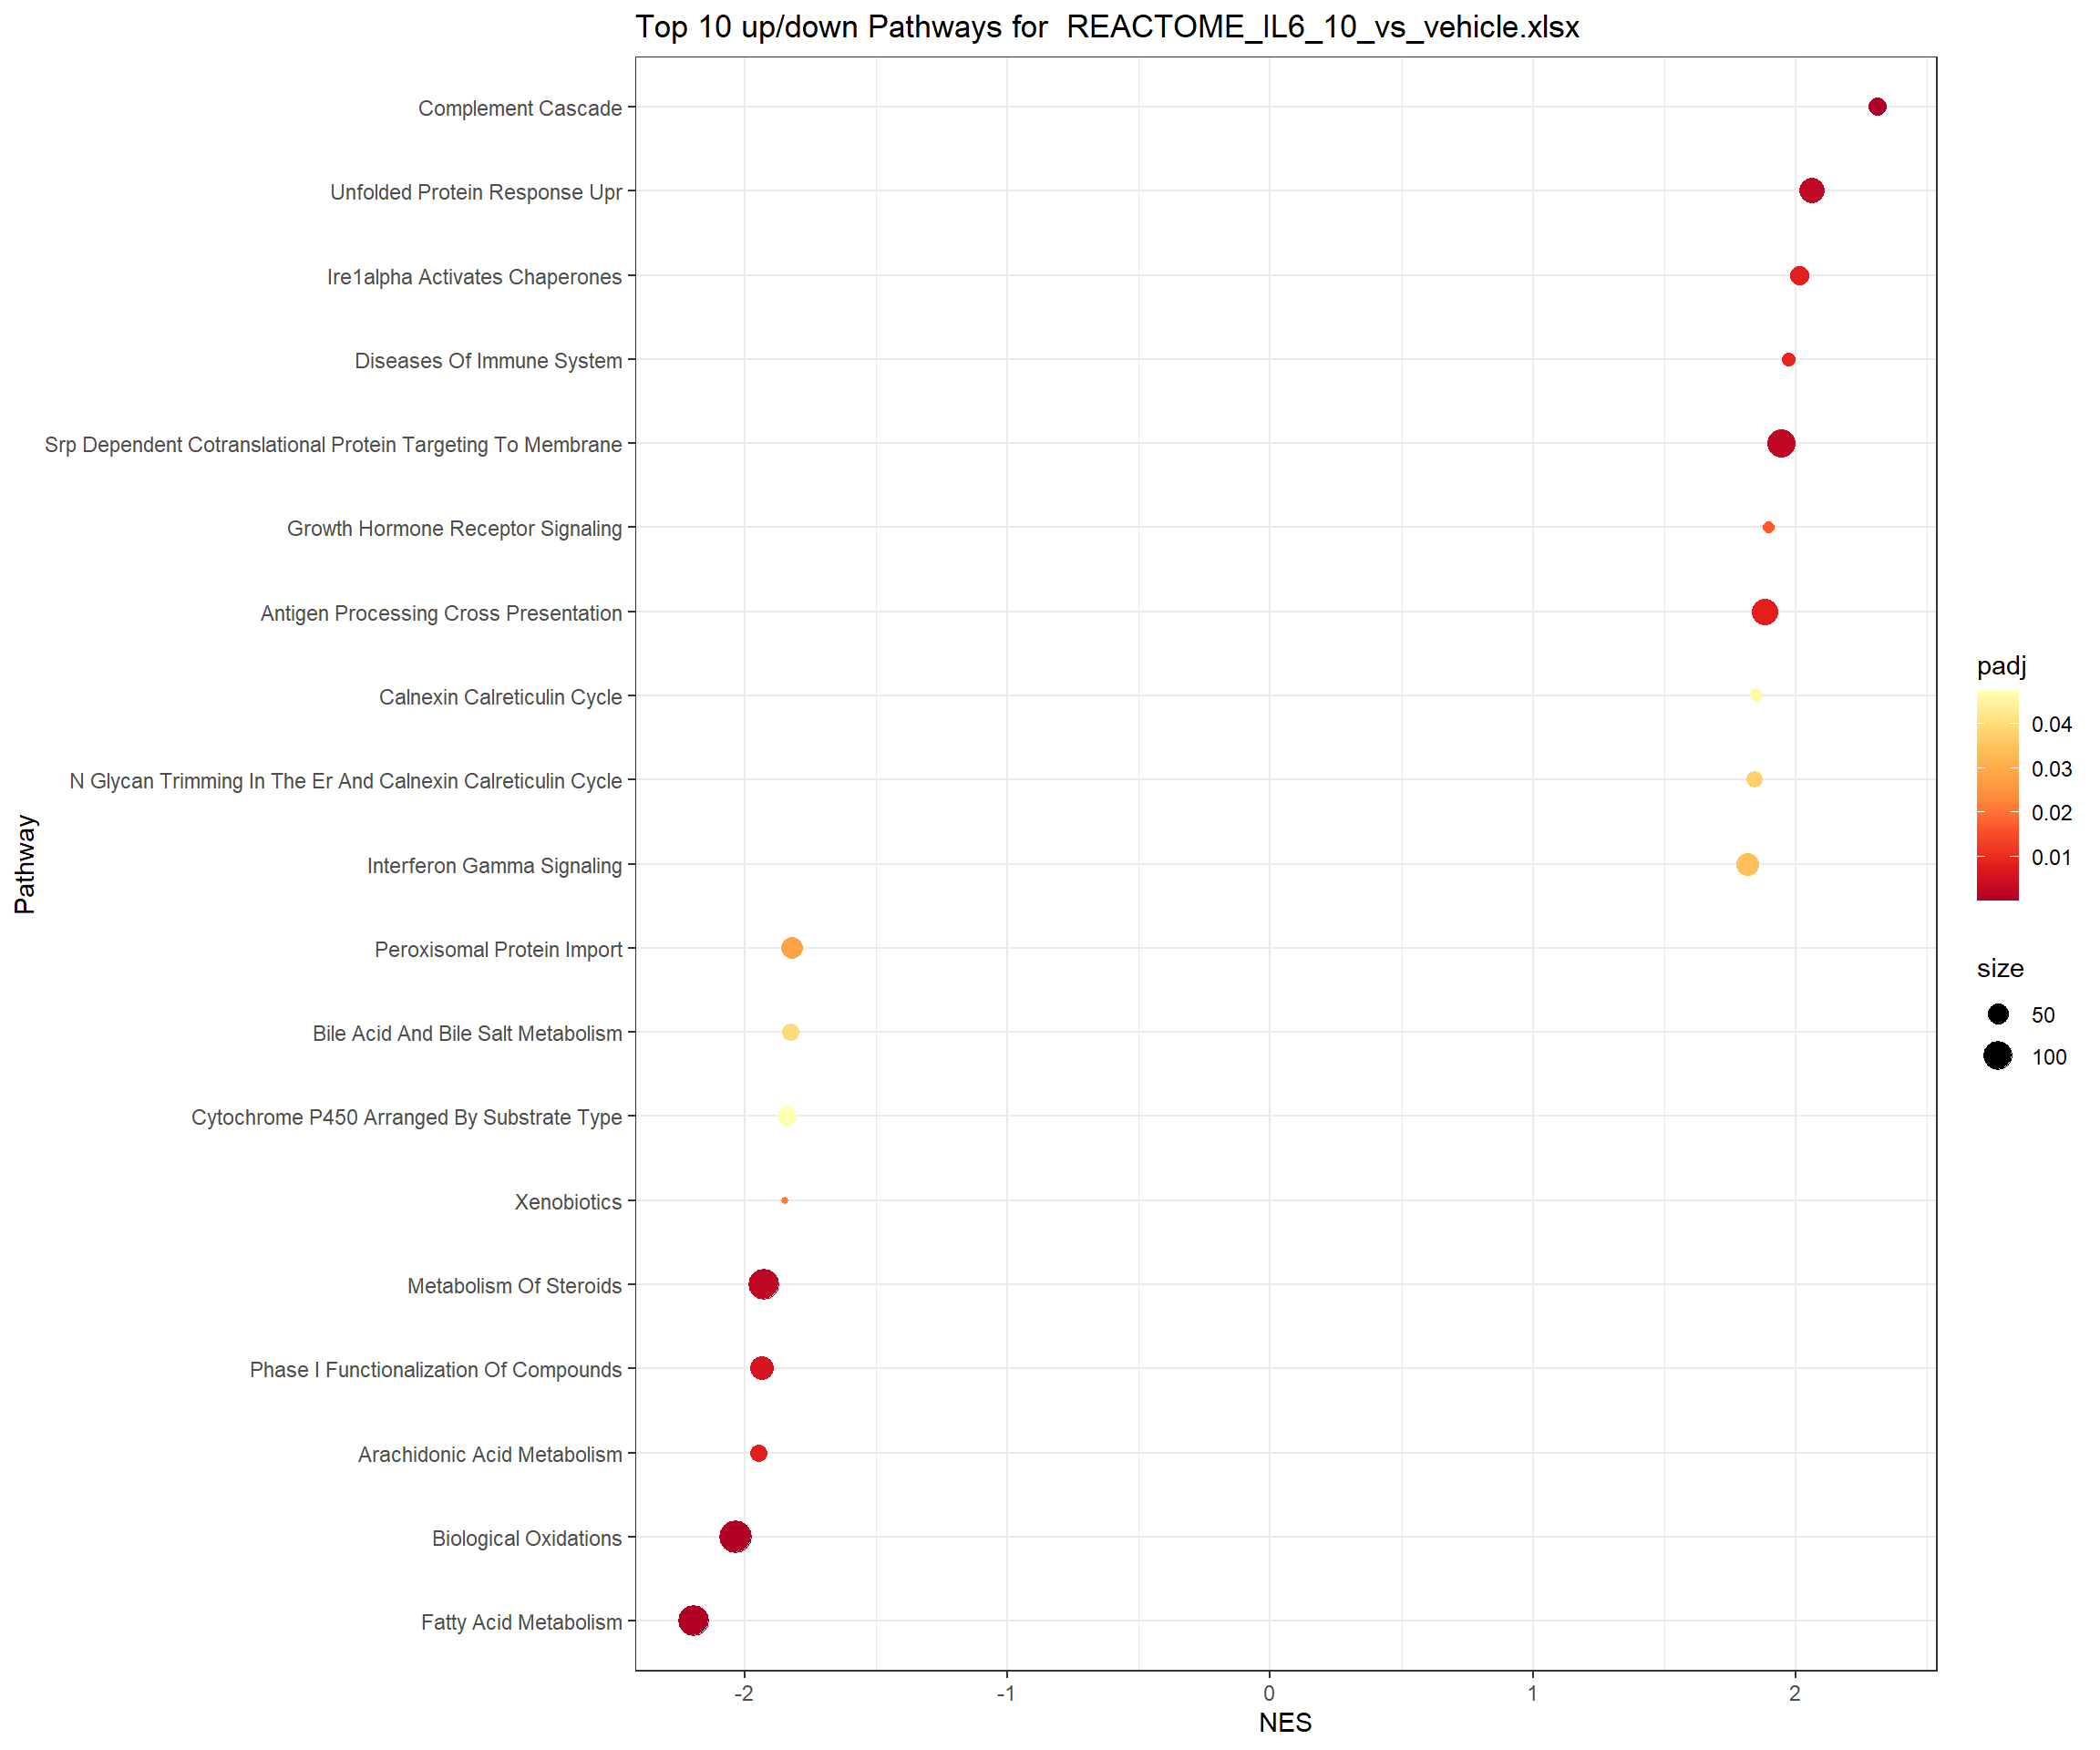

In [ ]:

REACTOME_plot_list[[5]]


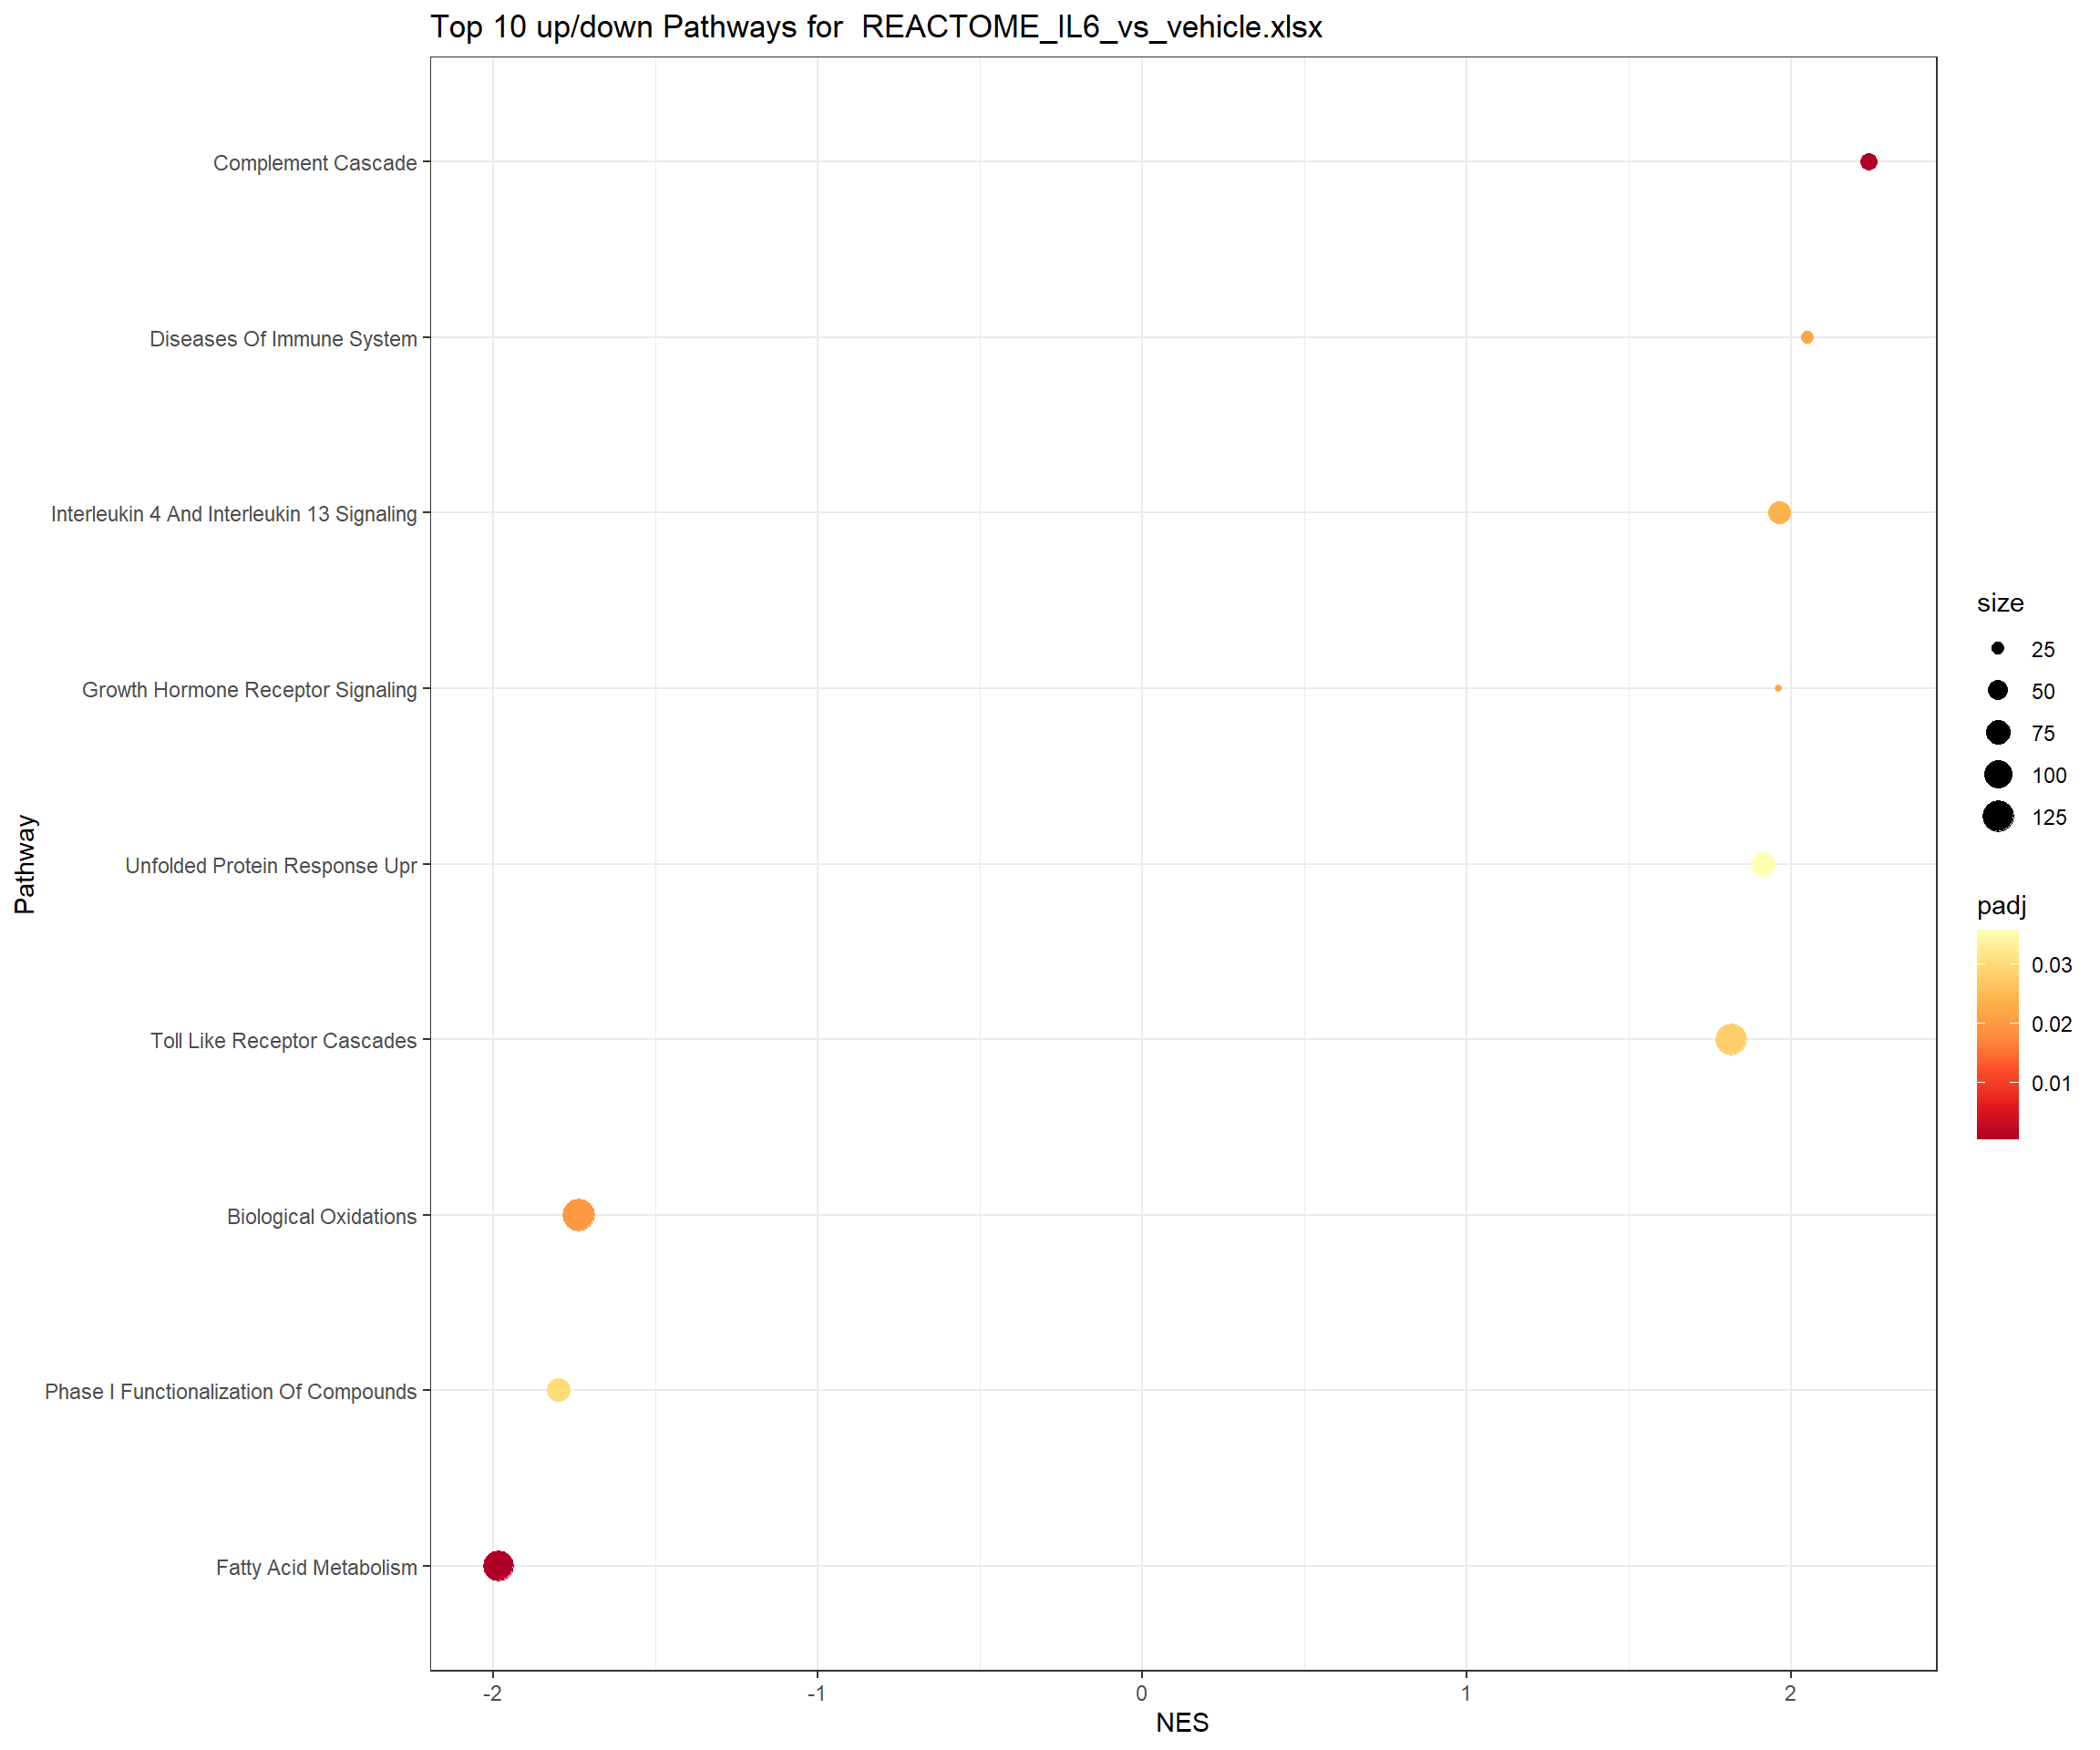

In [ ]:

REACTOME_plot_list[[6]]


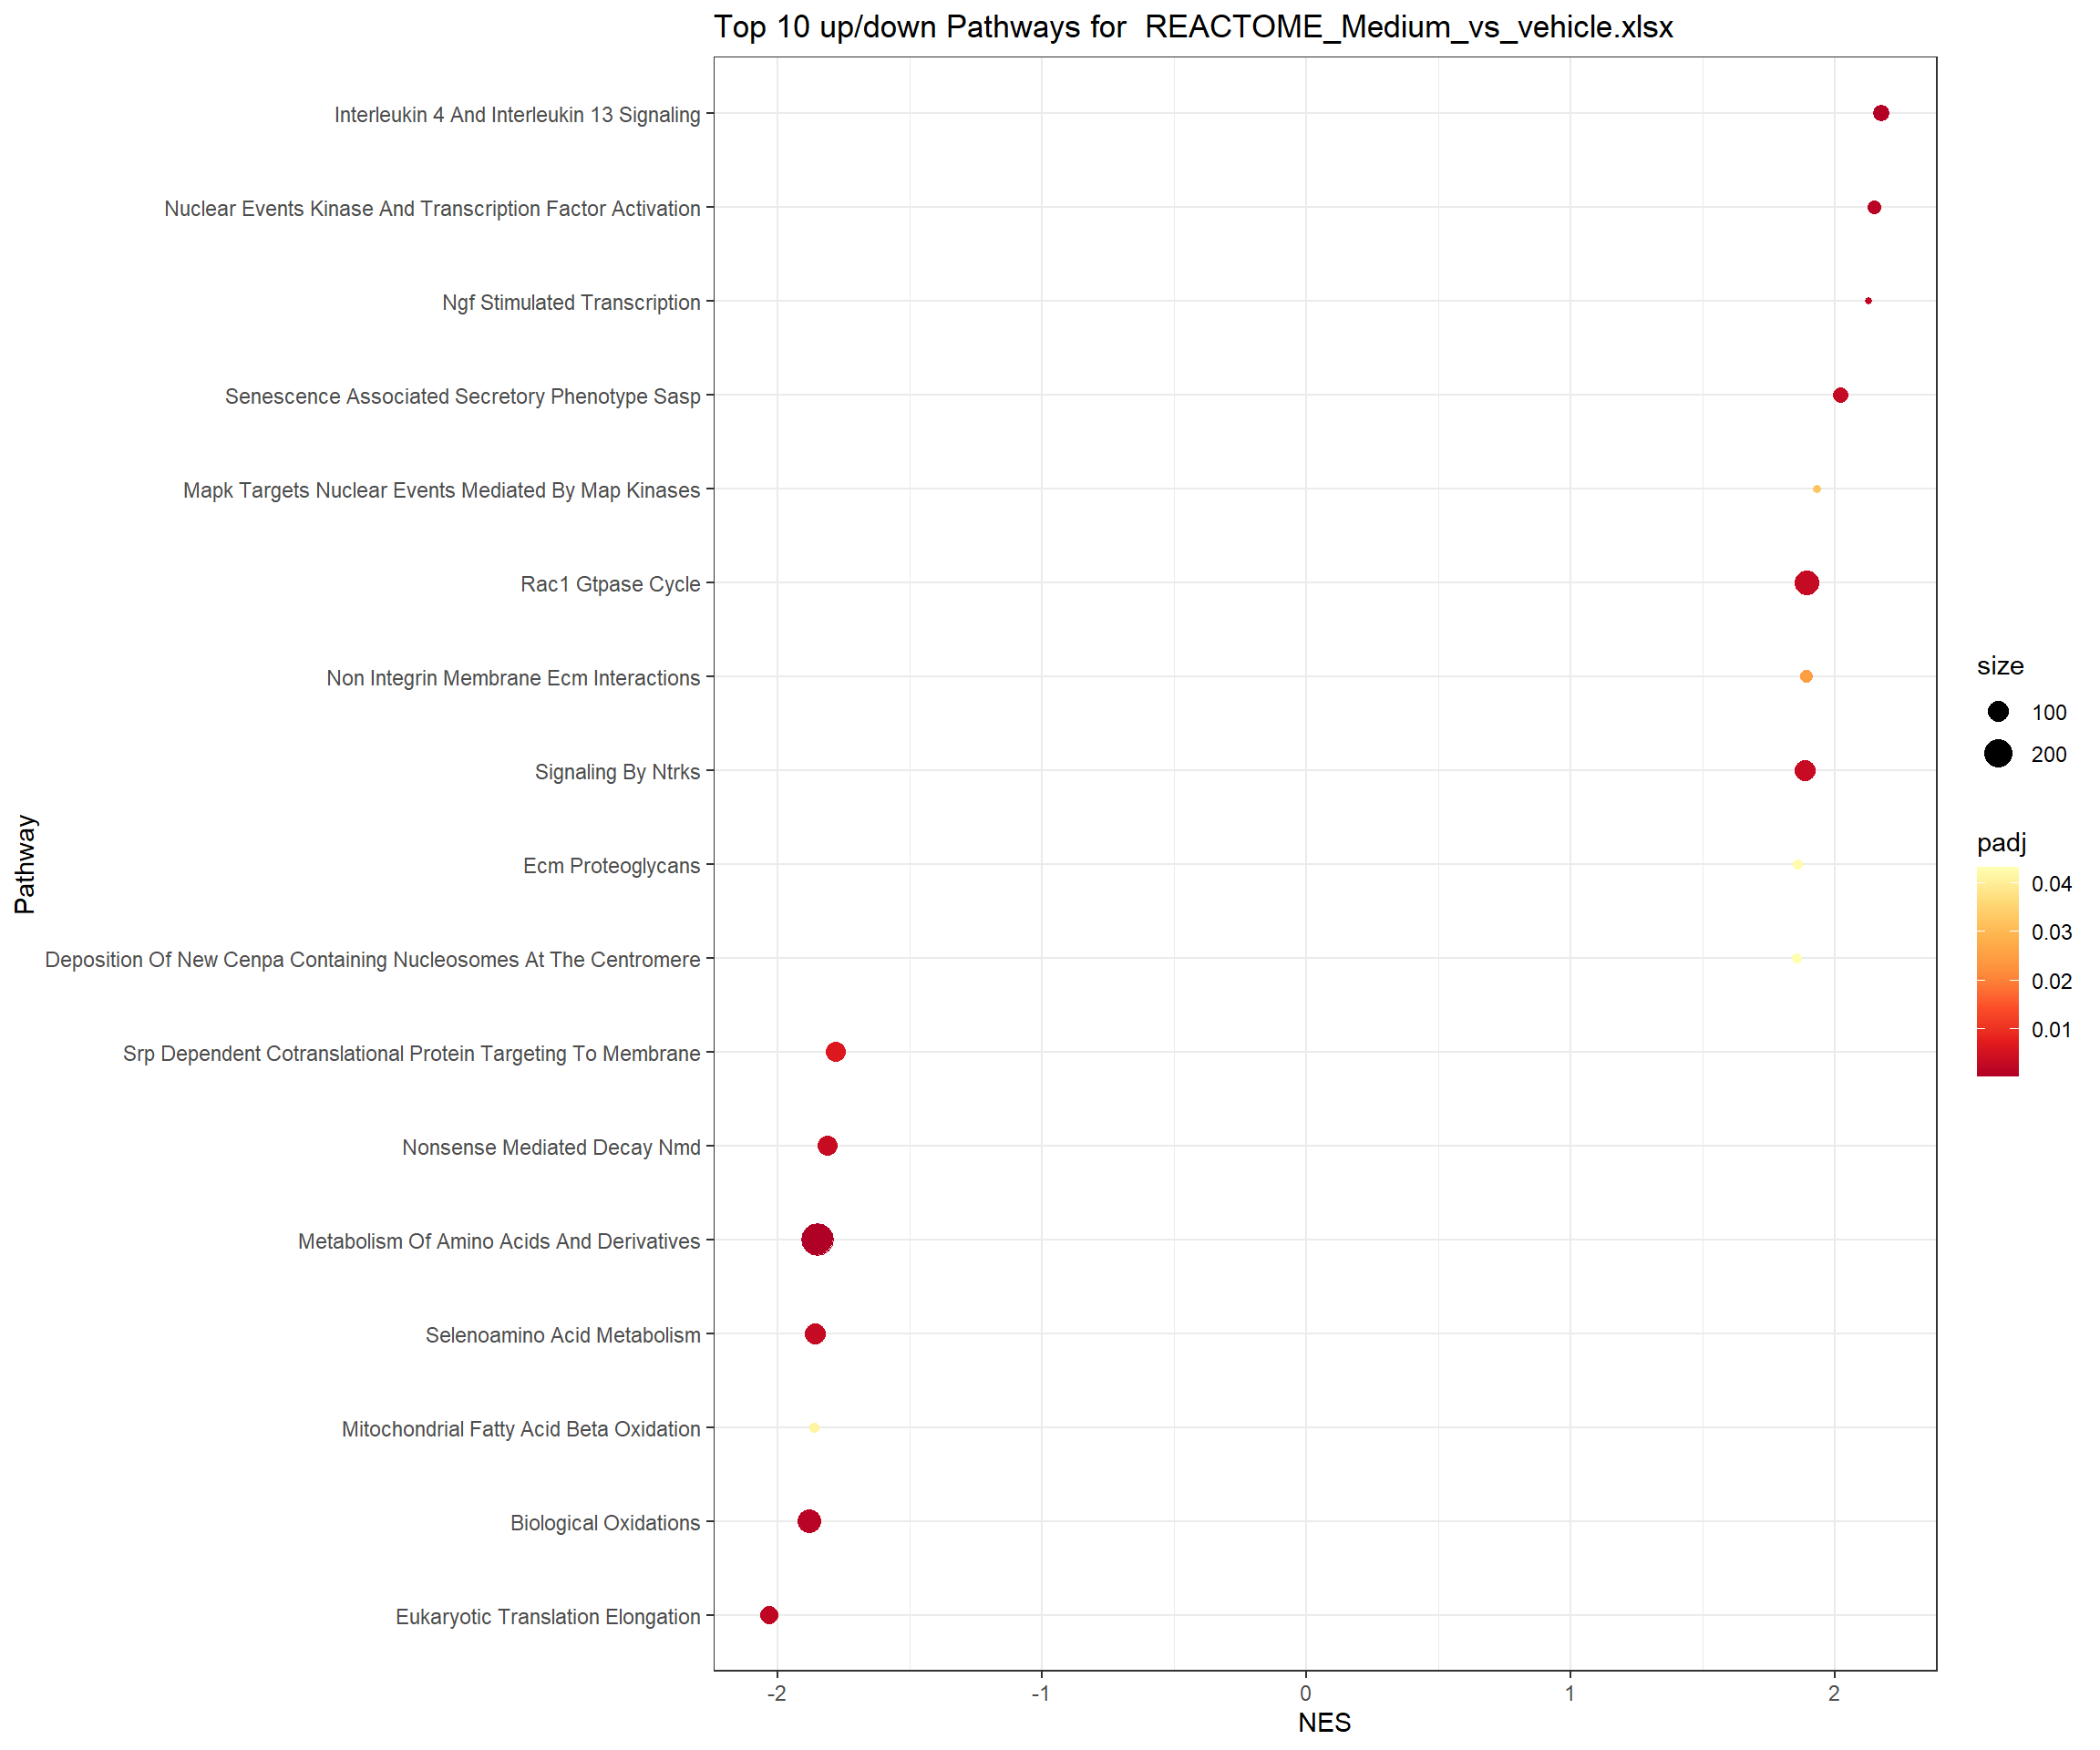

In [ ]:

REACTOME_plot_list[[7]]


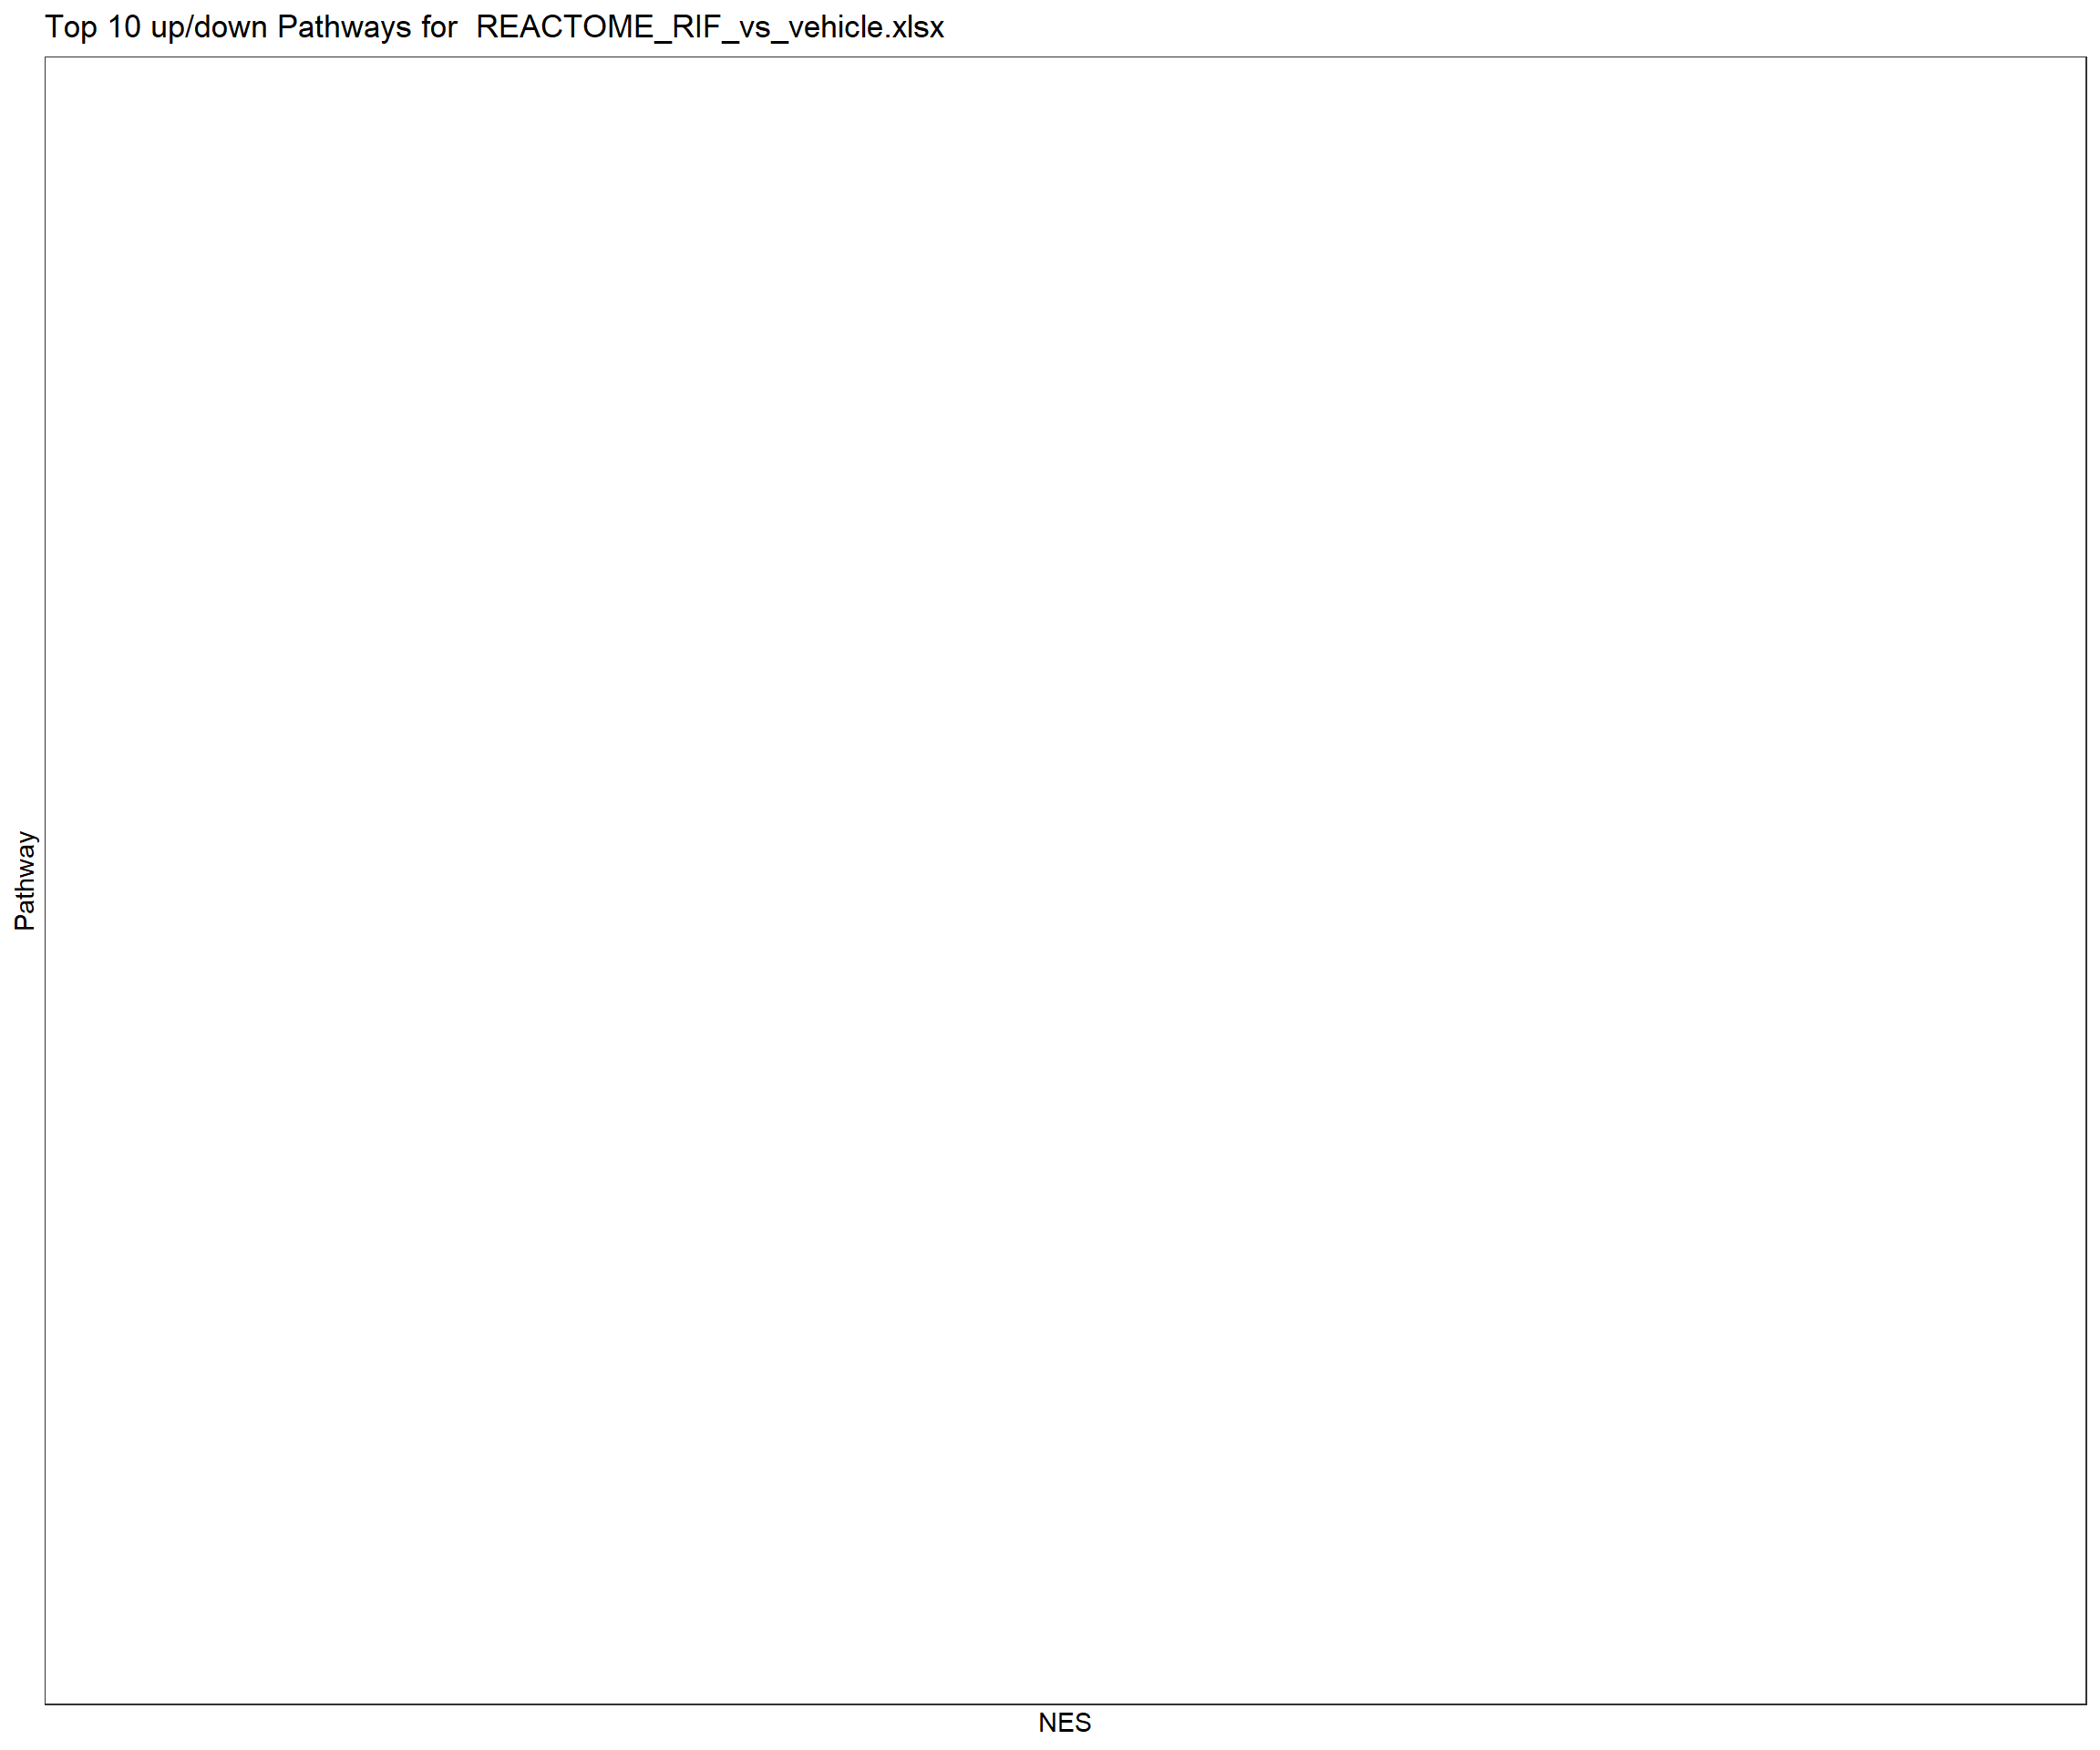

In [ ]:

REACTOME_plot_list[[8]]


### GO

CONSIDER :Split data into each of the GO databases:

1.  **Biological Process (BP)**, which describes the biological objectives to which the gene or gene product contributes.
2.  **Molecular Function (MF**), which describes the elemental activities of a gene product at the molecular level, such as binding or catalysis.
3.  **Cellular Component (CC)**, which describes where in the cell the gene product is active.

Get all file paths related to GO

In [ ]:
# Get file paths
go_file_paths <- dir(here("notebooks/seq/data_raw/GSEA"), pattern = "GO", full.names = TRUE)

# Subset to interleukines if wanted
# kegg_file_paths[grep(pattern = "IL", kegg_file_paths)]


In [ ]:
GO_plot_list <- map(go_file_paths, function(file_path) {
  # Read the file
  plot_data <- read_excel(file_path)
  
  # Process the data
  processed_data <- plot_data %>%
    arrange(desc(abs(NES))) %>%
    group_by(sign_NES = sign(NES)) %>%
    slice_head(n = 10) %>%
    ungroup() %>%
    filter(padj <= 0.05)
  
  # Generate the plot
  ggplot(processed_data,
         aes(x = NES,
             y = fct_reorder(pathway, NES),
             color = padj,
             size = size
             )
         ) +
    geom_point(stat = 'identity') +
    labs(x = "NES",
         y = "Pathway",
         title = paste("Top 10 up/down Pathways for","", basename(file_path))
         ) +
    theme_bw() +
    scale_color_distiller(type = "seq", palette = "YlOrRd") #+
    #theme(legend.position = "none") # Remove legend to focus on the data
})


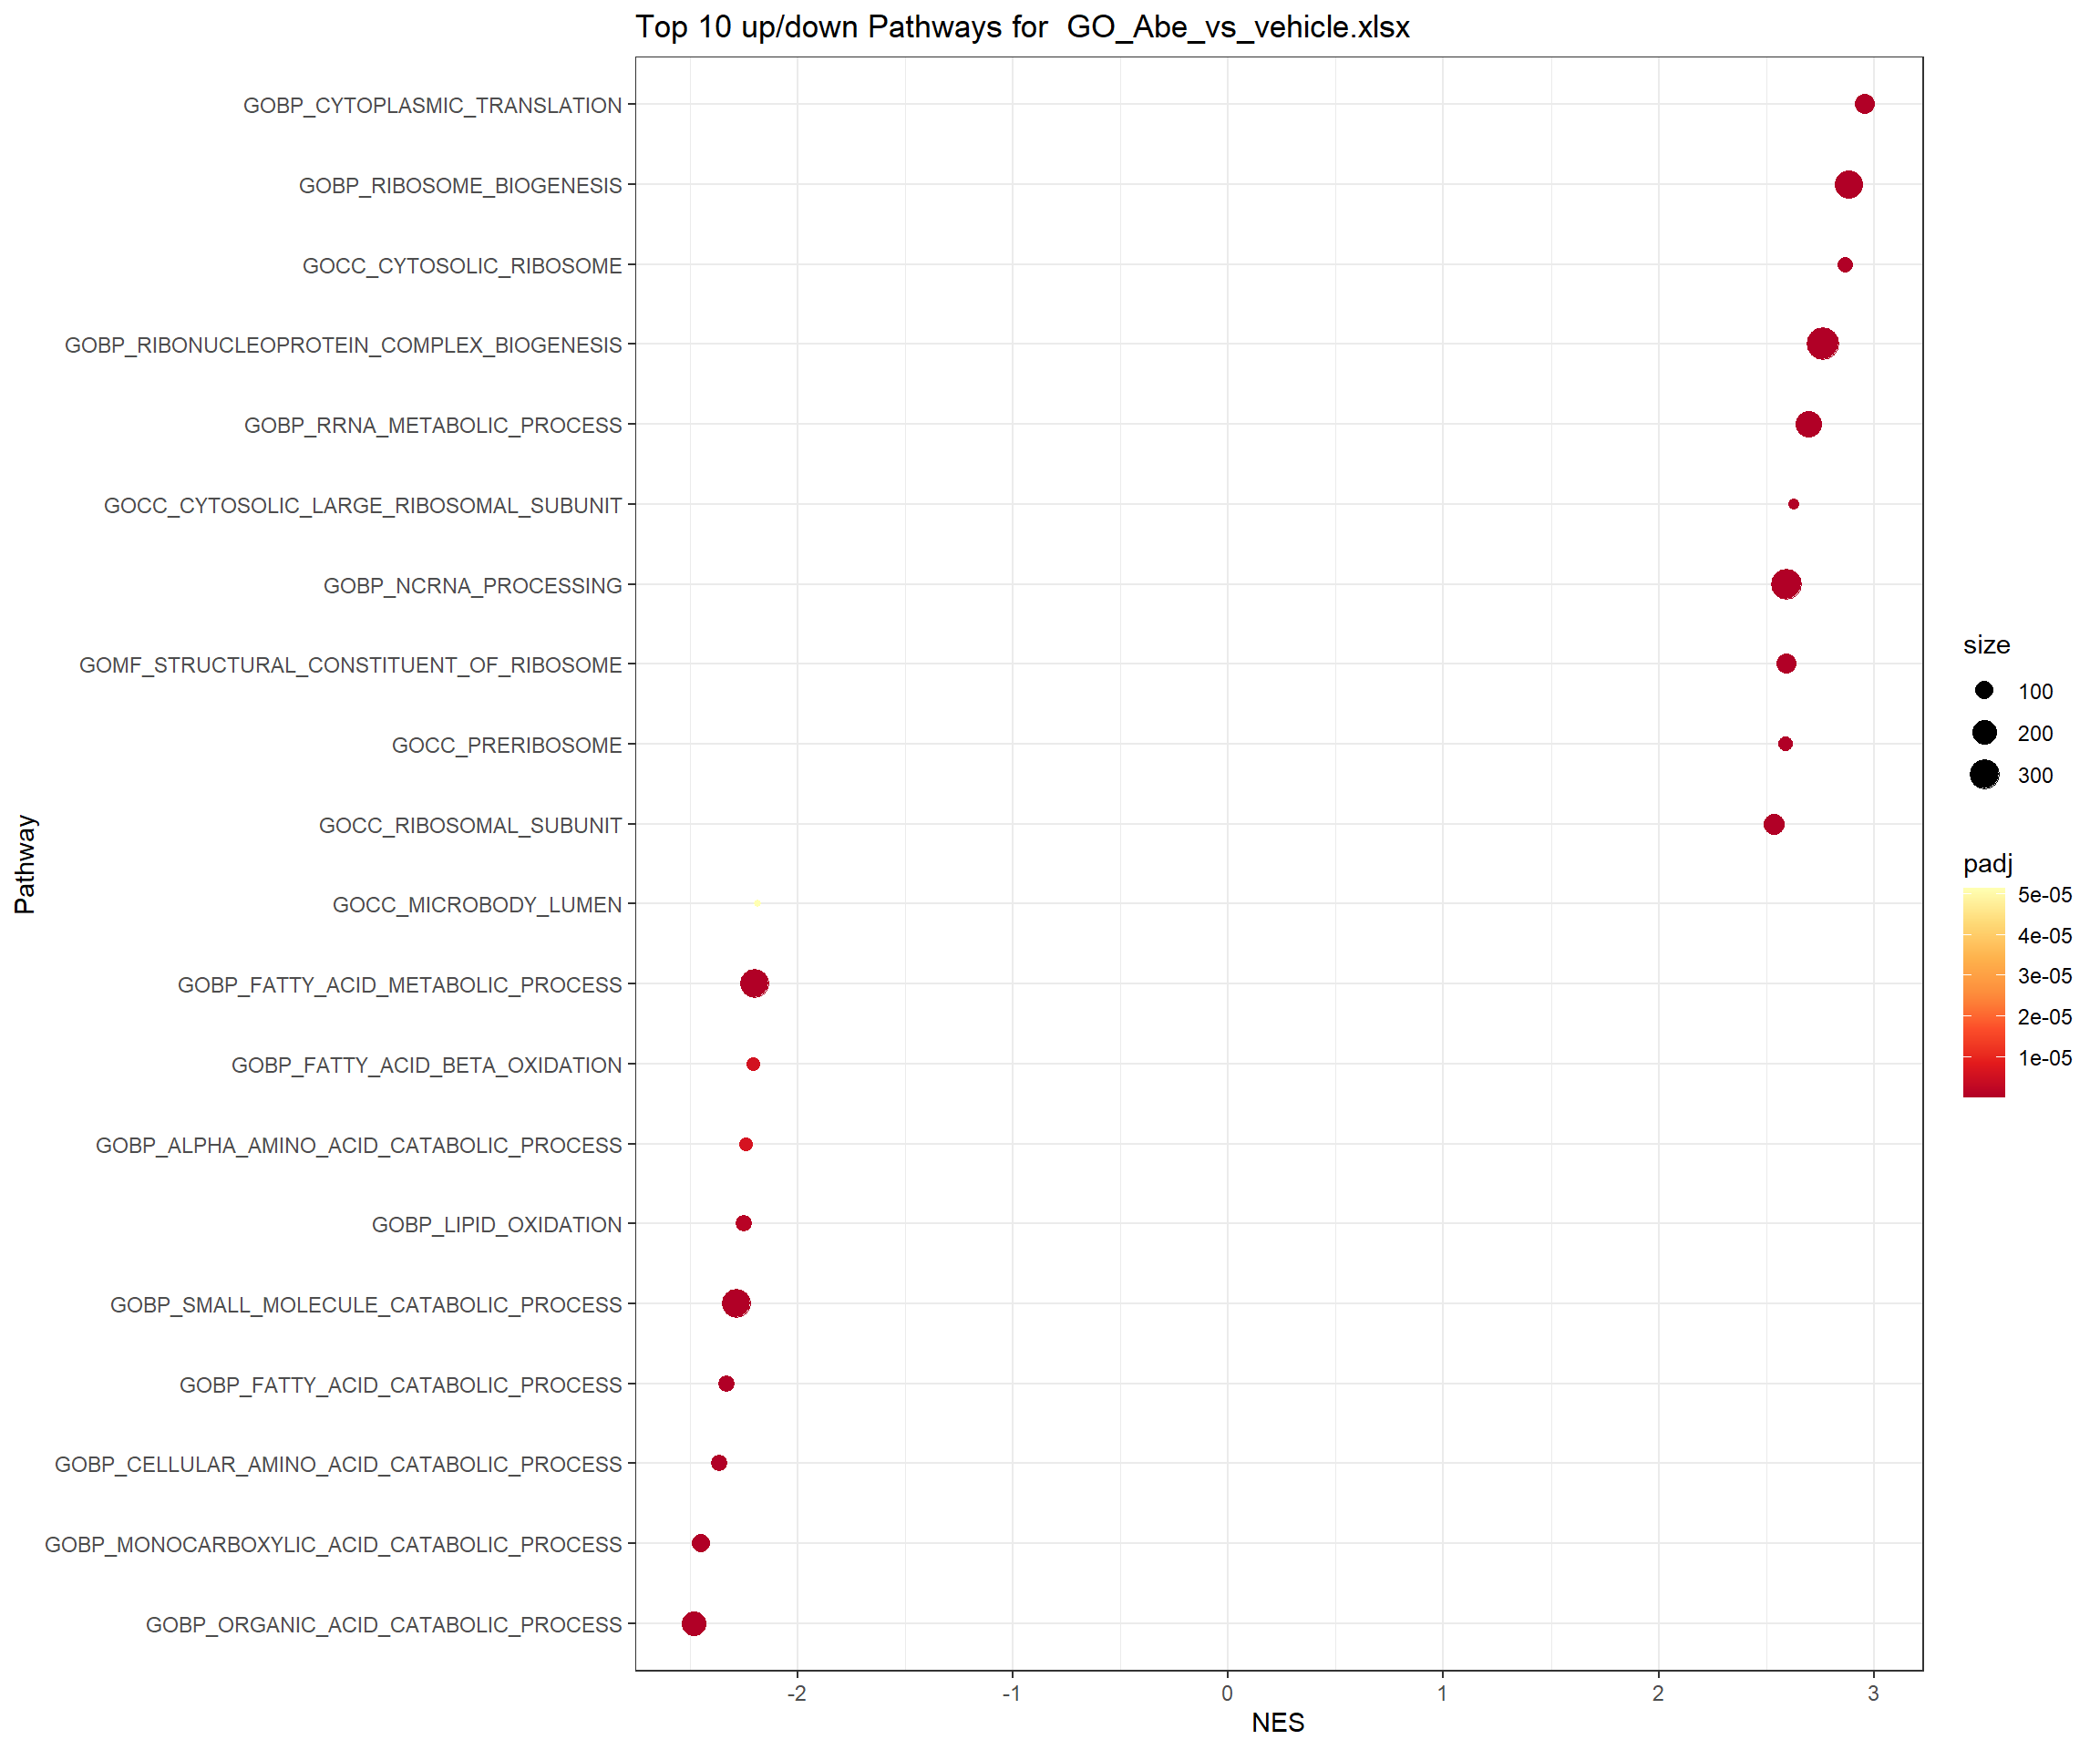

In [ ]:

GO_plot_list[[1]]


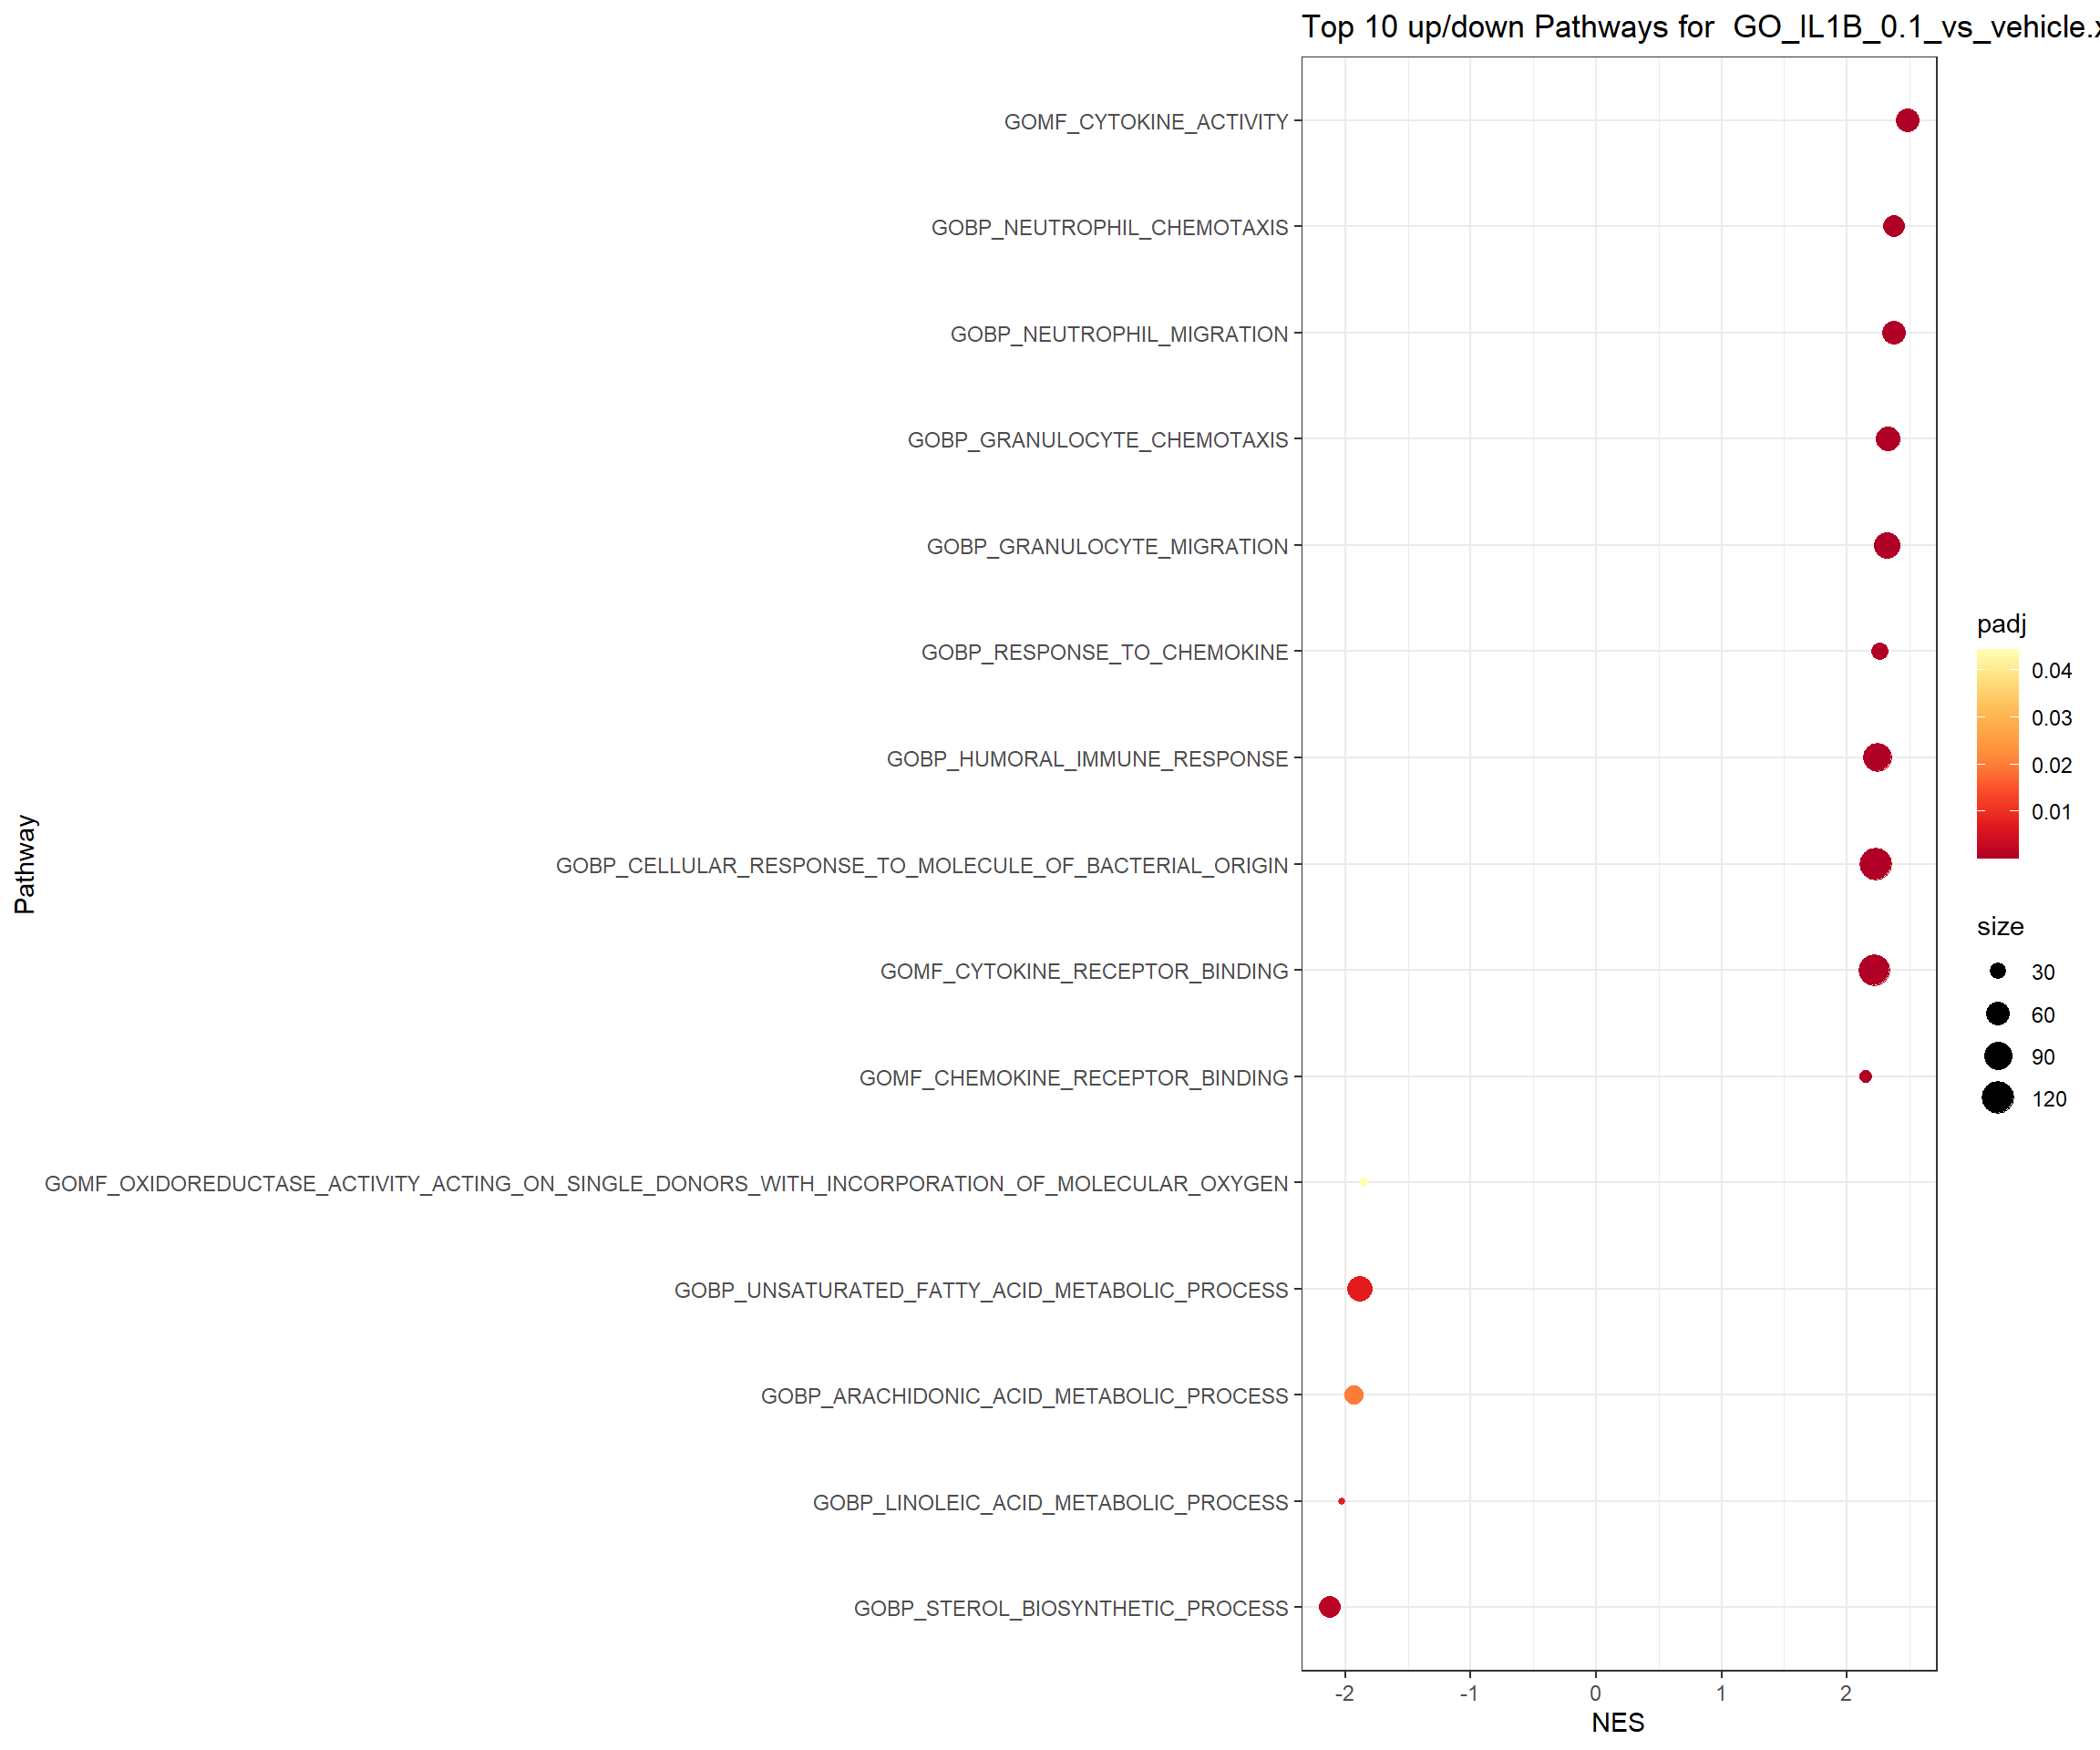

In [ ]:

GO_plot_list[[2]]


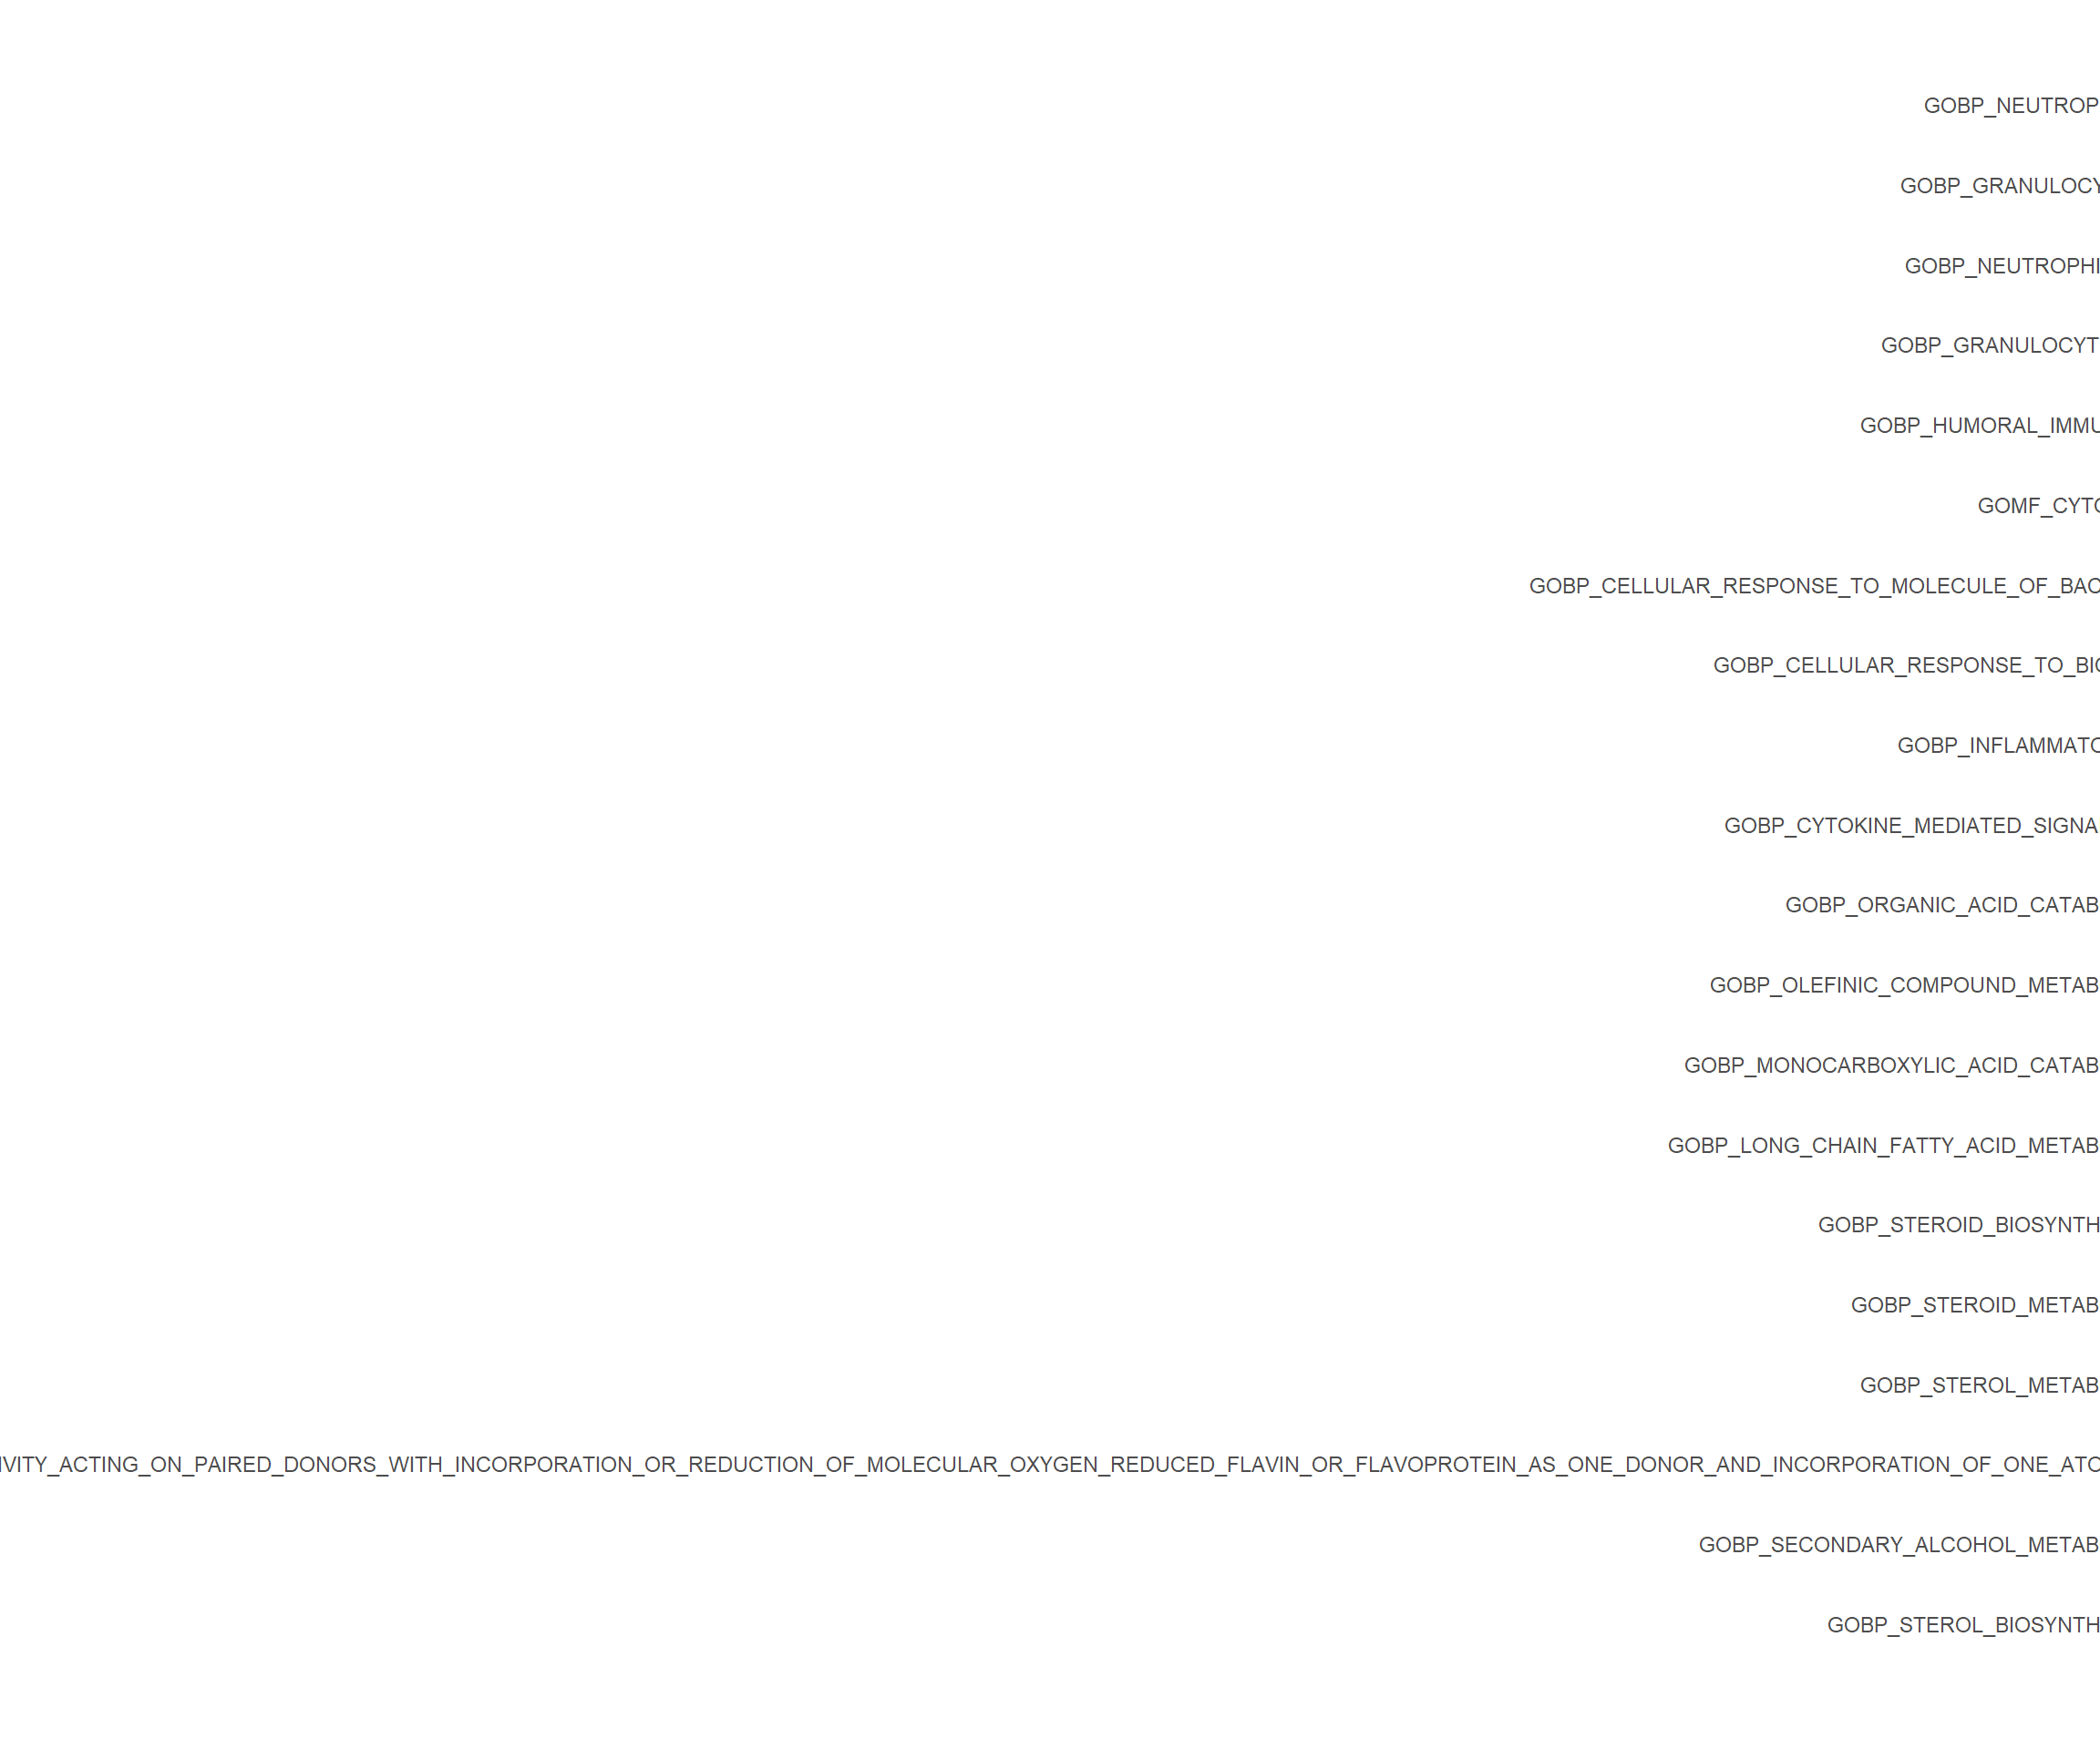

In [ ]:

GO_plot_list[[3]]


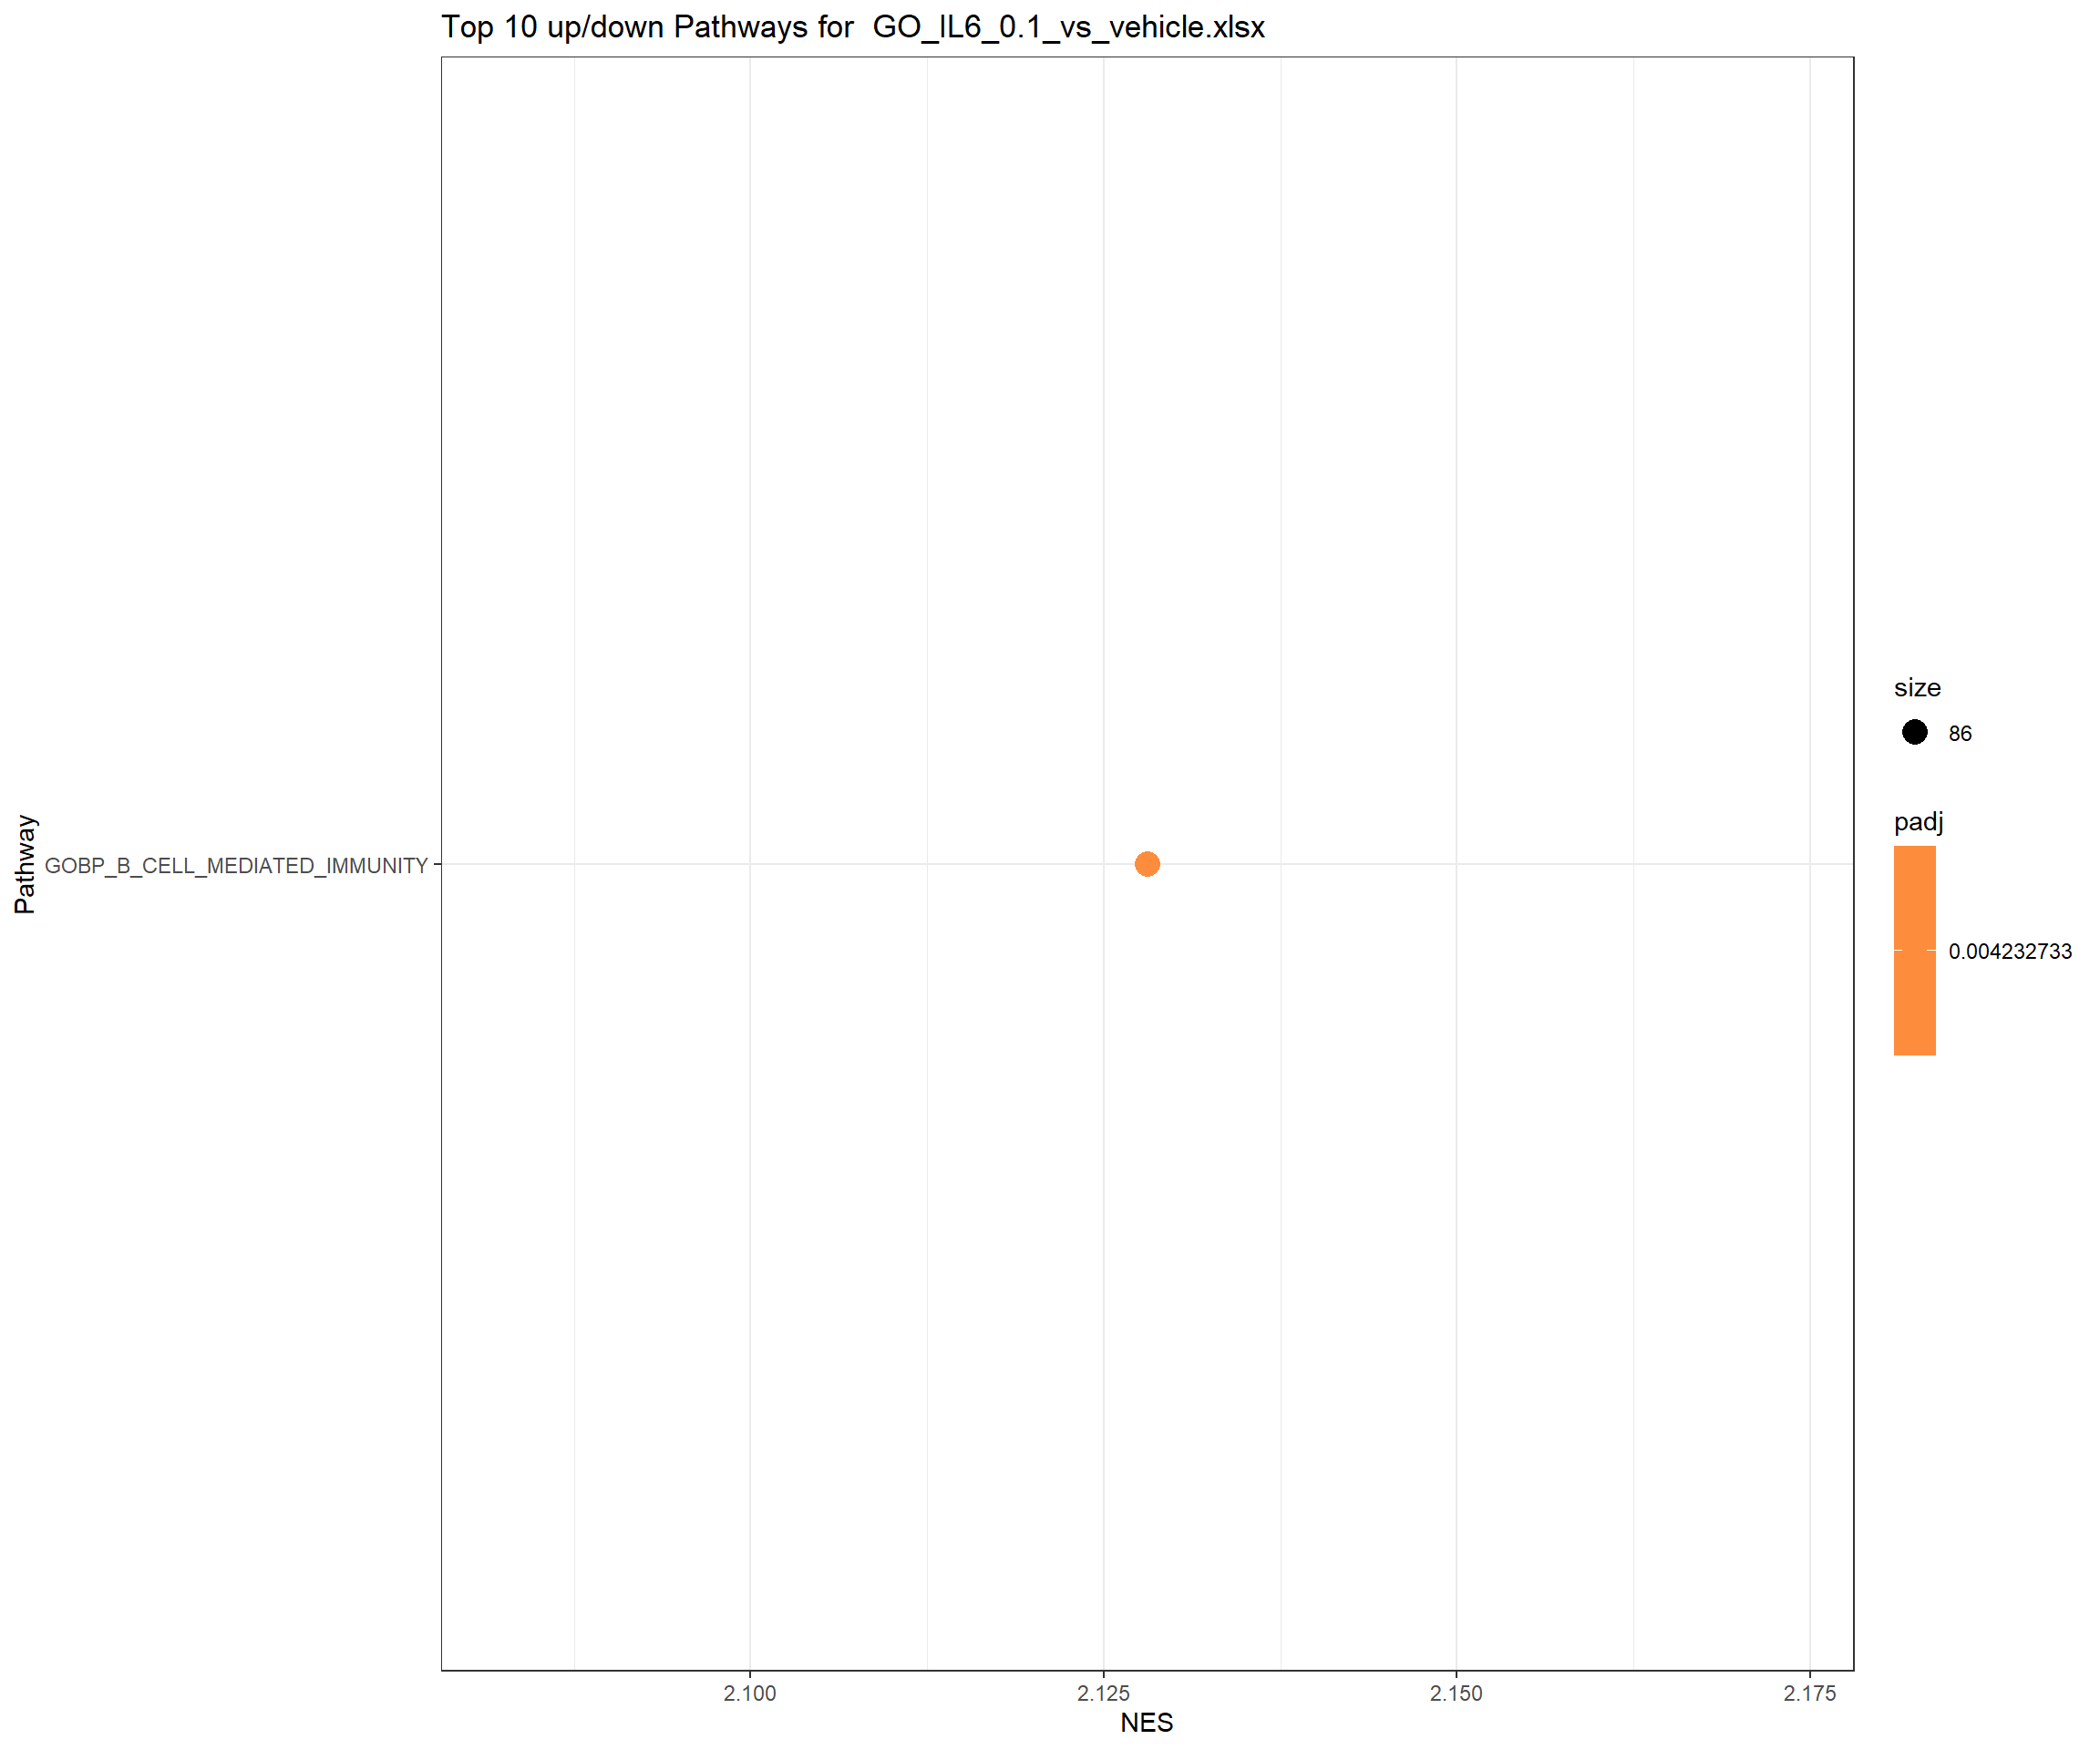

In [ ]:

GO_plot_list[[4]]


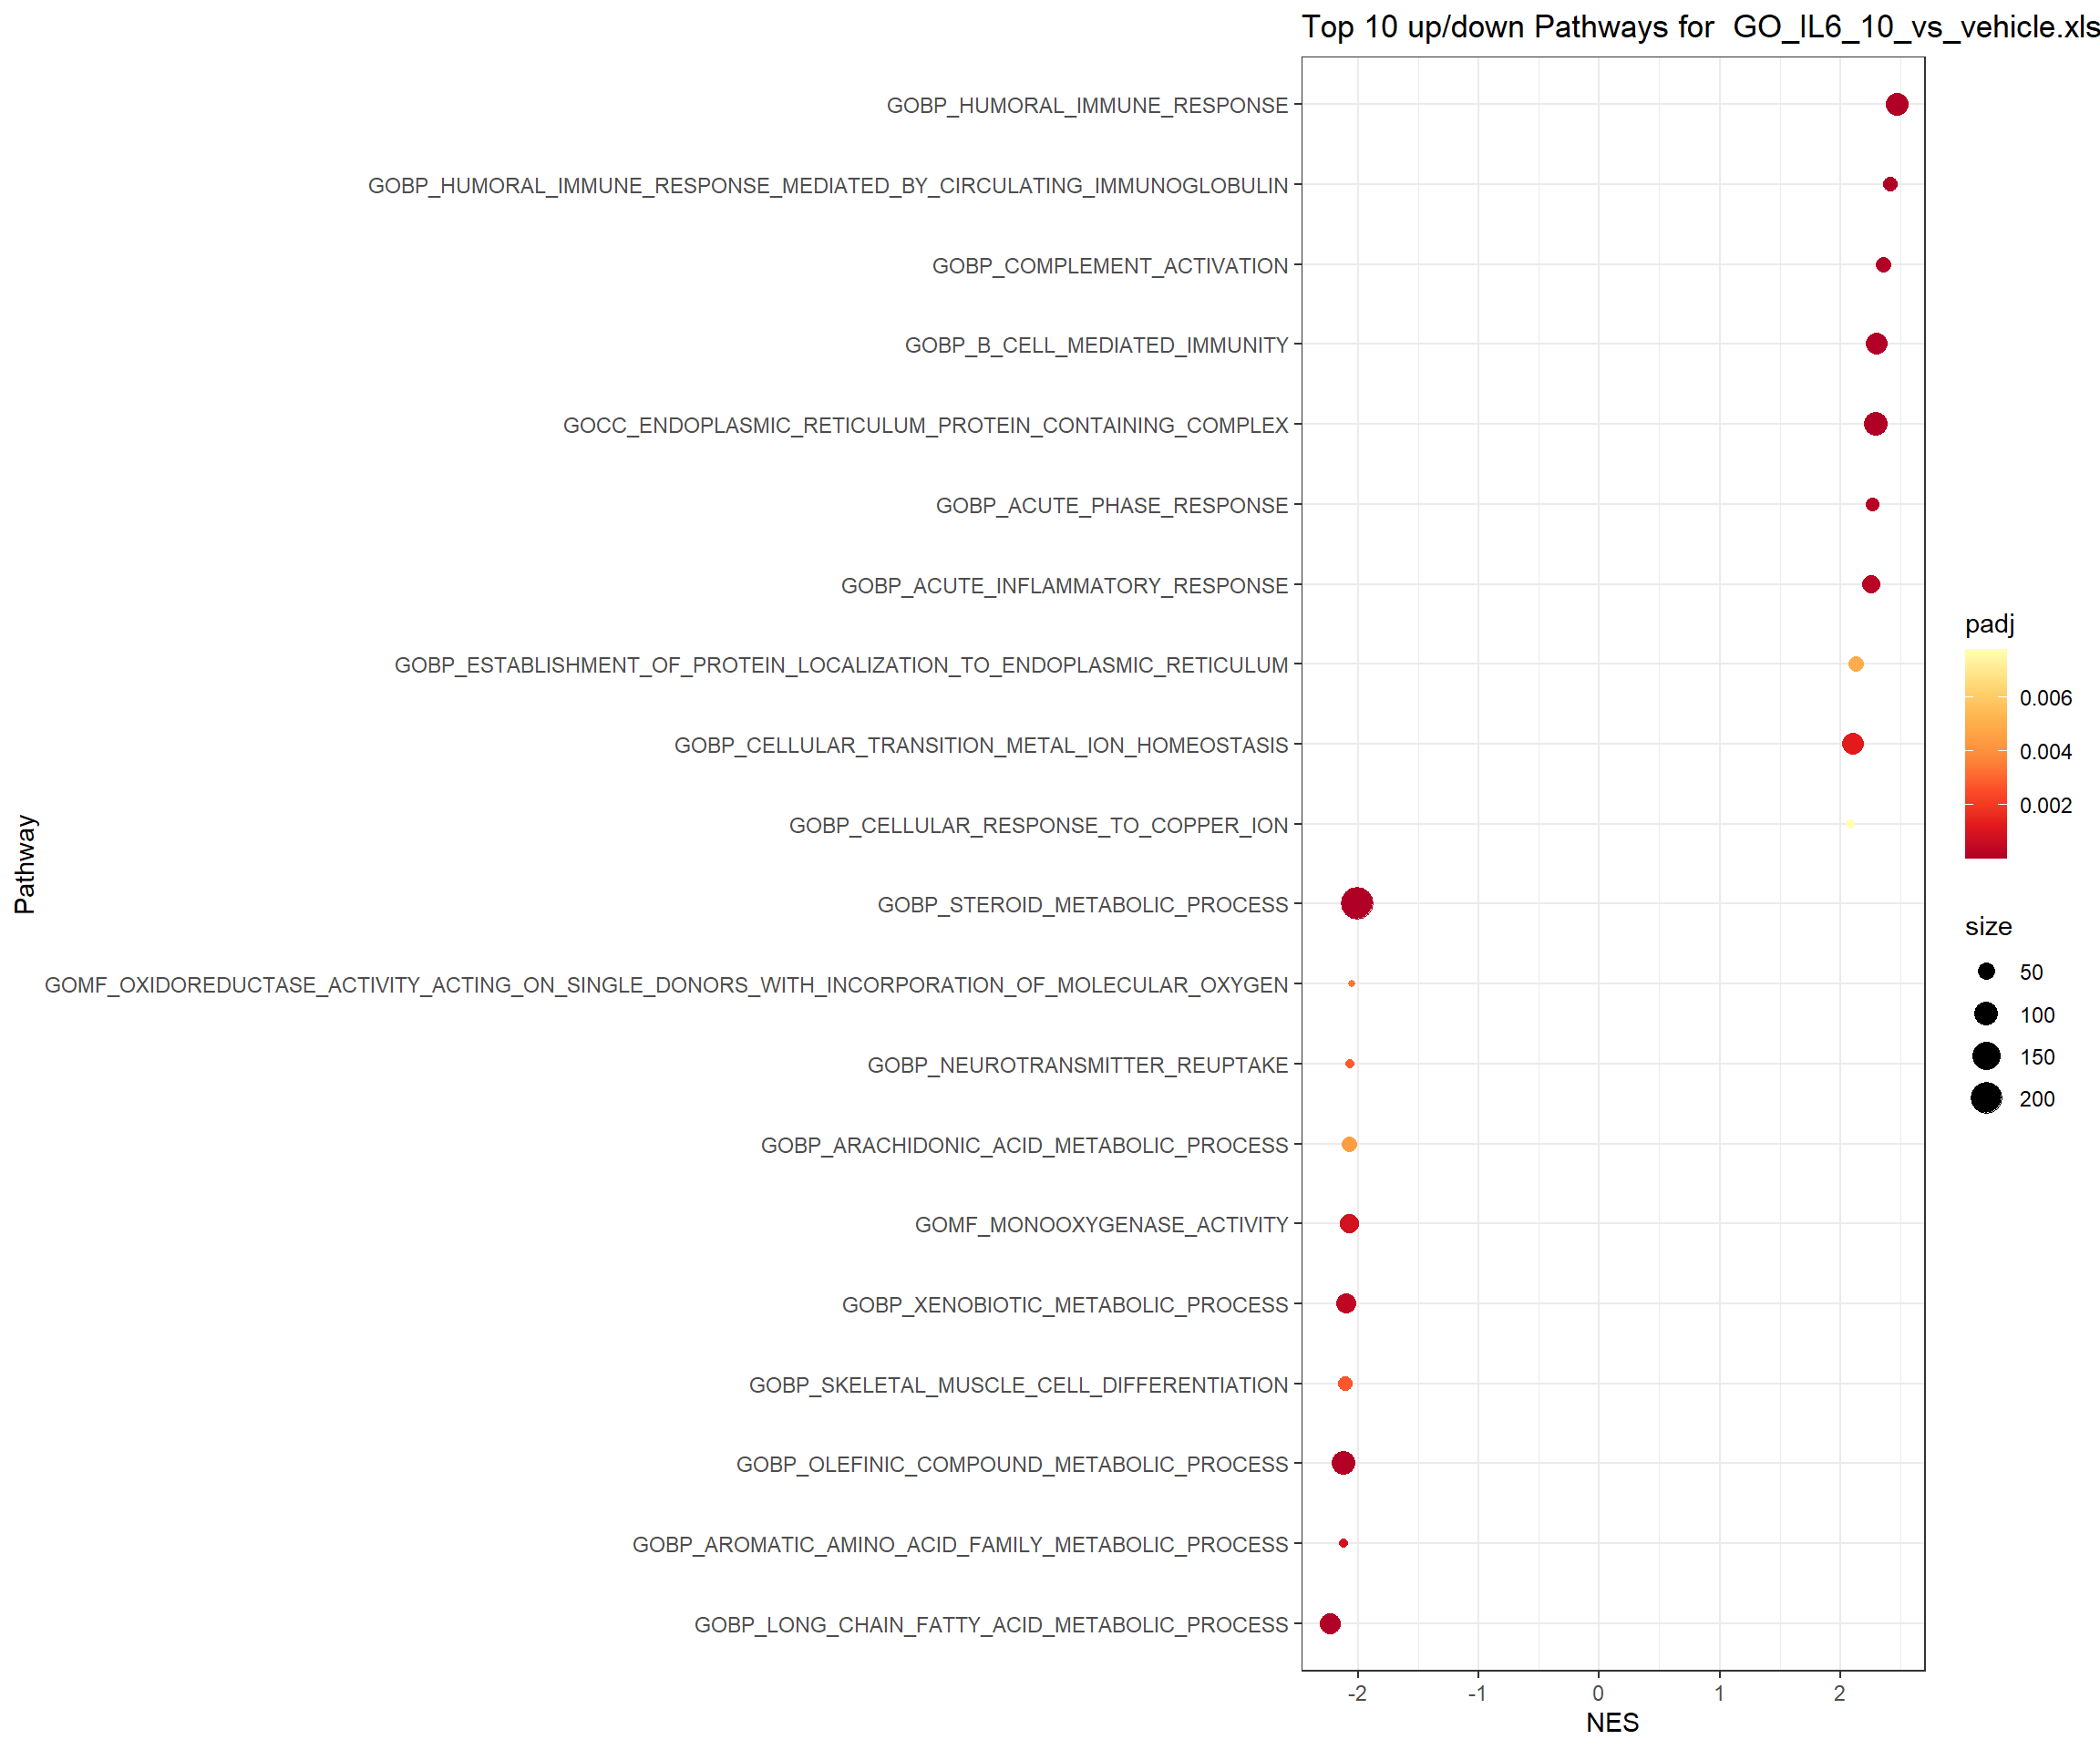

In [ ]:

GO_plot_list[[5]]


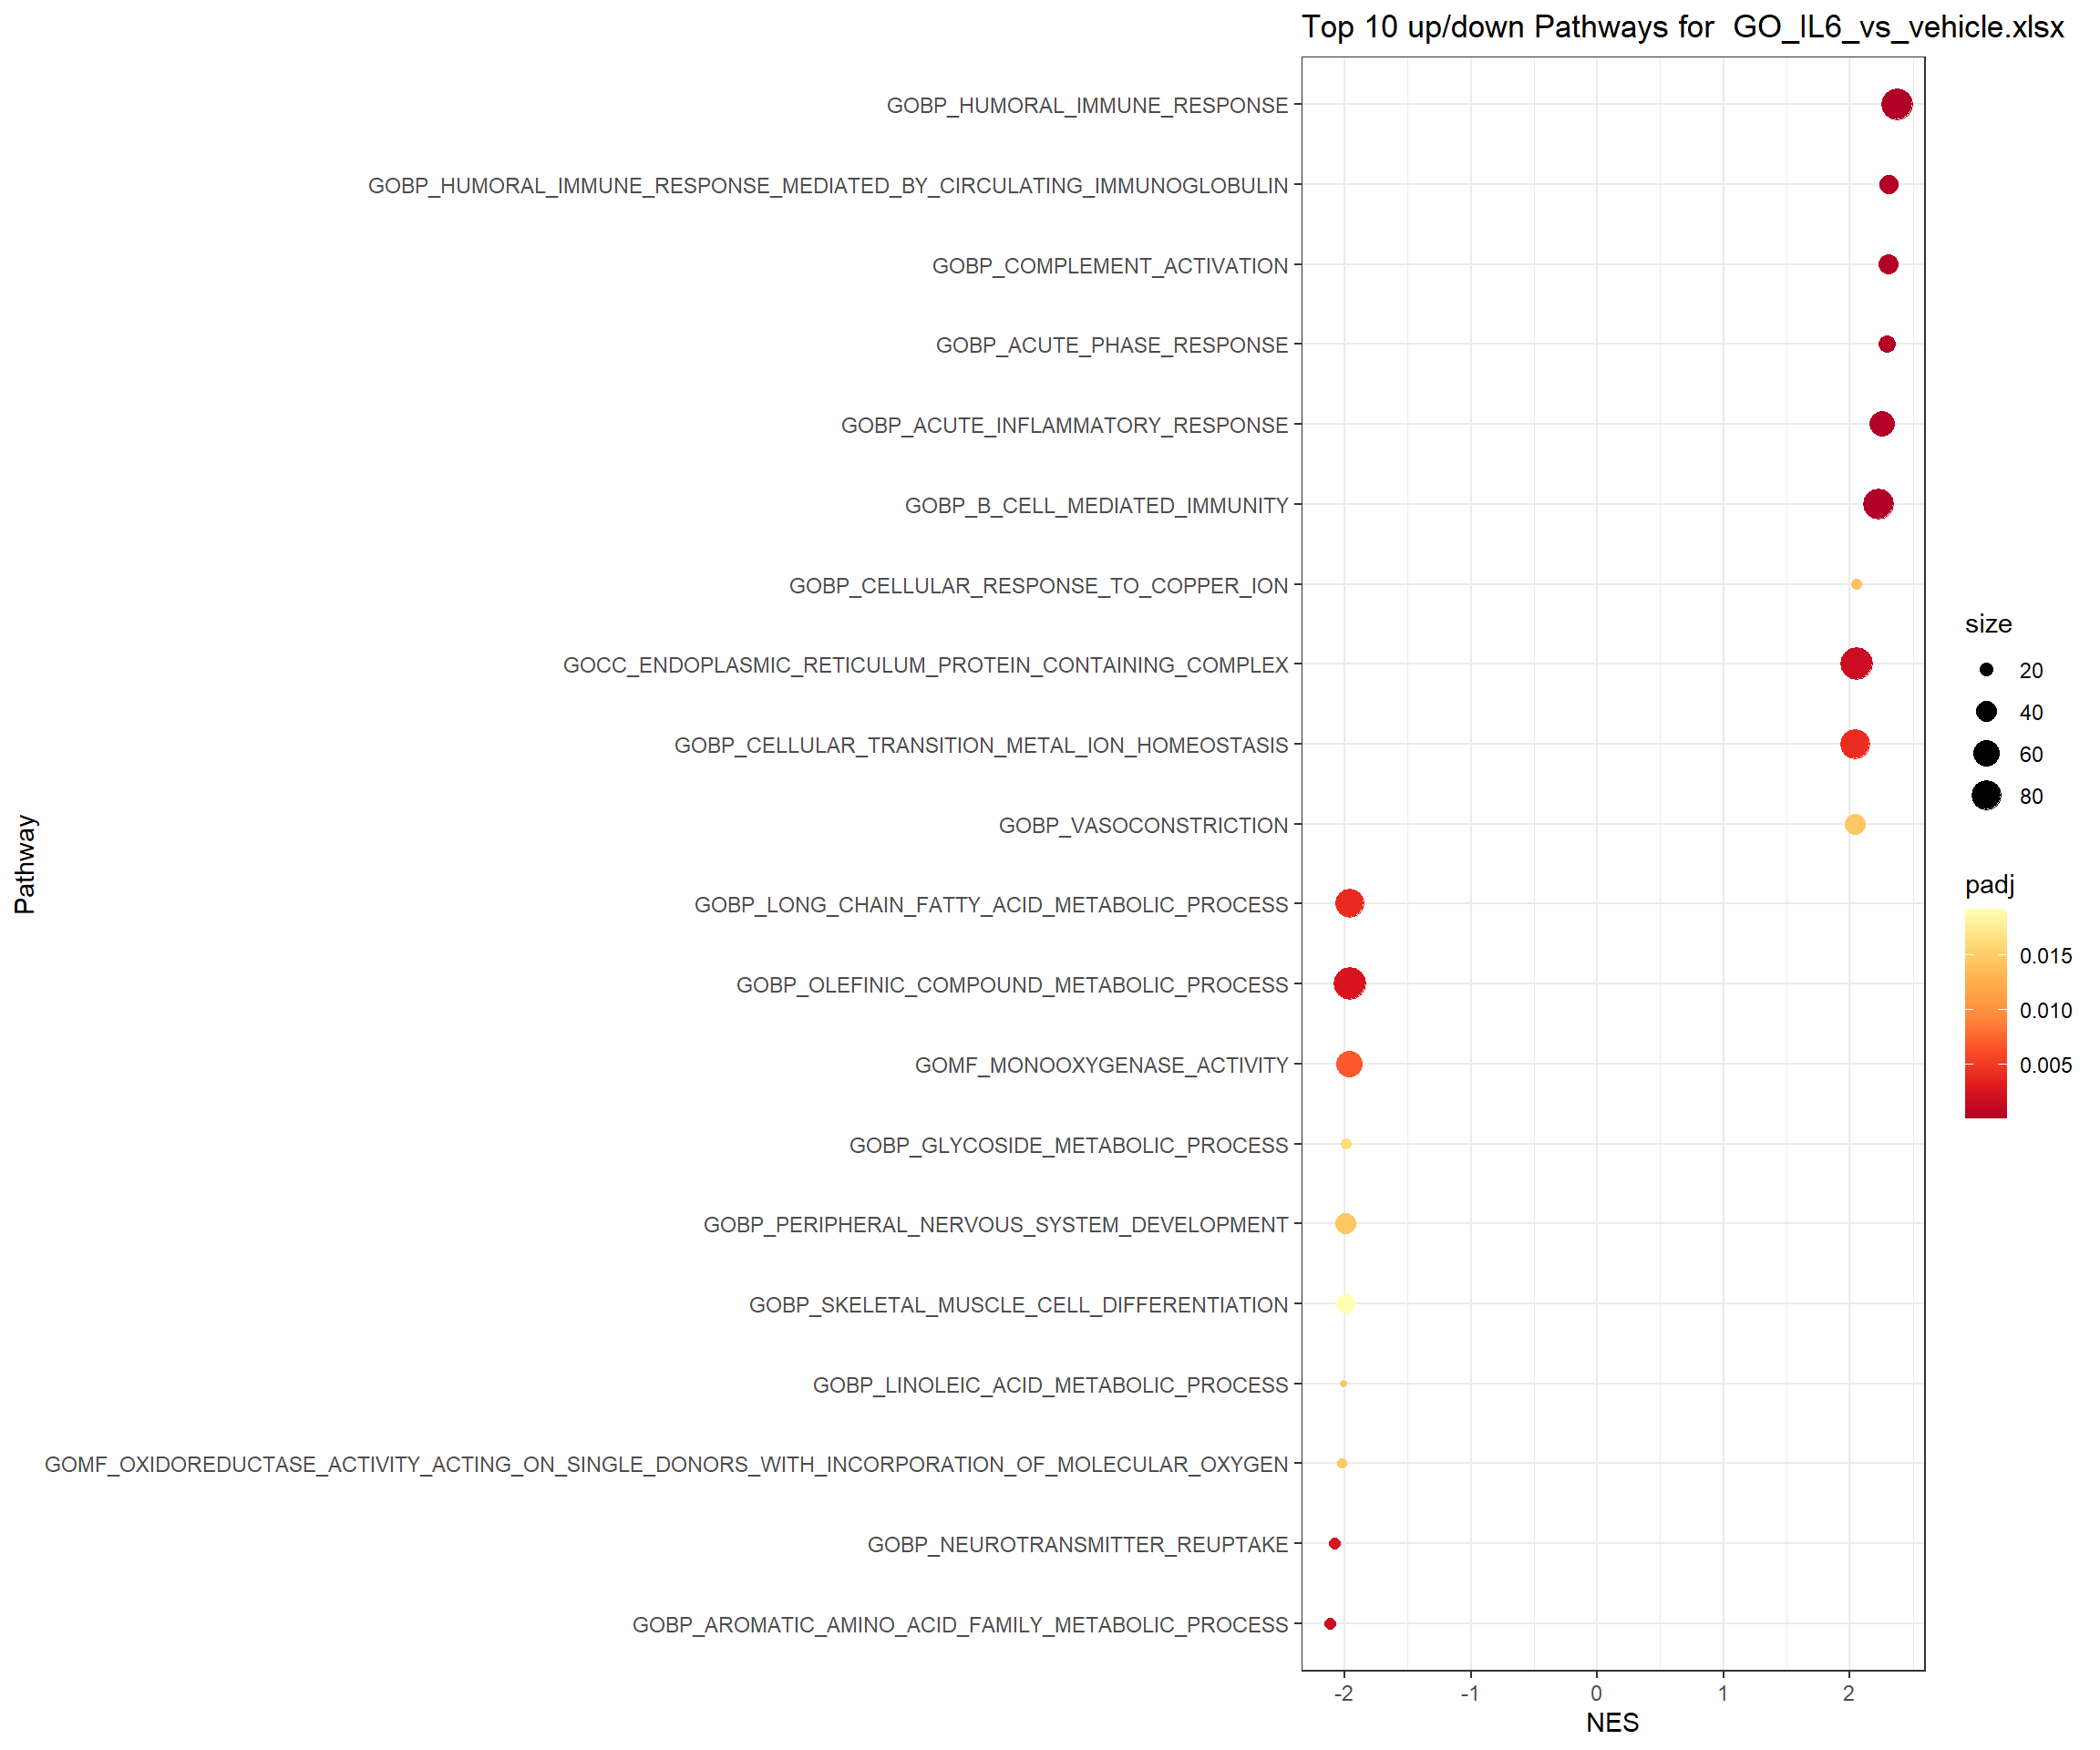

In [ ]:

GO_plot_list[[6]]


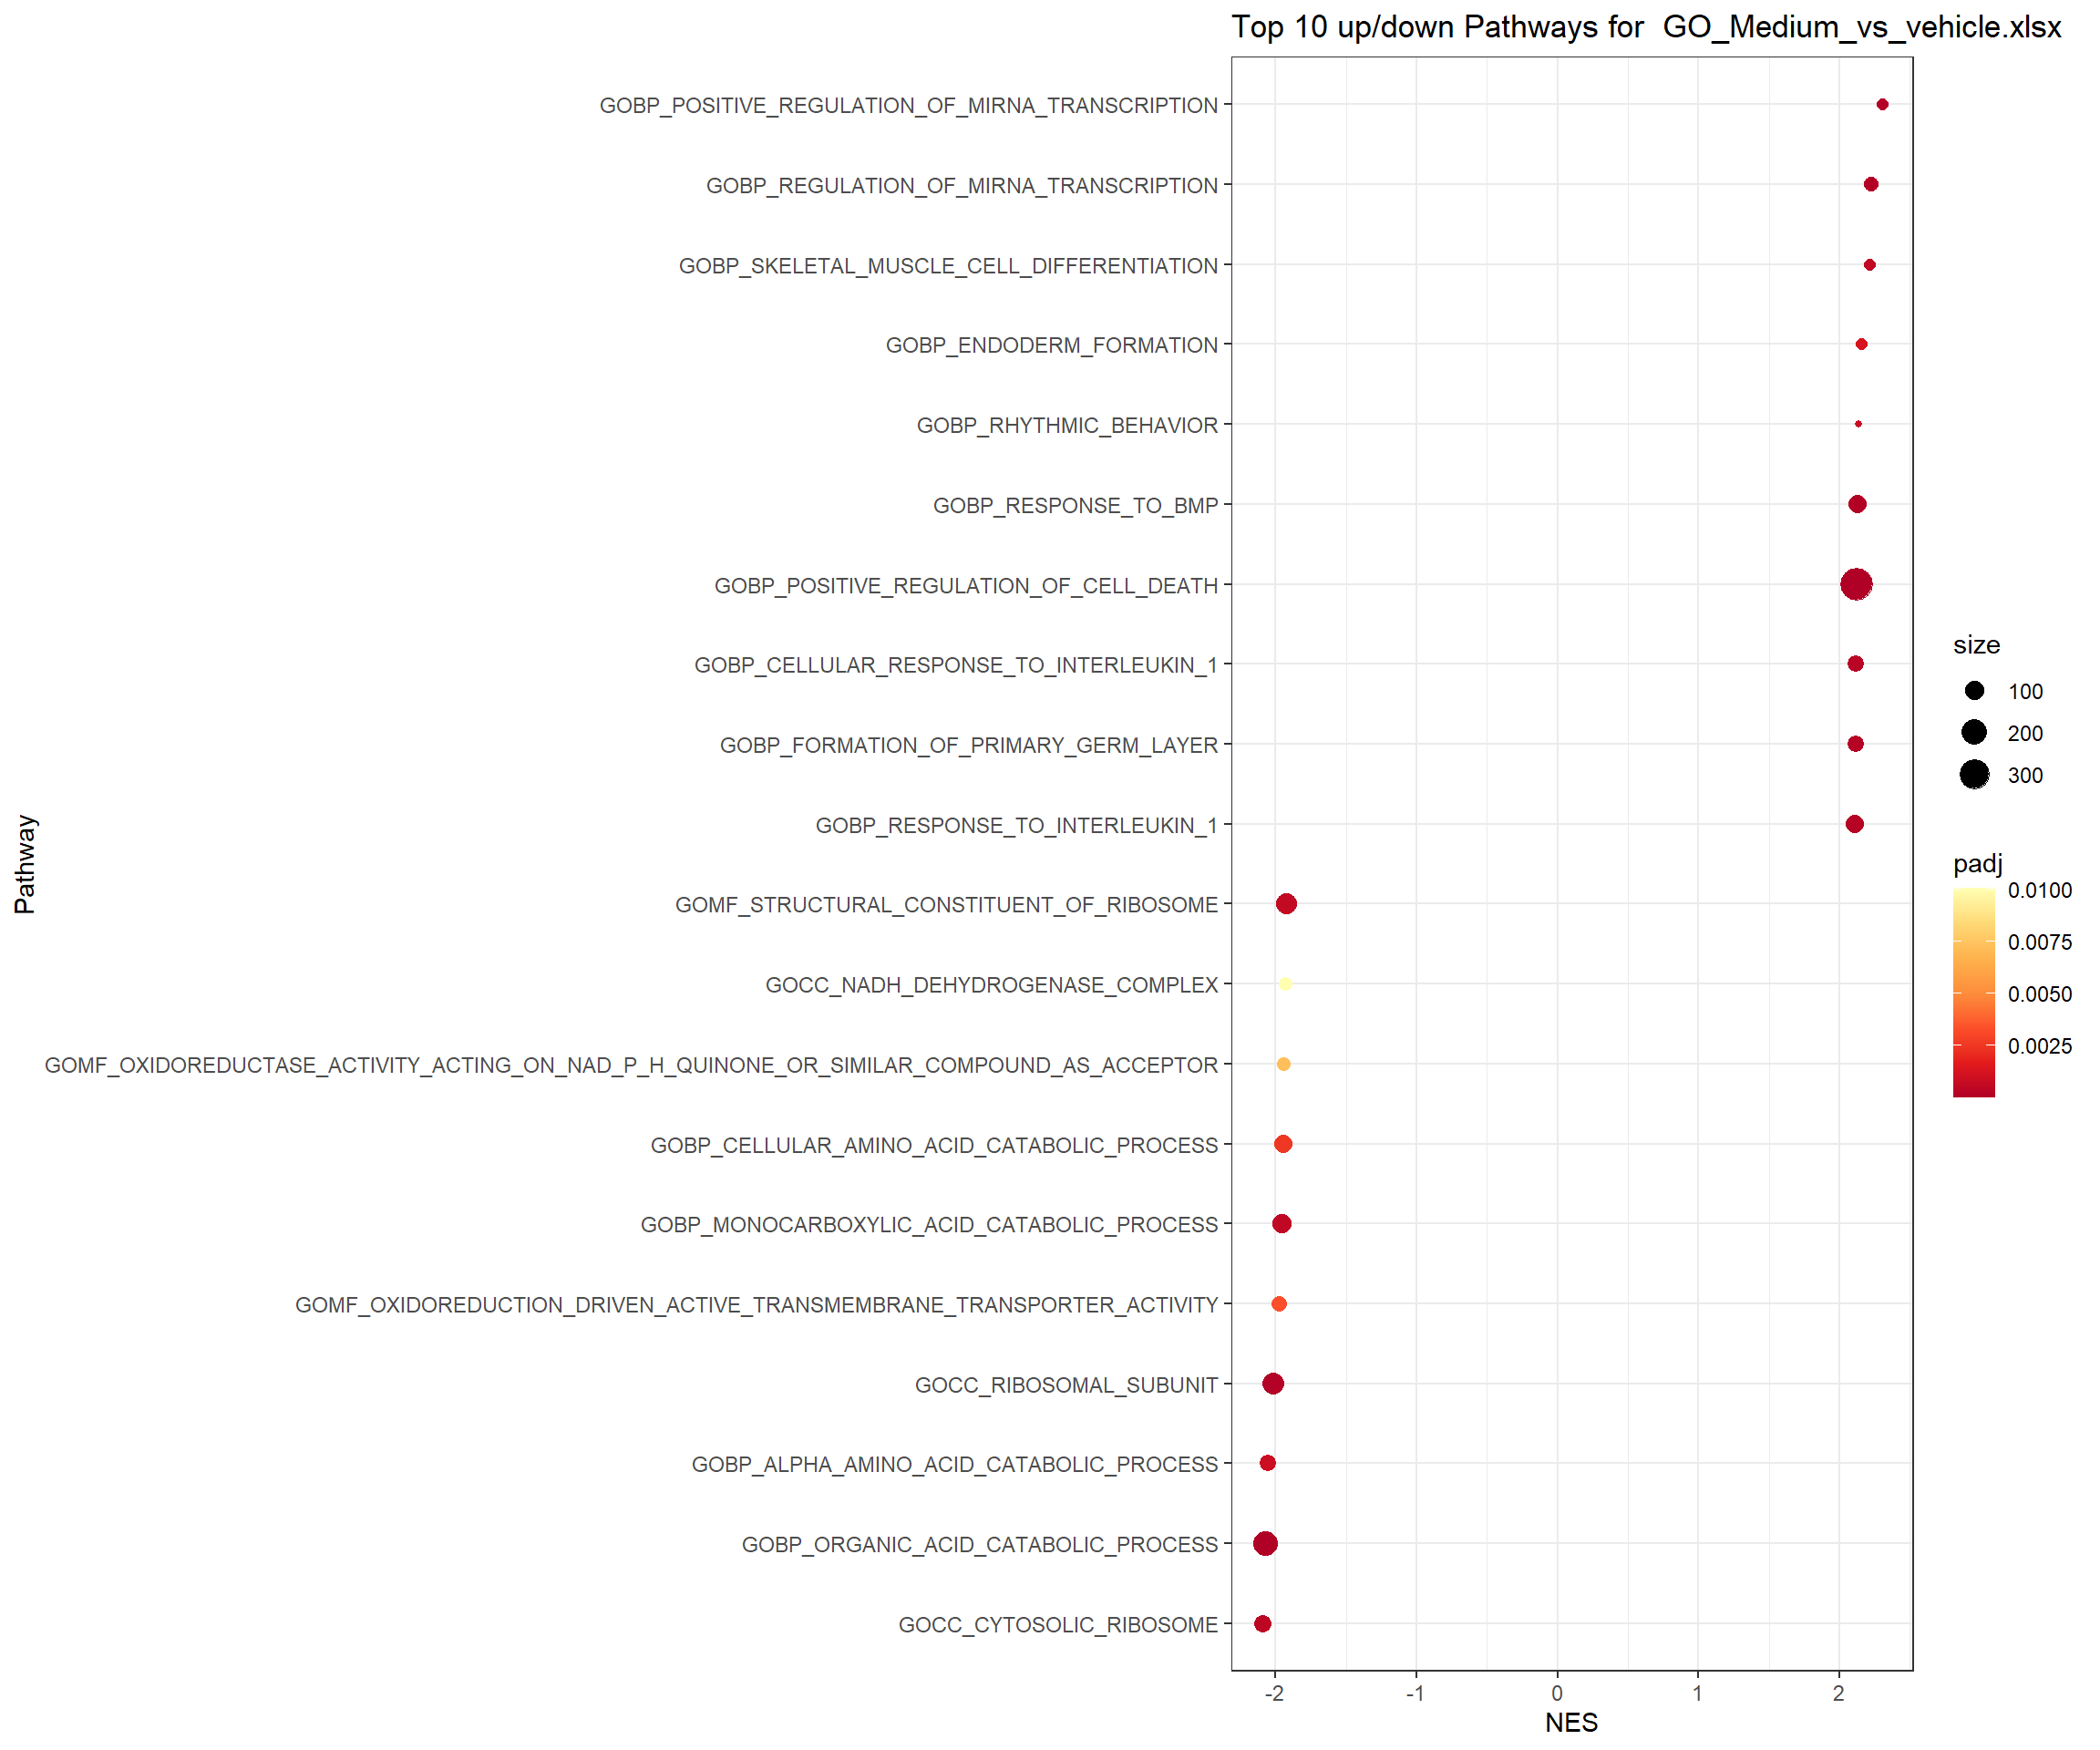

In [ ]:

GO_plot_list[[7]]


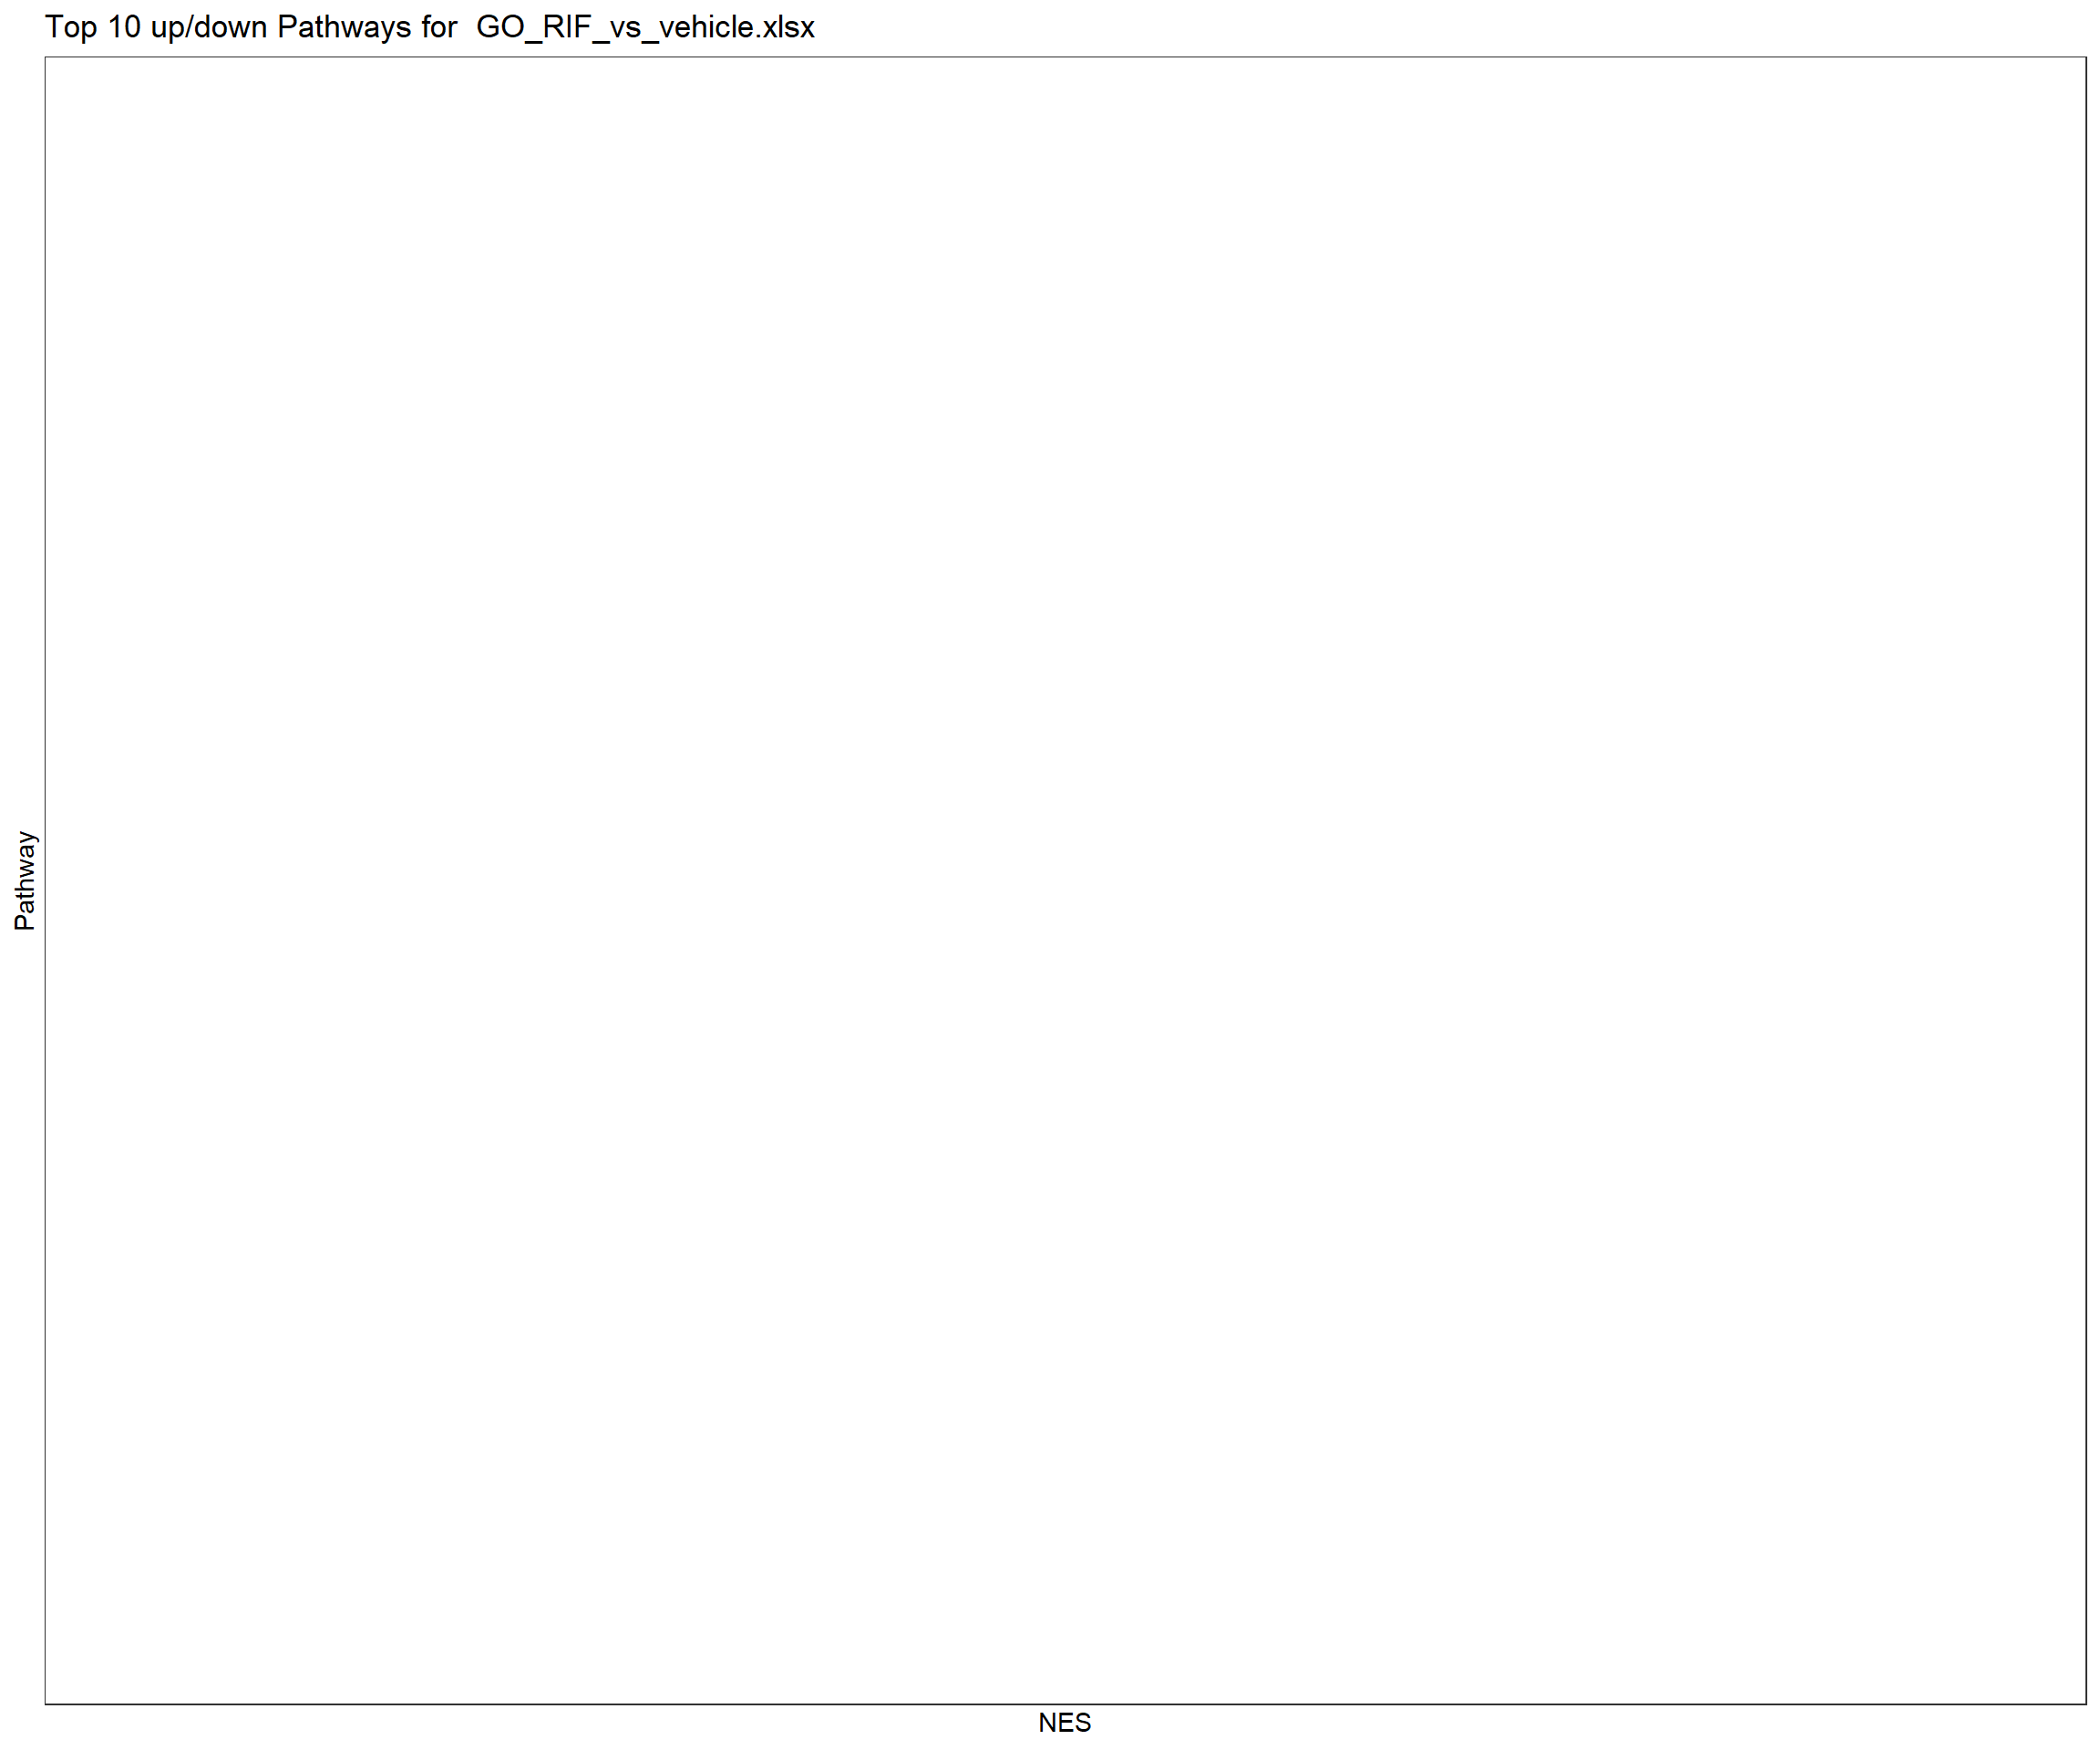

In [ ]:

GO_plot_list[[8]]
